Imports

In [32]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import date, timedelta

#for ML

import numpy as np
import datetime

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from scipy.optimize import curve_fit

from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import math

##Example of RandomForestRegressor (ML pt2)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

Import files

In [33]:
def test(Sensors, df):
    Test = {}
    maxim = len(Sensors.columns)
    for i,col in enumerate(Sensors.columns):
        materials = []
        if i == maxim-1:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })])
                else:
                    Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })    
        else:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
                                                        ])
                else:
                    Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
    return Test



Sensors_ViaBolz = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa2_timeline.csv",
                     sep = ",")
Sensors_ViaBolz.set_index("channel", inplace = True)
Sensors_ViaBolz = Sensors_ViaBolz.applymap(lambda x: x.replace("*", ""))

df_ViaBolz = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/ViaBolz.csv",
             sep = ",",
             parse_dates = ["ts"])
df_ViaBolz.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df_ViaBolz = df_ViaBolz.rename(columns=change)
test_ViaBolz=test(Sensors_ViaBolz, df_ViaBolz)


Sensors_StChiara = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
                     sep = ",")
Sensors_StChiara.set_index("channel", inplace = True)
Sensors_StChiara = Sensors_StChiara.applymap(lambda x: x.replace("*", ""))

df_StChiara = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
             sep = ",",
             parse_dates = ["ts"])
df_StChiara.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df_StChiara = df_StChiara.rename(columns=change)
test_StChiara=test(Sensors_StChiara, df_StChiara)



ViaBolz, dati

In [34]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])


# df1-2
date_vere_group1=[]
date_tot_group1=[]
date_aggiunte_group1=[]
date_tot1_group1=[]
df_slice1=[]
df_slice2=[]

df1 = test_ViaBolz["LaFeO31"]
df1=df1.dropna(how="all")
df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df2 = test_ViaBolz["LaFeO32"]
df2=df2.dropna(how="all")
df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))

df_slice1, date_vere_group1, date_tot_group1 = funzione_df_primario(start_date, end_date, df1)
df_slice2, date_tot1_group1= funzione_df_secondario(start_date, end_date, df2)


unione(start_date, end_date, date_vere_group1, date_tot1_group1, df1, df2)
# date_vere_group1.sort
df1 = df1.sort_index()
print(df1)



# df3-4
date_vere_group2=[]
date_tot_group2=[]
date_aggiunte_group2=[]
date_tot1_group2=[]
df_slice3=[]
df_slice4=[]

df3 = test_ViaBolz["WO31"]
df3=df3.dropna(how="all")
df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df4 = test_ViaBolz["WO32"]
df4=df4.dropna(how="all")
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice3, date_tot1_group2=funzione_df_secondario(start_date, end_date, df3)
df_slice4, date_vere_group2, date_tot_group2=funzione_df_primario(start_date, end_date, df4)

unione(start_date, end_date, date_vere_group2, date_tot1_group2, df4, df3)
# date_vere_group2.sort
df4 = df4.sort_index()
print(df4)



# df5-6
date_vere_group3=[]
date_tot_group3=[]
date_aggiunte_group3=[]
date_tot1_group3=[]
df_slice5=[]
df_slice6=[]

df5 = test_ViaBolz["ZnO1"]
df5=df5.dropna(how="all")
df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df6 = test_ViaBolz["ZnO2"]
df6=df6.dropna(how="all")
df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice5, date_vere_group3, date_tot_group3=funzione_df_primario(start_date, end_date, df5)
df_slice6, date_tot1_group3=funzione_df_secondario(start_date, end_date, df6)

unione(start_date, end_date, date_vere_group3, date_tot1_group3, df5, df6)
# date_vere_group3.sort
df5 = df5.sort_index()
print(df5)


# df7-8
# DF3
date_vere_group4=[]
date_tot_group4=[]
date_aggiunte_group4=[]
date_tot1_group4=[]
df_slice7=[]
df_slice8=[]


df7 = test_ViaBolz["STN1"]
df7=df7.dropna(how="all")
df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df8 = test_ViaBolz["STN2"]
df8=df8.dropna(how="all")
df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df_slice7, date_tot1_group4=funzione_df_secondario(start_date, end_date, df7)
df_slice8, date_vere_group4, date_tot_group4=funzione_df_primario(start_date, end_date, df8)

unione(start_date, end_date, date_vere_group4, date_tot1_group4, df8, df7)
# date_vere_group4.sort
df8 = df8.sort_index()
print(df8)


#df 9-10
date_tot_group5=[]
date_tot1_group5=[]
date_aggiunte_group5=[]
date_vere_group5=[]
df_slice9=[]
df_slice10=[]

df9 = test_ViaBolz["ZnOg1"]
df9=df9.dropna(how="all")
df9 = df9 .loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df10 = test_ViaBolz["ZnOg2"]
df10=df10.dropna(how="all")
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))

df_slice9, date_tot1_group5=funzione_df_secondario(start_date, end_date, df9)
df_slice10, date_vere_group5, date_tot_group5=funzione_df_primario(start_date, end_date, df10)

unione(date(2021,5,4), date(2021,10,4), date_vere_group5, date_tot1_group5, df10, df9)
date_vere_group5.sort
df10 = df10.sort_index()
print(df10)

# df11
date_tot_group6=[]
df_slice11=[]
date_vere_group6=[]

df11 = test_ViaBolz["ZnOR1"]
df11=df11.dropna(how="all")
df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))

df_slice11, date_vere_group6, date_tot_group6=funzione_df_primario(start_date, end_date, df11)
print(df11)


# df12
date_tot_group7=[]
df_slice12=[]
date_vere_group7=[]

df12 = test_ViaBolz["CNT1"]
df12=df12.dropna(how="all")
df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(15,5))

df_slice12, date_vere_group7, date_tot_group7=funzione_df_primario(start_date, end_date, df12)
print(df12)
# df13-14
date_tot_group8=[]
date_tot1_group8=[]
date_aggiunte_group8=[]
date_vere_group8=[]
df_slice13=[]
df_slice14=[]

df13 = test_ViaBolz["SmFeO31"]
df13=df13.dropna(how="all")
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

df14 = test_ViaBolz["SmFeO32"]
df14=df14.dropna(how="all")
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13, date_tot1_group8=funzione_df_secondario(start_date, end_date, df13)
df_slice14, date_vere_group8, date_tot_group8=funzione_df_primario(start_date, end_date, df14)

unione(start_date, end_date, date_vere_group8, date_tot1_group8, df14, df13)
df14 = df14.sort_index()
print(df14)

                                   R     HT     V
ts                                               
2021-01-13 10:31:00+00:00   327680.0   89.6  3.24
2021-01-13 10:32:00+00:00   318136.0   90.0  3.24
2021-01-13 10:34:00+00:00   310597.0   90.1  3.23
2021-01-13 10:35:00+00:00   297215.0   90.5  3.24
2021-01-13 10:36:00+00:00   291920.0   90.6  3.24
...                              ...    ...   ...
2023-06-26 09:07:00+00:00  1702234.0  112.2  3.36
2023-06-26 09:08:00+00:00  1702234.0  112.1  3.36
2023-06-26 09:09:00+00:00  1680410.0  112.2  3.36
2023-06-26 09:10:00+00:00  1680410.0  112.1  3.36
2023-06-26 09:12:00+00:00  1702234.0  112.3  3.36

[1176936 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 10:13:00+00:00  104857600.0   53.2  0.36
2021-01-13 10:14:00+00:00  104857600.0   52.6  0.35
2021-01-13 10:15:00+00:00  108323960.0   52.6  0.35
2021-01-13 10:16:00+00:00  112027344.0   52.6  0.35
2021-01-13

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Santa Chiara, dati

In [6]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])

#df 1-2
date_vere_group1_StChiara=[]
date_tot1_group1_StChiara=[]
date_tot_group1_StChiara=[]
date_aggiunte_group1_StChiara=[]
df_slice1_StChiara=[]
df_slice2_StChiara=[]

df1 = test_StChiara["LaFeO31"]
df1=df1.dropna(how="all")
df1=df1.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df2 = test_StChiara["LaFeO32"]
df1=df1.dropna(how="all")
df2=df2.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice1_StChiara, date_vere_group1_StChiara, date_tot_group1_StChiara = funzione_df_primario(start_date, end_date, df1)
df_slice2_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df2)
unione(start_date, end_date, date_vere_group1_StChiara, date_tot_group1_StChiara, df1, df2)
df1 = df1.sort_index()
print(df1)

#df 3-4
date_vere_group2_StChiara=[]
date_tot1_group2_StChiara=[]
date_aggiunte_group2_StChiara=[]
date_tot_group2_StChiara=[]
date_tot_group2_StChiara=[]
df_slice3_StChiara=[]
df_slice4_StChiara=[]

df3 = test_StChiara["WO31"]
df3=df3.dropna(how="all")
df3 = df3.loc[df3.R < 0.6e8]
fig = plt.figure(figsize=(15,5))

df4 = test_StChiara["WO32"]
df4=df4.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice3_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df3)
df_slice4_StChiara, date_vere_group2_StChiara, date_tot_group2_StChiara = funzione_df_primario(start_date, end_date, df4)
unione(start_date, end_date, date_vere_group2_StChiara, date_tot_group2_StChiara, df4, df3)
df4 = df4.sort_index()
print(df4)

# df5-6
date_tot_group3_StChiara=[]
date_vere_group3_StChiara=[]
date_tot1_group3_StChiara=[]
date_aggiunte_group3_StChiara=[]


df5 = test_StChiara["ZnO1"]
df5=df5.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df6 = test_StChiara["ZnO2"]
df6=df6.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice5_StChiara, date_vere_group3_StChiara, date_tot_group3_StChiara = funzione_df_primario(start_date, end_date, df5)
df_slice5_StChiara, date_tot1_group3_StChiara = funzione_df_secondario(start_date, end_date, df6)
unione(start_date, end_date, date_vere_group3_StChiara, date_tot_group3_StChiara, df5, df6)
df5 = df5.sort_index()
print(df5)

#df7
date_tot_group4_StChiara=[]
df_slice7_StChiara=[]
date_vere_group4_StChiara=[]

df7 = test_StChiara["STN1"]
df7=df7.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice7_StChiara, date_vere_group4_StChiara, date_tot_group4_StChiara = funzione_df_primario(start_date, end_date, df1)

df_slice7 = df7[:]
print(df7)

#df8
date_tot_group5_StChiara=[]
df_slice8_StChiara=[]
date_vere_group5_StChiara=[]

df8 = test_StChiara["SmFeO31"]
df8=df8.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice8_StChiara, date_vere_group5_StChiara, date_tot_group5_StChiara = funzione_df_primario(start_date, end_date, df8)

df_slice8 = df8[:]
print(df8)

#df9-10
date_tot_group6_StChiara=[]
date_vere_group6_StChiara=[]
date_tot1_group6_StChiara=[]
date_aggiunte_group6_StChiara=[]
df_slice9_StChiara=[]
df_slice10_StChiara=[]

df9 = test_StChiara["ZnOg1"]
df9=df9.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df10 = test_StChiara["ZnOg2"]
df10=df10.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice9_StChiara, date_vere_group6_StChiara, date_tot_group6_StChiara = funzione_df_primario(start_date, end_date, df9)
df_slice10_StChiara, date_tot1_group6_StChiara = funzione_df_secondario(start_date, end_date, df10)
unione(start_date, end_date, date_vere_group6_StChiara, date_tot_group6_StChiara, df9, df10)
df9 = df9.sort_index()
print(df9)

#df11
date_tot_group7_StChiara=[]
df_slice11_StChiara=[]
date_vere_group7_StChiara=[]

df11 = test_StChiara["ZnOR1"]
df11=df11.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice11_StChiara, date_vere_group7_StChiara, date_tot_group7_StChiara = funzione_df_primario(start_date, end_date, df11)

print(df11)

#df12
date_tot_group8_StChiara=[]
df_slice12_StChiara=[]
date_vere_group8_StChiara=[]

df12 = test_StChiara["SnO21"]
df12=df12.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice12_StChiara, date_vere_group8_StChiara, date_tot_group8_StChiara = funzione_df_primario(start_date, end_date, df12)

print(df12)

#df13
date_tot_group9_StChiara=[]
df_slice13_StChiara=[]
date_vere_group9_StChiara=[]

df13 = test_StChiara["SmFeO31"]
df13=df13.dropna(how="all")
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13_StChiara, date_vere_group9_StChiara, date_tot_group9_StChiara = funzione_df_primario(start_date, end_date, df13)

print(df13)

#df14
date_tot_group10_StChiara=[]
df_slice14_StChiara=[]
date_vere_group10_StChiara=[]

df14 = test_StChiara["SnO2Au1"]
df14=df14.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice14_StChiara, date_vere_group10_StChiara, date_tot_group10_StChiara = funzione_df_primario(start_date, end_date, df14)

print(df14)

#df15
date_tot_group11_StChiara=[]
df_slice15_StChiara=[]
date_vere_group11_StChiara=[]

df15 = test_StChiara["SnO2Pt1"]
df15=df15.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice15_StChiara, date_vere_group11_StChiara, date_tot_group11_StChiara = funzione_df_primario(start_date, end_date, df15)

print(df15)

                                     R    HT     V
ts                                                
2021-01-13 08:46:00+00:00  148837216.0  50.8  0.33
2021-01-13 08:47:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:48:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:49:00+00:00  148837216.0  51.0  0.33
2021-01-13 08:50:00+00:00  148837216.0  50.6  0.33
...                                ...   ...   ...
2023-02-08 23:55:00+00:00    1024000.0  90.3  3.08
2023-02-08 23:56:00+00:00    1024000.0  90.2  3.07
2023-02-08 23:57:00+00:00    1024000.0  90.1  3.07
2023-02-08 23:58:00+00:00    1015873.0  90.2  3.08
2023-02-08 23:59:00+00:00    1024000.0  90.2  3.07

[997190 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 08:46:00+00:00    9491525.0   49.8  0.33
2021-01-13 08:47:00+00:00    9595716.0   49.8  0.33
2021-01-13 08:48:00+00:00    9627938.0   49.8  0.33
2021-01-13 08:49:00+00:00    9789675.0   49.8  0.3

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

ML

In [29]:
test_ViaBolz

{'LaFeO31':                                      R     HT     V
 ts                                                 
 2021-01-13 10:13:00+00:00  131072000.0   53.8  0.35
 2021-01-13 10:14:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:15:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:16:00+00:00  131072000.0   55.1  0.36
 2021-01-13 10:17:00+00:00  131072000.0   54.4  0.35
 ...                                ...    ...   ...
 2023-06-26 09:07:00+00:00    1702234.0  112.2  3.36
 2023-06-26 09:08:00+00:00    1702234.0  112.1  3.36
 2023-06-26 09:09:00+00:00    1680410.0  112.2  3.36
 2023-06-26 09:10:00+00:00    1680410.0  112.1  3.36
 2023-06-26 09:12:00+00:00    1702234.0  112.3  3.36
 
 [1179074 rows x 3 columns],
 'LaFeO32':                                      R     HT      V
 ts                                                  
 2021-01-13 10:13:00+00:00  131072000.0  56.50  0.350
 2021-01-13 10:14:00+00:00  131072000.0  55.00  0.350
 2021-01-13 10:15:00+00:00  131072000.0  5

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 64)                320       
                                                                 
 dropout_60 (Dropout)        (None, 64)                0         
                                                                 
 dense_76 (Dense)            (None, 128)               8320      
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dropout_62 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.8832 - mean_squared_error: 0.8832 - val_loss: 0.8965 - val_mean_squared_error: 0.8965
Epoch 2/300
349/349 [==============================] - ETA: 0s - loss: 0.8657 - mean_squared_error: 0.8657
Epoch 2: val_loss improved from 0.89654 to 0.88035, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.8657 - mean_squared_error: 0.8657 - val_loss: 0.8803 - val_mean_squared_error: 0.8803
Epoch 3/300
334/349 [===========================>..] - ETA: 0s - loss: 0.8480 - mean_squared_error: 0.8480
Epoch 3: val_loss improved from 0.88035 to 0.84813, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.8468 - mean_squared_error: 0.8468 - val_loss: 0.8481 - val_mean_squared_error: 0.8481
Epoch 4/300
332/349 [===========================>..] - ETA: 0s - loss: 0.8396 - mean_squared_error: 0.8396
Epoch 4: val_loss did not improve from 0.84813
349/349 [==============================] - 1s 3ms/step - loss: 0.8446 - mean_squared_error: 0.8446 - val_loss: 0.8907 - val_mean_squared_error: 0.8907
Epoch 5/300
327/349 [===========================>..] - ETA: 0s - loss: 0.8428 - mean_squared_error: 0.8428
Epoch 5: val_loss improved from 0.84813 to 0.82598, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.8414 - mean_squared_error: 0.8414 - val_loss: 0.8260 - val_mean_squared_error: 0.8260
Epoch 6/300
332/349 [===========================>..] - ETA: 0s - loss: 0.8280 - mean_squared_error: 0.8280
Epoch 6: val_loss did not improve from 0.82598
349/349 [==============================] - 1s 3ms/step - loss: 0.8323 - mean_squared_error: 0.8323 - val_loss: 0.8388 - val_mean_squared_error: 0.8388
Epoch 7/300
335/349 [===========================>..] - ETA: 0s - loss: 0.8250 - mean_squared_error: 0.8250
Epoch 7: val_loss improved from 0.82598 to 0.82008, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.8272 - mean_squared_error: 0.8272 - val_loss: 0.8201 - val_mean_squared_error: 0.8201
Epoch 8/300
336/349 [===========================>..] - ETA: 0s - loss: 0.8254 - mean_squared_error: 0.8254
Epoch 8: val_loss did not improve from 0.82008
349/349 [==============================] - 1s 3ms/step - loss: 0.8272 - mean_squared_error: 0.8272 - val_loss: 0.8233 - val_mean_squared_error: 0.8233
Epoch 9/300
338/349 [============================>.] - ETA: 0s - loss: 0.8174 - mean_squared_error: 0.8174
Epoch 9: val_loss did not improve from 0.82008
349/349 [==============================] - 1s 2ms/step - loss: 0.8212 - mean_squared_error: 0.8212 - val_loss: 0.8239 - val_mean_squared_error: 0.8239
Epoch 10/300
346/349 [============================>.] - ETA: 0s - loss: 0.8126 - mean_squared_error: 0.8126
Epoch 10: val_loss improved from 0.82008 to 0.81920, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.8131 - mean_squared_error: 0.8131 - val_loss: 0.8192 - val_mean_squared_error: 0.8192
Epoch 11/300
336/349 [===========================>..] - ETA: 0s - loss: 0.8156 - mean_squared_error: 0.8156
Epoch 11: val_loss did not improve from 0.81920
349/349 [==============================] - 1s 2ms/step - loss: 0.8153 - mean_squared_error: 0.8153 - val_loss: 0.8264 - val_mean_squared_error: 0.8264
Epoch 12/300
333/349 [===========================>..] - ETA: 0s - loss: 0.7960 - mean_squared_error: 0.7960
Epoch 12: val_loss improved from 0.81920 to 0.78855, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.8005 - mean_squared_error: 0.8005 - val_loss: 0.7885 - val_mean_squared_error: 0.7885
Epoch 13/300
334/349 [===========================>..] - ETA: 0s - loss: 0.7935 - mean_squared_error: 0.7935
Epoch 13: val_loss did not improve from 0.78855
349/349 [==============================] - 1s 2ms/step - loss: 0.7973 - mean_squared_error: 0.7973 - val_loss: 0.7936 - val_mean_squared_error: 0.7936
Epoch 14/300
323/349 [==========================>...] - ETA: 0s - loss: 0.7905 - mean_squared_error: 0.7905
Epoch 14: val_loss improved from 0.78855 to 0.77713, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7890 - mean_squared_error: 0.7890 - val_loss: 0.7771 - val_mean_squared_error: 0.7771
Epoch 15/300
329/349 [===========================>..] - ETA: 0s - loss: 0.7789 - mean_squared_error: 0.7789
Epoch 15: val_loss did not improve from 0.77713
349/349 [==============================] - 1s 2ms/step - loss: 0.7794 - mean_squared_error: 0.7794 - val_loss: 0.7869 - val_mean_squared_error: 0.7869
Epoch 16/300
345/349 [============================>.] - ETA: 0s - loss: 0.7724 - mean_squared_error: 0.7724
Epoch 16: val_loss improved from 0.77713 to 0.76666, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7724 - mean_squared_error: 0.7724 - val_loss: 0.7667 - val_mean_squared_error: 0.7667
Epoch 17/300
332/349 [===========================>..] - ETA: 0s - loss: 0.7625 - mean_squared_error: 0.7625
Epoch 17: val_loss improved from 0.76666 to 0.75989, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.7660 - mean_squared_error: 0.7660 - val_loss: 0.7599 - val_mean_squared_error: 0.7599
Epoch 18/300
334/349 [===========================>..] - ETA: 0s - loss: 0.7572 - mean_squared_error: 0.7572
Epoch 18: val_loss did not improve from 0.75989
349/349 [==============================] - 1s 3ms/step - loss: 0.7670 - mean_squared_error: 0.7670 - val_loss: 0.7730 - val_mean_squared_error: 0.7730
Epoch 19/300
337/349 [===========================>..] - ETA: 0s - loss: 0.7606 - mean_squared_error: 0.7606
Epoch 19: val_loss improved from 0.75989 to 0.75705, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7629 - mean_squared_error: 0.7629 - val_loss: 0.7571 - val_mean_squared_error: 0.7571
Epoch 20/300
330/349 [===========================>..] - ETA: 0s - loss: 0.7581 - mean_squared_error: 0.7581
Epoch 20: val_loss did not improve from 0.75705
349/349 [==============================] - 1s 3ms/step - loss: 0.7592 - mean_squared_error: 0.7592 - val_loss: 0.7680 - val_mean_squared_error: 0.7680
Epoch 21/300
324/349 [==========================>...] - ETA: 0s - loss: 0.7625 - mean_squared_error: 0.7625
Epoch 21: val_loss did not improve from 0.75705
349/349 [==============================] - 1s 2ms/step - loss: 0.7644 - mean_squared_error: 0.7644 - val_loss: 0.7586 - val_mean_squared_error: 0.7586
Epoch 22/300
331/349 [===========================>..] - ETA: 0s - loss: 0.7546 - mean_squared_error: 0.7546
Epoch 22: val_loss did not improve from 0.75705
349/349 [==============================] - 1s 2ms/step - loss: 0.7563 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.7565 - mean_squared_error: 0.7565 - val_loss: 0.7400 - val_mean_squared_error: 0.7400
Epoch 24/300
341/349 [============================>.] - ETA: 0s - loss: 0.7559 - mean_squared_error: 0.7559
Epoch 24: val_loss did not improve from 0.73996
349/349 [==============================] - 1s 2ms/step - loss: 0.7543 - mean_squared_error: 0.7543 - val_loss: 0.7472 - val_mean_squared_error: 0.7472
Epoch 25/300
346/349 [============================>.] - ETA: 0s - loss: 0.7463 - mean_squared_error: 0.7463
Epoch 25: val_loss did not improve from 0.73996
349/349 [==============================] - 1s 2ms/step - loss: 0.7453 - mean_squared_error: 0.7453 - val_loss: 0.7556 - val_mean_squared_error: 0.7556
Epoch 26/300
331/349 [===========================>..] - ETA: 0s - loss: 0.7447 - mean_squared_error: 0.7447
Epoch 26: val_loss improved from 0.73996 to 0.72834, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.7458 - mean_squared_error: 0.7458 - val_loss: 0.7283 - val_mean_squared_error: 0.7283
Epoch 27/300
342/349 [============================>.] - ETA: 0s - loss: 0.7397 - mean_squared_error: 0.7397
Epoch 27: val_loss did not improve from 0.72834
349/349 [==============================] - 1s 2ms/step - loss: 0.7394 - mean_squared_error: 0.7394 - val_loss: 0.7458 - val_mean_squared_error: 0.7458
Epoch 28/300
344/349 [============================>.] - ETA: 0s - loss: 0.7362 - mean_squared_error: 0.7362
Epoch 28: val_loss did not improve from 0.72834
349/349 [==============================] - 1s 2ms/step - loss: 0.7370 - mean_squared_error: 0.7370 - val_loss: 0.7418 - val_mean_squared_error: 0.7418
Epoch 29/300
341/349 [============================>.] - ETA: 0s - loss: 0.7348 - mean_squared_error: 0.7348
Epoch 29: val_loss improved from 0.72834 to 0.71927, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7352 - mean_squared_error: 0.7352 - val_loss: 0.7193 - val_mean_squared_error: 0.7193
Epoch 30/300
341/349 [============================>.] - ETA: 0s - loss: 0.7283 - mean_squared_error: 0.7283
Epoch 30: val_loss improved from 0.71927 to 0.71820, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.7268 - mean_squared_error: 0.7268 - val_loss: 0.7182 - val_mean_squared_error: 0.7182
Epoch 31/300
328/349 [===========================>..] - ETA: 0s - loss: 0.7240 - mean_squared_error: 0.7240
Epoch 31: val_loss improved from 0.71820 to 0.71781, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.7254 - mean_squared_error: 0.7254 - val_loss: 0.7178 - val_mean_squared_error: 0.7178
Epoch 32/300
340/349 [============================>.] - ETA: 0s - loss: 0.7203 - mean_squared_error: 0.7203
Epoch 32: val_loss improved from 0.71781 to 0.70730, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.7206 - mean_squared_error: 0.7206 - val_loss: 0.7073 - val_mean_squared_error: 0.7073
Epoch 33/300
343/349 [============================>.] - ETA: 0s - loss: 0.7183 - mean_squared_error: 0.7183
Epoch 33: val_loss improved from 0.70730 to 0.69682, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.7177 - mean_squared_error: 0.7177 - val_loss: 0.6968 - val_mean_squared_error: 0.6968
Epoch 34/300
342/349 [============================>.] - ETA: 0s - loss: 0.7097 - mean_squared_error: 0.7097
Epoch 34: val_loss did not improve from 0.69682
349/349 [==============================] - 1s 2ms/step - loss: 0.7110 - mean_squared_error: 0.7110 - val_loss: 0.7197 - val_mean_squared_error: 0.7197
Epoch 35/300
341/349 [============================>.] - ETA: 0s - loss: 0.7075 - mean_squared_error: 0.7075
Epoch 35: val_loss improved from 0.69682 to 0.68550, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.7065 - mean_squared_error: 0.7065 - val_loss: 0.6855 - val_mean_squared_error: 0.6855
Epoch 36/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6986 - mean_squared_error: 0.6986
Epoch 36: val_loss improved from 0.68550 to 0.66201, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6989 - mean_squared_error: 0.6989 - val_loss: 0.6620 - val_mean_squared_error: 0.6620
Epoch 37/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6938 - mean_squared_error: 0.6938
Epoch 37: val_loss did not improve from 0.66201
349/349 [==============================] - 1s 2ms/step - loss: 0.6953 - mean_squared_error: 0.6953 - val_loss: 0.6852 - val_mean_squared_error: 0.6852
Epoch 38/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6968 - mean_squared_error: 0.6968
Epoch 38: val_loss improved from 0.66201 to 0.65726, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6920 - mean_squared_error: 0.6920 - val_loss: 0.6573 - val_mean_squared_error: 0.6573
Epoch 39/300
331/349 [===========================>..] - ETA: 0s - loss: 0.6899 - mean_squared_error: 0.6899
Epoch 39: val_loss improved from 0.65726 to 0.65636, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6928 - mean_squared_error: 0.6928 - val_loss: 0.6564 - val_mean_squared_error: 0.6564
Epoch 40/300
340/349 [============================>.] - ETA: 0s - loss: 0.6921 - mean_squared_error: 0.6921
Epoch 40: val_loss did not improve from 0.65636
349/349 [==============================] - 1s 3ms/step - loss: 0.6898 - mean_squared_error: 0.6898 - val_loss: 0.7541 - val_mean_squared_error: 0.7541
Epoch 41/300
339/349 [============================>.] - ETA: 0s - loss: 0.6800 - mean_squared_error: 0.6800
Epoch 41: val_loss did not improve from 0.65636
349/349 [==============================] - 1s 3ms/step - loss: 0.6777 - mean_squared_error: 0.6777 - val_loss: 0.6654 - val_mean_squared_error: 0.6654
Epoch 42/300
345/349 [============================>.] - ETA: 0s - loss: 0.6768 - mean_squared_error: 0.6768
Epoch 42: val_loss did not improve from 0.65636
349/349 [==============================] - 1s 4ms/step - loss: 0.6777 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 9ms/step - loss: 0.6820 - mean_squared_error: 0.6820 - val_loss: 0.6530 - val_mean_squared_error: 0.6530
Epoch 44/300
339/349 [============================>.] - ETA: 0s - loss: 0.6760 - mean_squared_error: 0.6760
Epoch 44: val_loss improved from 0.65299 to 0.65204, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.6776 - mean_squared_error: 0.6776 - val_loss: 0.6520 - val_mean_squared_error: 0.6520
Epoch 45/300
346/349 [============================>.] - ETA: 0s - loss: 0.6801 - mean_squared_error: 0.6801
Epoch 45: val_loss improved from 0.65204 to 0.64334, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.6807 - mean_squared_error: 0.6807 - val_loss: 0.6433 - val_mean_squared_error: 0.6433
Epoch 46/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6744 - mean_squared_error: 0.6744
Epoch 46: val_loss did not improve from 0.64334
349/349 [==============================] - 1s 3ms/step - loss: 0.6691 - mean_squared_error: 0.6691 - val_loss: 0.6524 - val_mean_squared_error: 0.6524
Epoch 47/300
327/349 [===========================>..] - ETA: 0s - loss: 0.6757 - mean_squared_error: 0.6757
Epoch 47: val_loss did not improve from 0.64334
349/349 [==============================] - 1s 3ms/step - loss: 0.6734 - mean_squared_error: 0.6734 - val_loss: 0.6852 - val_mean_squared_error: 0.6852
Epoch 48/300
346/349 [============================>.] - ETA: 0s - loss: 0.6756 - mean_squared_error: 0.6756
Epoch 48: val_loss did not improve from 0.64334
349/349 [==============================] - 1s 3ms/step - loss: 0.6757 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.6626 - mean_squared_error: 0.6626 - val_loss: 0.6398 - val_mean_squared_error: 0.6398
Epoch 52/300
344/349 [============================>.] - ETA: 0s - loss: 0.6637 - mean_squared_error: 0.6637
Epoch 52: val_loss did not improve from 0.63984
349/349 [==============================] - 1s 3ms/step - loss: 0.6632 - mean_squared_error: 0.6632 - val_loss: 0.6404 - val_mean_squared_error: 0.6404
Epoch 53/300
333/349 [===========================>..] - ETA: 0s - loss: 0.6637 - mean_squared_error: 0.6637
Epoch 53: val_loss did not improve from 0.63984
349/349 [==============================] - 1s 3ms/step - loss: 0.6661 - mean_squared_error: 0.6661 - val_loss: 0.6476 - val_mean_squared_error: 0.6476
Epoch 54/300
349/349 [==============================] - ETA: 0s - loss: 0.6662 - mean_squared_error: 0.6662
Epoch 54: val_loss did not improve from 0.63984
349/349 [==============================] - 1s 3ms/step - loss: 0.6662 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.6503 - mean_squared_error: 0.6503 - val_loss: 0.6377 - val_mean_squared_error: 0.6377
Epoch 62/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6602 - mean_squared_error: 0.6602
Epoch 62: val_loss did not improve from 0.63775
349/349 [==============================] - 1s 3ms/step - loss: 0.6597 - mean_squared_error: 0.6597 - val_loss: 0.6688 - val_mean_squared_error: 0.6688
Epoch 63/300
345/349 [============================>.] - ETA: 0s - loss: 0.6603 - mean_squared_error: 0.6603
Epoch 63: val_loss did not improve from 0.63775
349/349 [==============================] - 1s 3ms/step - loss: 0.6610 - mean_squared_error: 0.6610 - val_loss: 0.6699 - val_mean_squared_error: 0.6699
Epoch 64/300
326/349 [===========================>..] - ETA: 0s - loss: 0.6651 - mean_squared_error: 0.6651
Epoch 64: val_loss did not improve from 0.63775
349/349 [==============================] - 1s 3ms/step - loss: 0.6626 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6507 - mean_squared_error: 0.6507 - val_loss: 0.6362 - val_mean_squared_error: 0.6362
Epoch 81/300
345/349 [============================>.] - ETA: 0s - loss: 0.6502 - mean_squared_error: 0.6502
Epoch 81: val_loss did not improve from 0.63624
349/349 [==============================] - 1s 2ms/step - loss: 0.6497 - mean_squared_error: 0.6497 - val_loss: 0.6461 - val_mean_squared_error: 0.6461
Epoch 82/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6580 - mean_squared_error: 0.6580
Epoch 82: val_loss did not improve from 0.63624
349/349 [==============================] - 1s 3ms/step - loss: 0.6579 - mean_squared_error: 0.6579 - val_loss: 0.6509 - val_mean_squared_error: 0.6509
Epoch 83/300
326/349 [===========================>..] - ETA: 0s - loss: 0.6564 - mean_squared_error: 0.6564
Epoch 83: val_loss did not improve from 0.63624
349/349 [==============================] - 1s 3ms/step - loss: 0.6558 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6587 - mean_squared_error: 0.6587 - val_loss: 0.6353 - val_mean_squared_error: 0.6353
Epoch 85/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6487 - mean_squared_error: 0.6487
Epoch 85: val_loss did not improve from 0.63534
349/349 [==============================] - 1s 3ms/step - loss: 0.6505 - mean_squared_error: 0.6505 - val_loss: 0.6552 - val_mean_squared_error: 0.6552
Epoch 86/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6490 - mean_squared_error: 0.6490
Epoch 86: val_loss did not improve from 0.63534
349/349 [==============================] - 1s 3ms/step - loss: 0.6524 - mean_squared_error: 0.6524 - val_loss: 0.6654 - val_mean_squared_error: 0.6654
Epoch 87/300
347/349 [============================>.] - ETA: 0s - loss: 0.6494 - mean_squared_error: 0.6494
Epoch 87: val_loss did not improve from 0.63534
349/349 [==============================] - 1s 3ms/step - loss: 0.6513 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6559 - mean_squared_error: 0.6559 - val_loss: 0.6305 - val_mean_squared_error: 0.6305
Epoch 92/300
344/349 [============================>.] - ETA: 0s - loss: 0.6520 - mean_squared_error: 0.6520
Epoch 92: val_loss did not improve from 0.63053
349/349 [==============================] - 1s 4ms/step - loss: 0.6516 - mean_squared_error: 0.6516 - val_loss: 0.6515 - val_mean_squared_error: 0.6515
Epoch 93/300
344/349 [============================>.] - ETA: 0s - loss: 0.6511 - mean_squared_error: 0.6511
Epoch 93: val_loss did not improve from 0.63053
349/349 [==============================] - 1s 3ms/step - loss: 0.6518 - mean_squared_error: 0.6518 - val_loss: 0.6425 - val_mean_squared_error: 0.6425
Epoch 94/300
347/349 [============================>.] - ETA: 0s - loss: 0.6502 - mean_squared_error: 0.6502
Epoch 94: val_loss improved from 0.63053 to 0.62863, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 9ms/step - loss: 0.6509 - mean_squared_error: 0.6509 - val_loss: 0.6286 - val_mean_squared_error: 0.6286
Epoch 95/300
345/349 [============================>.] - ETA: 0s - loss: 0.6463 - mean_squared_error: 0.6463
Epoch 95: val_loss did not improve from 0.62863
349/349 [==============================] - 2s 4ms/step - loss: 0.6462 - mean_squared_error: 0.6462 - val_loss: 0.6438 - val_mean_squared_error: 0.6438
Epoch 96/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6544 - mean_squared_error: 0.6544
Epoch 96: val_loss did not improve from 0.62863
349/349 [==============================] - 2s 4ms/step - loss: 0.6523 - mean_squared_error: 0.6523 - val_loss: 0.6429 - val_mean_squared_error: 0.6429
Epoch 97/300
346/349 [============================>.] - ETA: 0s - loss: 0.6467 - mean_squared_error: 0.6467
Epoch 97: val_loss did not improve from 0.62863
349/349 [==============================] - 1s 4ms/step - loss: 0.6470 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6428 - mean_squared_error: 0.6428 - val_loss: 0.6269 - val_mean_squared_error: 0.6269
Epoch 131/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6424 - mean_squared_error: 0.6424
Epoch 131: val_loss did not improve from 0.62693
349/349 [==============================] - 1s 2ms/step - loss: 0.6415 - mean_squared_error: 0.6415 - val_loss: 0.6428 - val_mean_squared_error: 0.6428
Epoch 132/300
345/349 [============================>.] - ETA: 0s - loss: 0.6508 - mean_squared_error: 0.6508
Epoch 132: val_loss did not improve from 0.62693
349/349 [==============================] - 1s 2ms/step - loss: 0.6519 - mean_squared_error: 0.6519 - val_loss: 0.6879 - val_mean_squared_error: 0.6879
Epoch 133/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6557 - mean_squared_error: 0.6557
Epoch 133: val_loss did not improve from 0.62693
349/349 [==============================] - 1s 2ms/step - loss: 0.6517 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 4ms/step - loss: 0.6419 - mean_squared_error: 0.6419 - val_loss: 0.6228 - val_mean_squared_error: 0.6228
Epoch 158/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6403 - mean_squared_error: 0.6403
Epoch 158: val_loss did not improve from 0.62277
349/349 [==============================] - 1s 2ms/step - loss: 0.6404 - mean_squared_error: 0.6404 - val_loss: 0.6376 - val_mean_squared_error: 0.6376
Epoch 159/300
349/349 [==============================] - ETA: 0s - loss: 0.6381 - mean_squared_error: 0.6381
Epoch 159: val_loss did not improve from 0.62277
349/349 [==============================] - 1s 2ms/step - loss: 0.6381 - mean_squared_error: 0.6381 - val_loss: 0.6301 - val_mean_squared_error: 0.6301
Epoch 160/300
344/349 [============================>.] - ETA: 0s - loss: 0.6376 - mean_squared_error: 0.6376
Epoch 160: val_loss did not improve from 0.62277
349/349 [==============================] - 1s 2ms/step - loss: 0.6366 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.6227 - val_mean_squared_error: 0.6227
Epoch 171/300
342/349 [============================>.] - ETA: 0s - loss: 0.6381 - mean_squared_error: 0.6381
Epoch 171: val_loss did not improve from 0.62266
349/349 [==============================] - 1s 2ms/step - loss: 0.6407 - mean_squared_error: 0.6407 - val_loss: 0.6399 - val_mean_squared_error: 0.6399
Epoch 172/300
319/349 [==========================>...] - ETA: 0s - loss: 0.6384 - mean_squared_error: 0.6384
Epoch 172: val_loss did not improve from 0.62266
349/349 [==============================] - 1s 2ms/step - loss: 0.6357 - mean_squared_error: 0.6357 - val_loss: 0.6230 - val_mean_squared_error: 0.6230
Epoch 173/300
339/349 [============================>.] - ETA: 0s - loss: 0.6344 - mean_squared_error: 0.6344
Epoch 173: val_loss did not improve from 0.62266
349/349 [==============================] - 1s 2ms/step - loss: 0.6354 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 9ms/step - loss: 0.6334 - mean_squared_error: 0.6334 - val_loss: 0.6199 - val_mean_squared_error: 0.6199
Epoch 183/300
340/349 [============================>.] - ETA: 0s - loss: 0.6409 - mean_squared_error: 0.6409
Epoch 183: val_loss did not improve from 0.61994
349/349 [==============================] - 1s 3ms/step - loss: 0.6379 - mean_squared_error: 0.6379 - val_loss: 0.6385 - val_mean_squared_error: 0.6385
Epoch 184/300
339/349 [============================>.] - ETA: 0s - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 184: val_loss did not improve from 0.61994
349/349 [==============================] - 1s 3ms/step - loss: 0.6392 - mean_squared_error: 0.6392 - val_loss: 0.6208 - val_mean_squared_error: 0.6208
Epoch 185/300
338/349 [============================>.] - ETA: 0s - loss: 0.6347 - mean_squared_error: 0.6347
Epoch 185: val_loss did not improve from 0.61994
349/349 [==============================] - 1s 4ms/step - loss: 0.6374 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6379 - mean_squared_error: 0.6379 - val_loss: 0.6194 - val_mean_squared_error: 0.6194
Epoch 217/300
346/349 [============================>.] - ETA: 0s - loss: 0.6342 - mean_squared_error: 0.6342
Epoch 217: val_loss did not improve from 0.61935
349/349 [==============================] - 1s 3ms/step - loss: 0.6340 - mean_squared_error: 0.6340 - val_loss: 0.6257 - val_mean_squared_error: 0.6257
Epoch 218/300
343/349 [============================>.] - ETA: 0s - loss: 0.6251 - mean_squared_error: 0.6251
Epoch 218: val_loss did not improve from 0.61935
349/349 [==============================] - 1s 3ms/step - loss: 0.6256 - mean_squared_error: 0.6256 - val_loss: 0.6296 - val_mean_squared_error: 0.6296
Epoch 219/300
345/349 [============================>.] - ETA: 0s - loss: 0.6308 - mean_squared_error: 0.6308
Epoch 219: val_loss did not improve from 0.61935
349/349 [==============================] - 1s 3ms/step - loss: 0.6293 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.6348 - mean_squared_error: 0.6348 - val_loss: 0.6156 - val_mean_squared_error: 0.6156
Epoch 221/300
329/349 [===========================>..] - ETA: 0s - loss: 0.6341 - mean_squared_error: 0.6341
Epoch 221: val_loss did not improve from 0.61559
349/349 [==============================] - 1s 3ms/step - loss: 0.6343 - mean_squared_error: 0.6343 - val_loss: 0.6284 - val_mean_squared_error: 0.6284
Epoch 222/300
349/349 [==============================] - ETA: 0s - loss: 0.6270 - mean_squared_error: 0.6270
Epoch 222: val_loss did not improve from 0.61559
349/349 [==============================] - 1s 3ms/step - loss: 0.6270 - mean_squared_error: 0.6270 - val_loss: 0.6214 - val_mean_squared_error: 0.6214
Epoch 223/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6408 - mean_squared_error: 0.6408
Epoch 223: val_loss did not improve from 0.61559
349/349 [==============================] - 1s 3ms/step - loss: 0.6353 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6273 - mean_squared_error: 0.6273 - val_loss: 0.6138 - val_mean_squared_error: 0.6138
Epoch 239/300
344/349 [============================>.] - ETA: 0s - loss: 0.6246 - mean_squared_error: 0.6246
Epoch 239: val_loss did not improve from 0.61379
349/349 [==============================] - 1s 4ms/step - loss: 0.6241 - mean_squared_error: 0.6241 - val_loss: 0.6176 - val_mean_squared_error: 0.6176
Epoch 240/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6312 - mean_squared_error: 0.6312
Epoch 240: val_loss did not improve from 0.61379
349/349 [==============================] - 1s 3ms/step - loss: 0.6310 - mean_squared_error: 0.6310 - val_loss: 0.6170 - val_mean_squared_error: 0.6170
Epoch 241/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6379 - mean_squared_error: 0.6379
Epoch 241: val_loss did not improve from 0.61379
349/349 [==============================] - 1s 3ms/step - loss: 0.6344 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6264 - mean_squared_error: 0.6264 - val_loss: 0.6129 - val_mean_squared_error: 0.6129
Epoch 256/300
335/349 [===========================>..] - ETA: 0s - loss: 0.6275 - mean_squared_error: 0.6275
Epoch 256: val_loss did not improve from 0.61294
349/349 [==============================] - 1s 3ms/step - loss: 0.6283 - mean_squared_error: 0.6283 - val_loss: 0.6154 - val_mean_squared_error: 0.6154
Epoch 257/300
341/349 [============================>.] - ETA: 0s - loss: 0.6222 - mean_squared_error: 0.6222
Epoch 257: val_loss did not improve from 0.61294
349/349 [==============================] - 1s 3ms/step - loss: 0.6211 - mean_squared_error: 0.6211 - val_loss: 0.6305 - val_mean_squared_error: 0.6305
Epoch 258/300
343/349 [============================>.] - ETA: 0s - loss: 0.6302 - mean_squared_error: 0.6302
Epoch 258: val_loss did not improve from 0.61294
349/349 [==============================] - 1s 3ms/step - loss: 0.6269 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6246 - mean_squared_error: 0.6246 - val_loss: 0.6122 - val_mean_squared_error: 0.6122
Epoch 278/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6217 - mean_squared_error: 0.6217
Epoch 278: val_loss did not improve from 0.61219
349/349 [==============================] - 1s 3ms/step - loss: 0.6221 - mean_squared_error: 0.6221 - val_loss: 0.6247 - val_mean_squared_error: 0.6247
Epoch 279/300
327/349 [===========================>..] - ETA: 0s - loss: 0.6225 - mean_squared_error: 0.6225
Epoch 279: val_loss did not improve from 0.61219
349/349 [==============================] - 1s 3ms/step - loss: 0.6236 - mean_squared_error: 0.6236 - val_loss: 0.6201 - val_mean_squared_error: 0.6201
Epoch 280/300
341/349 [============================>.] - ETA: 0s - loss: 0.6208 - mean_squared_error: 0.6208
Epoch 280: val_loss did not improve from 0.61219
349/349 [==============================] - 1s 3ms/step - loss: 0.6224 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6283 - mean_squared_error: 0.6283 - val_loss: 0.6098 - val_mean_squared_error: 0.6098
Epoch 290/300
327/349 [===========================>..] - ETA: 0s - loss: 0.6263 - mean_squared_error: 0.6263
Epoch 290: val_loss did not improve from 0.60985
349/349 [==============================] - 1s 2ms/step - loss: 0.6304 - mean_squared_error: 0.6304 - val_loss: 0.6154 - val_mean_squared_error: 0.6154
Epoch 291/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6197 - mean_squared_error: 0.6197
Epoch 291: val_loss did not improve from 0.60985
349/349 [==============================] - 1s 3ms/step - loss: 0.6216 - mean_squared_error: 0.6216 - val_loss: 0.6236 - val_mean_squared_error: 0.6236
Epoch 292/300
343/349 [============================>.] - ETA: 0s - loss: 0.6223 - mean_squared_error: 0.6223
Epoch 292: val_loss did not improve from 0.60985
349/349 [==============================] - 1s 3ms/step - loss: 0.6225 - m

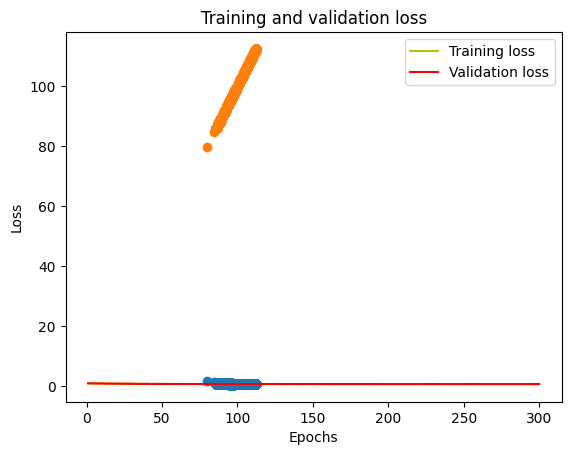

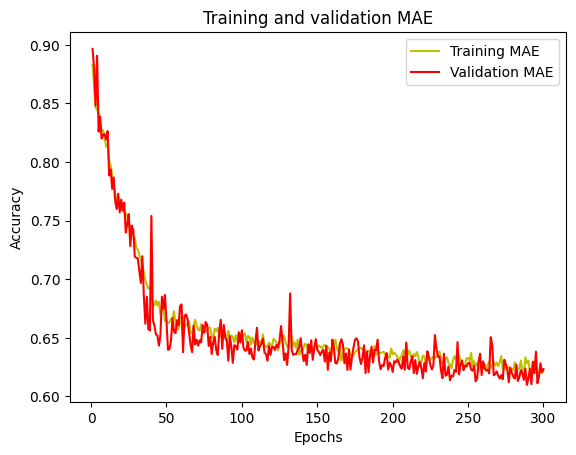

187/187 [==============================] - 0s 947us/step
Predicted values are:  [[24.068085]
 [41.43976 ]
 [24.370813]
 ...
 [27.030998]
 [39.01345 ]
 [23.217764]]
Real values are:  ts
2023-04-22 14:00:00+00:00    16.0
2021-10-27 18:00:00+00:00    75.0
2021-07-09 23:00:00+00:00    24.0
2022-04-20 12:00:00+00:00    18.0
2021-02-18 08:00:00+00:00    49.0
                             ... 
2021-06-11 12:00:00+00:00    37.0
2021-08-01 21:00:00+00:00    10.0
2021-08-27 21:00:00+00:00    15.0
2022-11-23 19:00:00+00:00    67.0
2022-08-03 01:00:00+00:00    12.0
Name: Biossido di Azoto, Length: 5976, dtype: float64


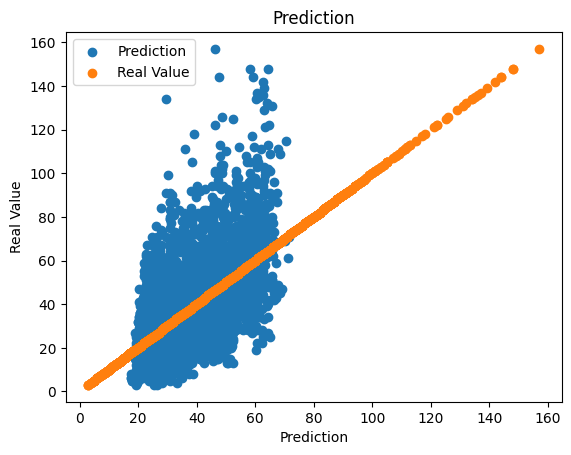

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 64)                320       
                                                                 
 dropout_64 (Dropout)        (None, 64)                0         
                                                                 
 dense_81 (Dense)            (None, 128)               8320      
                                                                 
 dropout_65 (Dropout)        (None, 128)               0         
                                                                 
 dense_82 (Dense)            (None, 64)                8256      
                                                                 
 dropout_66 (Dropout)        (None, 64)                0         
                                                                 
 dense_83 (Dense)            (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 3s 50ms/step - loss: 0.8829 - mean_squared_error: 0.8829 - val_loss: 0.6688 - val_mean_squared_error: 0.6688
Epoch 2/300
41/44 [==========================>...] - ETA: 0s - loss: 0.8251 - mean_squared_error: 0.8251
Epoch 2: val_loss improved from 0.66878 to 0.64001, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 33ms/step - loss: 0.8137 - mean_squared_error: 0.8137 - val_loss: 0.6400 - val_mean_squared_error: 0.6400
Epoch 3/300
40/44 [==========================>...] - ETA: 0s - loss: 0.7709 - mean_squared_error: 0.7709
Epoch 3: val_loss improved from 0.64001 to 0.62699, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 2s 36ms/step - loss: 0.7794 - mean_squared_error: 0.7794 - val_loss: 0.6270 - val_mean_squared_error: 0.6270
Epoch 4/300
42/44 [===========================>..] - ETA: 0s - loss: 0.7813 - mean_squared_error: 0.7813
Epoch 4: val_loss improved from 0.62699 to 0.62666, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 2s 35ms/step - loss: 0.7929 - mean_squared_error: 0.7929 - val_loss: 0.6267 - val_mean_squared_error: 0.6267
Epoch 5/300
39/44 [=========================>....] - ETA: 0s - loss: 0.7842 - mean_squared_error: 0.7842
Epoch 5: val_loss did not improve from 0.62666
44/44 [==============================] - 0s 4ms/step - loss: 0.7712 - mean_squared_error: 0.7712 - val_loss: 0.6303 - val_mean_squared_error: 0.6303
Epoch 6/300
36/44 [=======================>......] - ETA: 0s - loss: 0.7767 - mean_squared_error: 0.7767
Epoch 6: val_loss improved from 0.62666 to 0.62344, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 32ms/step - loss: 0.7737 - mean_squared_error: 0.7737 - val_loss: 0.6234 - val_mean_squared_error: 0.6234
Epoch 7/300
34/44 [======================>.......] - ETA: 0s - loss: 0.7659 - mean_squared_error: 0.7659
Epoch 7: val_loss did not improve from 0.62344
44/44 [==============================] - 0s 4ms/step - loss: 0.7601 - mean_squared_error: 0.7601 - val_loss: 0.6259 - val_mean_squared_error: 0.6259
Epoch 8/300
29/44 [==================>...........] - ETA: 0s - loss: 0.7402 - mean_squared_error: 0.7402
Epoch 8: val_loss did not improve from 0.62344
44/44 [==============================] - 0s 3ms/step - loss: 0.7605 - mean_squared_error: 0.7605 - val_loss: 0.6278 - val_mean_squared_error: 0.6278
Epoch 9/300
27/44 [=================>............] - ETA: 0s - loss: 0.8266 - mean_squared_error: 0.8266
Epoch 9: val_loss did not improve from 0.62344
44/44 [==============================] - 0s 3ms/step - loss: 0.7759 - mean_squared_error: 0.7759

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 29ms/step - loss: 0.7317 - mean_squared_error: 0.7317 - val_loss: 0.6184 - val_mean_squared_error: 0.6184
Epoch 17/300
26/44 [================>.............] - ETA: 0s - loss: 0.7077 - mean_squared_error: 0.7077
Epoch 17: val_loss improved from 0.61844 to 0.61223, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.7304 - mean_squared_error: 0.7304 - val_loss: 0.6122 - val_mean_squared_error: 0.6122
Epoch 18/300
42/44 [===========================>..] - ETA: 0s - loss: 0.7363 - mean_squared_error: 0.7363
Epoch 18: val_loss improved from 0.61223 to 0.61168, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.7319 - mean_squared_error: 0.7319 - val_loss: 0.6117 - val_mean_squared_error: 0.6117
Epoch 19/300
25/44 [================>.............] - ETA: 0s - loss: 0.7918 - mean_squared_error: 0.7918
Epoch 19: val_loss did not improve from 0.61168
44/44 [==============================] - 0s 3ms/step - loss: 0.7494 - mean_squared_error: 0.7494 - val_loss: 0.6156 - val_mean_squared_error: 0.6156
Epoch 20/300
29/44 [==================>...........] - ETA: 0s - loss: 0.7710 - mean_squared_error: 0.7710
Epoch 20: val_loss improved from 0.61168 to 0.59842, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 30ms/step - loss: 0.7129 - mean_squared_error: 0.7129 - val_loss: 0.5984 - val_mean_squared_error: 0.5984
Epoch 21/300
44/44 [==============================] - ETA: 0s - loss: 0.7211 - mean_squared_error: 0.7211
Epoch 21: val_loss improved from 0.59842 to 0.58756, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 32ms/step - loss: 0.7211 - mean_squared_error: 0.7211 - val_loss: 0.5876 - val_mean_squared_error: 0.5876
Epoch 22/300
27/44 [=================>............] - ETA: 0s - loss: 0.7295 - mean_squared_error: 0.7295
Epoch 22: val_loss did not improve from 0.58756
44/44 [==============================] - 0s 3ms/step - loss: 0.7122 - mean_squared_error: 0.7122 - val_loss: 0.5902 - val_mean_squared_error: 0.5902
Epoch 23/300
24/44 [===============>..............] - ETA: 0s - loss: 0.6701 - mean_squared_error: 0.6701
Epoch 23: val_loss did not improve from 0.58756
44/44 [==============================] - 0s 3ms/step - loss: 0.7036 - mean_squared_error: 0.7036 - val_loss: 0.5941 - val_mean_squared_error: 0.5941
Epoch 24/300
41/44 [==========================>...] - ETA: 0s - loss: 0.7028 - mean_squared_error: 0.7028
Epoch 24: val_loss did not improve from 0.58756
44/44 [==============================] - 0s 4ms/step - loss: 0.7040 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 30ms/step - loss: 0.7118 - mean_squared_error: 0.7118 - val_loss: 0.5862 - val_mean_squared_error: 0.5862
Epoch 26/300
40/44 [==========================>...] - ETA: 0s - loss: 0.7044 - mean_squared_error: 0.7044
Epoch 26: val_loss did not improve from 0.58620
44/44 [==============================] - 0s 4ms/step - loss: 0.7141 - mean_squared_error: 0.7141 - val_loss: 0.6120 - val_mean_squared_error: 0.6120
Epoch 27/300
26/44 [================>.............] - ETA: 0s - loss: 0.7517 - mean_squared_error: 0.7517
Epoch 27: val_loss improved from 0.58620 to 0.58046, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.7257 - mean_squared_error: 0.7257 - val_loss: 0.5805 - val_mean_squared_error: 0.5805
Epoch 28/300
25/44 [================>.............] - ETA: 0s - loss: 0.6729 - mean_squared_error: 0.6729
Epoch 28: val_loss improved from 0.58046 to 0.57647, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.6931 - mean_squared_error: 0.6931 - val_loss: 0.5765 - val_mean_squared_error: 0.5765
Epoch 29/300
42/44 [===========================>..] - ETA: 0s - loss: 0.6970 - mean_squared_error: 0.6970
Epoch 29: val_loss did not improve from 0.57647
44/44 [==============================] - 0s 5ms/step - loss: 0.6965 - mean_squared_error: 0.6965 - val_loss: 0.5881 - val_mean_squared_error: 0.5881
Epoch 30/300
33/44 [=====================>........] - ETA: 0s - loss: 0.7102 - mean_squared_error: 0.7102
Epoch 30: val_loss did not improve from 0.57647
44/44 [==============================] - 0s 5ms/step - loss: 0.6966 - mean_squared_error: 0.6966 - val_loss: 0.5766 - val_mean_squared_error: 0.5766
Epoch 31/300
39/44 [=========================>....] - ETA: 0s - loss: 0.6840 - mean_squared_error: 0.6840
Epoch 31: val_loss did not improve from 0.57647
44/44 [==============================] - 0s 4ms/step - loss: 0.7105 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.6818 - mean_squared_error: 0.6818 - val_loss: 0.5759 - val_mean_squared_error: 0.5759
Epoch 34/300
27/44 [=================>............] - ETA: 0s - loss: 0.6805 - mean_squared_error: 0.6805
Epoch 34: val_loss improved from 0.57589 to 0.57320, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 24ms/step - loss: 0.6784 - mean_squared_error: 0.6784 - val_loss: 0.5732 - val_mean_squared_error: 0.5732
Epoch 35/300
28/44 [==================>...........] - ETA: 0s - loss: 0.6545 - mean_squared_error: 0.6545
Epoch 35: val_loss did not improve from 0.57320
44/44 [==============================] - 0s 3ms/step - loss: 0.6907 - mean_squared_error: 0.6907 - val_loss: 0.5837 - val_mean_squared_error: 0.5837
Epoch 36/300
30/44 [===================>..........] - ETA: 0s - loss: 0.7252 - mean_squared_error: 0.7252
Epoch 36: val_loss did not improve from 0.57320
44/44 [==============================] - 0s 3ms/step - loss: 0.6971 - mean_squared_error: 0.6971 - val_loss: 0.5762 - val_mean_squared_error: 0.5762
Epoch 37/300
26/44 [================>.............] - ETA: 0s - loss: 0.7402 - mean_squared_error: 0.7402
Epoch 37: val_loss did not improve from 0.57320
44/44 [==============================] - 0s 3ms/step - loss: 0.6977 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.7009 - mean_squared_error: 0.7009 - val_loss: 0.5712 - val_mean_squared_error: 0.5712
Epoch 40/300
30/44 [===================>..........] - ETA: 0s - loss: 0.6986 - mean_squared_error: 0.6986
Epoch 40: val_loss improved from 0.57115 to 0.56955, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.7029 - mean_squared_error: 0.7029 - val_loss: 0.5696 - val_mean_squared_error: 0.5696
Epoch 41/300
38/44 [========================>.....] - ETA: 0s - loss: 0.6815 - mean_squared_error: 0.6815
Epoch 41: val_loss did not improve from 0.56955
44/44 [==============================] - 0s 4ms/step - loss: 0.6986 - mean_squared_error: 0.6986 - val_loss: 0.5705 - val_mean_squared_error: 0.5705
Epoch 42/300
28/44 [==================>...........] - ETA: 0s - loss: 0.7299 - mean_squared_error: 0.7299
Epoch 42: val_loss did not improve from 0.56955
44/44 [==============================] - 0s 3ms/step - loss: 0.6929 - mean_squared_error: 0.6929 - val_loss: 0.5828 - val_mean_squared_error: 0.5828
Epoch 43/300
30/44 [===================>..........] - ETA: 0s - loss: 0.7070 - mean_squared_error: 0.7070
Epoch 43: val_loss did not improve from 0.56955
44/44 [==============================] - 0s 3ms/step - loss: 0.6959 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 24ms/step - loss: 0.6922 - mean_squared_error: 0.6922 - val_loss: 0.5668 - val_mean_squared_error: 0.5668
Epoch 53/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6643 - mean_squared_error: 0.6643
Epoch 53: val_loss improved from 0.56676 to 0.56609, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 24ms/step - loss: 0.6724 - mean_squared_error: 0.6724 - val_loss: 0.5661 - val_mean_squared_error: 0.5661
Epoch 54/300
29/44 [==================>...........] - ETA: 0s - loss: 0.6761 - mean_squared_error: 0.6761
Epoch 54: val_loss did not improve from 0.56609
44/44 [==============================] - 0s 3ms/step - loss: 0.6862 - mean_squared_error: 0.6862 - val_loss: 0.5822 - val_mean_squared_error: 0.5822
Epoch 55/300
29/44 [==================>...........] - ETA: 0s - loss: 0.6551 - mean_squared_error: 0.6551
Epoch 55: val_loss did not improve from 0.56609
44/44 [==============================] - 0s 3ms/step - loss: 0.6741 - mean_squared_error: 0.6741 - val_loss: 0.5835 - val_mean_squared_error: 0.5835
Epoch 56/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6906 - mean_squared_error: 0.6906
Epoch 56: val_loss did not improve from 0.56609
44/44 [==============================] - 0s 3ms/step - loss: 0.6894 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.6815 - mean_squared_error: 0.6815 - val_loss: 0.5661 - val_mean_squared_error: 0.5661
Epoch 71/300
38/44 [========================>.....] - ETA: 0s - loss: 0.6889 - mean_squared_error: 0.6889
Epoch 71: val_loss did not improve from 0.56609
44/44 [==============================] - 0s 4ms/step - loss: 0.6709 - mean_squared_error: 0.6709 - val_loss: 0.5843 - val_mean_squared_error: 0.5843
Epoch 72/300
27/44 [=================>............] - ETA: 0s - loss: 0.6867 - mean_squared_error: 0.6867
Epoch 72: val_loss did not improve from 0.56609
44/44 [==============================] - 0s 3ms/step - loss: 0.6848 - mean_squared_error: 0.6848 - val_loss: 0.5810 - val_mean_squared_error: 0.5810
Epoch 73/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6649 - mean_squared_error: 0.6649
Epoch 73: val_loss did not improve from 0.56609
44/44 [==============================] - 0s 3ms/step - loss: 0.6720 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.6820 - mean_squared_error: 0.6820 - val_loss: 0.5645 - val_mean_squared_error: 0.5645
Epoch 77/300
28/44 [==================>...........] - ETA: 0s - loss: 0.6826 - mean_squared_error: 0.6826
Epoch 77: val_loss did not improve from 0.56452
44/44 [==============================] - 0s 3ms/step - loss: 0.6927 - mean_squared_error: 0.6927 - val_loss: 0.5689 - val_mean_squared_error: 0.5689
Epoch 78/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6456 - mean_squared_error: 0.6456
Epoch 78: val_loss did not improve from 0.56452
44/44 [==============================] - 0s 3ms/step - loss: 0.6728 - mean_squared_error: 0.6728 - val_loss: 0.5680 - val_mean_squared_error: 0.5680
Epoch 79/300
32/44 [====================>.........] - ETA: 0s - loss: 0.6430 - mean_squared_error: 0.6430
Epoch 79: val_loss did not improve from 0.56452
44/44 [==============================] - 0s 2ms/step - loss: 0.6761 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 24ms/step - loss: 0.6767 - mean_squared_error: 0.6767 - val_loss: 0.5618 - val_mean_squared_error: 0.5618
Epoch 82/300
26/44 [================>.............] - ETA: 0s - loss: 0.6958 - mean_squared_error: 0.6958
Epoch 82: val_loss did not improve from 0.56176
44/44 [==============================] - 0s 3ms/step - loss: 0.6722 - mean_squared_error: 0.6722 - val_loss: 0.5764 - val_mean_squared_error: 0.5764
Epoch 83/300
31/44 [====================>.........] - ETA: 0s - loss: 0.7204 - mean_squared_error: 0.7204
Epoch 83: val_loss did not improve from 0.56176
44/44 [==============================] - 0s 3ms/step - loss: 0.6983 - mean_squared_error: 0.6983 - val_loss: 0.5854 - val_mean_squared_error: 0.5854
Epoch 84/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6131 - mean_squared_error: 0.6131
Epoch 84: val_loss did not improve from 0.56176
44/44 [==============================] - 0s 3ms/step - loss: 0.6713 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 2s 44ms/step - loss: 0.6794 - mean_squared_error: 0.6794 - val_loss: 0.5597 - val_mean_squared_error: 0.5597
Epoch 99/300
29/44 [==================>...........] - ETA: 0s - loss: 0.6703 - mean_squared_error: 0.6703
Epoch 99: val_loss did not improve from 0.55971
44/44 [==============================] - 0s 3ms/step - loss: 0.6681 - mean_squared_error: 0.6681 - val_loss: 0.5609 - val_mean_squared_error: 0.5609
Epoch 100/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6913 - mean_squared_error: 0.6913
Epoch 100: val_loss did not improve from 0.55971
44/44 [==============================] - 0s 2ms/step - loss: 0.6784 - mean_squared_error: 0.6784 - val_loss: 0.5670 - val_mean_squared_error: 0.5670
Epoch 101/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6511 - mean_squared_error: 0.6511
Epoch 101: val_loss did not improve from 0.55971
44/44 [==============================] - 0s 3ms/step - loss: 0.6799 - mean_squared_err

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 24ms/step - loss: 0.6880 - mean_squared_error: 0.6880 - val_loss: 0.5593 - val_mean_squared_error: 0.5593
Epoch 116/300
27/44 [=================>............] - ETA: 0s - loss: 0.7083 - mean_squared_error: 0.7083
Epoch 116: val_loss did not improve from 0.55930
44/44 [==============================] - 0s 3ms/step - loss: 0.6622 - mean_squared_error: 0.6622 - val_loss: 0.5617 - val_mean_squared_error: 0.5617
Epoch 117/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6974 - mean_squared_error: 0.6974
Epoch 117: val_loss improved from 0.55930 to 0.55921, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.6818 - mean_squared_error: 0.6818 - val_loss: 0.5592 - val_mean_squared_error: 0.5592
Epoch 118/300
29/44 [==================>...........] - ETA: 0s - loss: 0.6571 - mean_squared_error: 0.6571
Epoch 118: val_loss did not improve from 0.55921
44/44 [==============================] - 0s 3ms/step - loss: 0.6823 - mean_squared_error: 0.6823 - val_loss: 0.5632 - val_mean_squared_error: 0.5632
Epoch 119/300
33/44 [=====================>........] - ETA: 0s - loss: 0.6419 - mean_squared_error: 0.6419
Epoch 119: val_loss improved from 0.55921 to 0.55767, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.6732 - mean_squared_error: 0.6732 - val_loss: 0.5577 - val_mean_squared_error: 0.5577
Epoch 120/300
28/44 [==================>...........] - ETA: 0s - loss: 0.5828 - mean_squared_error: 0.5828
Epoch 120: val_loss did not improve from 0.55767
44/44 [==============================] - 0s 3ms/step - loss: 0.6702 - mean_squared_error: 0.6702 - val_loss: 0.5729 - val_mean_squared_error: 0.5729
Epoch 121/300
32/44 [====================>.........] - ETA: 0s - loss: 0.6667 - mean_squared_error: 0.6667
Epoch 121: val_loss improved from 0.55767 to 0.55572, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.6790 - mean_squared_error: 0.6790 - val_loss: 0.5557 - val_mean_squared_error: 0.5557
Epoch 122/300
28/44 [==================>...........] - ETA: 0s - loss: 0.6570 - mean_squared_error: 0.6570
Epoch 122: val_loss did not improve from 0.55572
44/44 [==============================] - 0s 3ms/step - loss: 0.6715 - mean_squared_error: 0.6715 - val_loss: 0.5595 - val_mean_squared_error: 0.5595
Epoch 123/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6665 - mean_squared_error: 0.6665
Epoch 123: val_loss did not improve from 0.55572
44/44 [==============================] - 0s 2ms/step - loss: 0.6609 - mean_squared_error: 0.6609 - val_loss: 0.5576 - val_mean_squared_error: 0.5576
Epoch 124/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6661 - mean_squared_error: 0.6661
Epoch 124: val_loss improved from 0.55572 to 0.55312, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.6687 - mean_squared_error: 0.6687 - val_loss: 0.5531 - val_mean_squared_error: 0.5531
Epoch 125/300
27/44 [=================>............] - ETA: 0s - loss: 0.6568 - mean_squared_error: 0.6568
Epoch 125: val_loss did not improve from 0.55312
44/44 [==============================] - 0s 3ms/step - loss: 0.6738 - mean_squared_error: 0.6738 - val_loss: 0.5563 - val_mean_squared_error: 0.5563
Epoch 126/300
33/44 [=====================>........] - ETA: 0s - loss: 0.6694 - mean_squared_error: 0.6694
Epoch 126: val_loss did not improve from 0.55312
44/44 [==============================] - 0s 2ms/step - loss: 0.6673 - mean_squared_error: 0.6673 - val_loss: 0.5546 - val_mean_squared_error: 0.5546
Epoch 127/300
31/44 [====================>.........] - ETA: 0s - loss: 0.6742 - mean_squared_error: 0.6742
Epoch 127: val_loss did not improve from 0.55312
44/44 [==============================] - 0s 2ms/step - loss: 0.6689 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.6727 - mean_squared_error: 0.6727 - val_loss: 0.5530 - val_mean_squared_error: 0.5530
Epoch 137/300
43/44 [============================>.] - ETA: 0s - loss: 0.6713 - mean_squared_error: 0.6713
Epoch 137: val_loss did not improve from 0.55298
44/44 [==============================] - 0s 4ms/step - loss: 0.6714 - mean_squared_error: 0.6714 - val_loss: 0.5561 - val_mean_squared_error: 0.5561
Epoch 138/300
24/44 [===============>..............] - ETA: 0s - loss: 0.6193 - mean_squared_error: 0.6193
Epoch 138: val_loss did not improve from 0.55298
44/44 [==============================] - 0s 4ms/step - loss: 0.6759 - mean_squared_error: 0.6759 - val_loss: 0.5611 - val_mean_squared_error: 0.5611
Epoch 139/300
23/44 [==============>...............] - ETA: 0s - loss: 0.7145 - mean_squared_error: 0.7145
Epoch 139: val_loss did not improve from 0.55298
44/44 [==============================] - 0s 3ms/step - loss: 0.6752 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 34ms/step - loss: 0.6683 - mean_squared_error: 0.6683 - val_loss: 0.5521 - val_mean_squared_error: 0.5521
Epoch 154/300
39/44 [=========================>....] - ETA: 0s - loss: 0.6456 - mean_squared_error: 0.6456
Epoch 154: val_loss did not improve from 0.55207
44/44 [==============================] - 0s 4ms/step - loss: 0.6504 - mean_squared_error: 0.6504 - val_loss: 0.5726 - val_mean_squared_error: 0.5726
Epoch 155/300
24/44 [===============>..............] - ETA: 0s - loss: 0.6667 - mean_squared_error: 0.6667
Epoch 155: val_loss did not improve from 0.55207
44/44 [==============================] - 0s 3ms/step - loss: 0.6643 - mean_squared_error: 0.6643 - val_loss: 0.5558 - val_mean_squared_error: 0.5558
Epoch 156/300
42/44 [===========================>..] - ETA: 0s - loss: 0.6647 - mean_squared_error: 0.6647
Epoch 156: val_loss did not improve from 0.55207
44/44 [==============================] - 0s 4ms/step - loss: 0.6670 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 32ms/step - loss: 0.6596 - mean_squared_error: 0.6596 - val_loss: 0.5510 - val_mean_squared_error: 0.5510
Epoch 164/300
35/44 [======================>.......] - ETA: 0s - loss: 0.6860 - mean_squared_error: 0.6860
Epoch 164: val_loss improved from 0.55099 to 0.54750, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 2s 35ms/step - loss: 0.6707 - mean_squared_error: 0.6707 - val_loss: 0.5475 - val_mean_squared_error: 0.5475
Epoch 165/300
44/44 [==============================] - ETA: 0s - loss: 0.6596 - mean_squared_error: 0.6596
Epoch 165: val_loss did not improve from 0.54750
44/44 [==============================] - 0s 4ms/step - loss: 0.6596 - mean_squared_error: 0.6596 - val_loss: 0.5794 - val_mean_squared_error: 0.5794
Epoch 166/300
24/44 [===============>..............] - ETA: 0s - loss: 0.6614 - mean_squared_error: 0.6614
Epoch 166: val_loss did not improve from 0.54750
44/44 [==============================] - 0s 3ms/step - loss: 0.6709 - mean_squared_error: 0.6709 - val_loss: 0.5774 - val_mean_squared_error: 0.5774
Epoch 167/300
23/44 [==============>...............] - ETA: 0s - loss: 0.6625 - mean_squared_error: 0.6625
Epoch 167: val_loss did not improve from 0.54750
44/44 [==============================] - 0s 3ms/step - loss: 0.6778 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 32ms/step - loss: 0.6651 - mean_squared_error: 0.6651 - val_loss: 0.5440 - val_mean_squared_error: 0.5440
Epoch 175/300
40/44 [==========================>...] - ETA: 0s - loss: 0.6732 - mean_squared_error: 0.6732
Epoch 175: val_loss improved from 0.54397 to 0.53955, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 2s 35ms/step - loss: 0.6730 - mean_squared_error: 0.6730 - val_loss: 0.5396 - val_mean_squared_error: 0.5396
Epoch 176/300
43/44 [============================>.] - ETA: 0s - loss: 0.6704 - mean_squared_error: 0.6704
Epoch 176: val_loss did not improve from 0.53955
44/44 [==============================] - 0s 4ms/step - loss: 0.6694 - mean_squared_error: 0.6694 - val_loss: 0.5465 - val_mean_squared_error: 0.5465
Epoch 177/300
40/44 [==========================>...] - ETA: 0s - loss: 0.6751 - mean_squared_error: 0.6751
Epoch 177: val_loss did not improve from 0.53955
44/44 [==============================] - 0s 4ms/step - loss: 0.6618 - mean_squared_error: 0.6618 - val_loss: 0.5407 - val_mean_squared_error: 0.5407
Epoch 178/300
43/44 [============================>.] - ETA: 0s - loss: 0.6774 - mean_squared_error: 0.6774
Epoch 178: val_loss did not improve from 0.53955
44/44 [==============================] - 0s 3ms/step - loss: 0.6765 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 31ms/step - loss: 0.6514 - mean_squared_error: 0.6514 - val_loss: 0.5393 - val_mean_squared_error: 0.5393
Epoch 223/300
40/44 [==========================>...] - ETA: 0s - loss: 0.6465 - mean_squared_error: 0.6465
Epoch 223: val_loss did not improve from 0.53926
44/44 [==============================] - 0s 5ms/step - loss: 0.6451 - mean_squared_error: 0.6451 - val_loss: 0.5427 - val_mean_squared_error: 0.5427
Epoch 224/300
38/44 [========================>.....] - ETA: 0s - loss: 0.6553 - mean_squared_error: 0.6553
Epoch 224: val_loss did not improve from 0.53926
44/44 [==============================] - 0s 4ms/step - loss: 0.6574 - mean_squared_error: 0.6574 - val_loss: 0.5590 - val_mean_squared_error: 0.5590
Epoch 225/300
34/44 [======================>.......] - ETA: 0s - loss: 0.6688 - mean_squared_error: 0.6688
Epoch 225: val_loss did not improve from 0.53926
44/44 [==============================] - 0s 4ms/step - loss: 0.6681 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 33ms/step - loss: 0.6437 - mean_squared_error: 0.6437 - val_loss: 0.5383 - val_mean_squared_error: 0.5383
Epoch 227/300
42/44 [===========================>..] - ETA: 0s - loss: 0.6668 - mean_squared_error: 0.6668
Epoch 227: val_loss did not improve from 0.53829
44/44 [==============================] - 0s 4ms/step - loss: 0.6728 - mean_squared_error: 0.6728 - val_loss: 0.5580 - val_mean_squared_error: 0.5580
Epoch 228/300
24/44 [===============>..............] - ETA: 0s - loss: 0.6732 - mean_squared_error: 0.6732
Epoch 228: val_loss did not improve from 0.53829
44/44 [==============================] - 0s 3ms/step - loss: 0.6593 - mean_squared_error: 0.6593 - val_loss: 0.5572 - val_mean_squared_error: 0.5572
Epoch 229/300
44/44 [==============================] - ETA: 0s - loss: 0.6644 - mean_squared_error: 0.6644
Epoch 229: val_loss did not improve from 0.53829
44/44 [==============================] - 0s 4ms/step - loss: 0.6644 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 31ms/step - loss: 0.6642 - mean_squared_error: 0.6642 - val_loss: 0.5381 - val_mean_squared_error: 0.5381
Epoch 232/300
43/44 [============================>.] - ETA: 0s - loss: 0.6734 - mean_squared_error: 0.6734
Epoch 232: val_loss did not improve from 0.53811
44/44 [==============================] - 0s 4ms/step - loss: 0.6720 - mean_squared_error: 0.6720 - val_loss: 0.5414 - val_mean_squared_error: 0.5414
Epoch 233/300
44/44 [==============================] - ETA: 0s - loss: 0.6501 - mean_squared_error: 0.6501
Epoch 233: val_loss did not improve from 0.53811
44/44 [==============================] - 0s 3ms/step - loss: 0.6501 - mean_squared_error: 0.6501 - val_loss: 0.5487 - val_mean_squared_error: 0.5487
Epoch 234/300
23/44 [==============>...............] - ETA: 0s - loss: 0.6508 - mean_squared_error: 0.6508
Epoch 234: val_loss did not improve from 0.53811
44/44 [==============================] - 0s 3ms/step - loss: 0.6570 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 33ms/step - loss: 0.6556 - mean_squared_error: 0.6556 - val_loss: 0.5340 - val_mean_squared_error: 0.5340
Epoch 249/300
22/44 [==============>...............] - ETA: 0s - loss: 0.6731 - mean_squared_error: 0.6731
Epoch 249: val_loss did not improve from 0.53399
44/44 [==============================] - 0s 3ms/step - loss: 0.6670 - mean_squared_error: 0.6670 - val_loss: 0.5349 - val_mean_squared_error: 0.5349
Epoch 250/300
42/44 [===========================>..] - ETA: 0s - loss: 0.6549 - mean_squared_error: 0.6549
Epoch 250: val_loss did not improve from 0.53399
44/44 [==============================] - 0s 4ms/step - loss: 0.6611 - mean_squared_error: 0.6611 - val_loss: 0.5524 - val_mean_squared_error: 0.5524
Epoch 251/300
41/44 [==========================>...] - ETA: 0s - loss: 0.6426 - mean_squared_error: 0.6426
Epoch 251: val_loss did not improve from 0.53399
44/44 [==============================] - 0s 4ms/step - loss: 0.6441 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 32ms/step - loss: 0.6739 - mean_squared_error: 0.6739 - val_loss: 0.5335 - val_mean_squared_error: 0.5335
Epoch 259/300
23/44 [==============>...............] - ETA: 0s - loss: 0.6839 - mean_squared_error: 0.6839
Epoch 259: val_loss did not improve from 0.53347
44/44 [==============================] - 0s 4ms/step - loss: 0.6533 - mean_squared_error: 0.6533 - val_loss: 0.5468 - val_mean_squared_error: 0.5468
Epoch 260/300
44/44 [==============================] - ETA: 0s - loss: 0.6592 - mean_squared_error: 0.6592
Epoch 260: val_loss did not improve from 0.53347
44/44 [==============================] - 0s 3ms/step - loss: 0.6592 - mean_squared_error: 0.6592 - val_loss: 0.5399 - val_mean_squared_error: 0.5399
Epoch 261/300
25/44 [================>.............] - ETA: 0s - loss: 0.7102 - mean_squared_error: 0.7102
Epoch 261: val_loss did not improve from 0.53347
44/44 [==============================] - 0s 3ms/step - loss: 0.6730 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 34ms/step - loss: 0.6545 - mean_squared_error: 0.6545 - val_loss: 0.5323 - val_mean_squared_error: 0.5323
Epoch 268/300
41/44 [==========================>...] - ETA: 0s - loss: 0.6543 - mean_squared_error: 0.6543
Epoch 268: val_loss did not improve from 0.53228
44/44 [==============================] - 0s 4ms/step - loss: 0.6601 - mean_squared_error: 0.6601 - val_loss: 0.5465 - val_mean_squared_error: 0.5465
Epoch 269/300
42/44 [===========================>..] - ETA: 0s - loss: 0.6532 - mean_squared_error: 0.6532
Epoch 269: val_loss did not improve from 0.53228
44/44 [==============================] - 0s 4ms/step - loss: 0.6545 - mean_squared_error: 0.6545 - val_loss: 0.5375 - val_mean_squared_error: 0.5375
Epoch 270/300
43/44 [============================>.] - ETA: 0s - loss: 0.6516 - mean_squared_error: 0.6516
Epoch 270: val_loss did not improve from 0.53228
44/44 [==============================] - 0s 4ms/step - loss: 0.6515 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 31ms/step - loss: 0.6609 - mean_squared_error: 0.6609 - val_loss: 0.5313 - val_mean_squared_error: 0.5313
Epoch 274/300
42/44 [===========================>..] - ETA: 0s - loss: 0.6604 - mean_squared_error: 0.6604
Epoch 274: val_loss improved from 0.53128 to 0.52472, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 34ms/step - loss: 0.6585 - mean_squared_error: 0.6585 - val_loss: 0.5247 - val_mean_squared_error: 0.5247
Epoch 275/300
38/44 [========================>.....] - ETA: 0s - loss: 0.6686 - mean_squared_error: 0.6686
Epoch 275: val_loss did not improve from 0.52472
44/44 [==============================] - 0s 4ms/step - loss: 0.6602 - mean_squared_error: 0.6602 - val_loss: 0.5440 - val_mean_squared_error: 0.5440
Epoch 276/300
41/44 [==========================>...] - ETA: 0s - loss: 0.6562 - mean_squared_error: 0.6562
Epoch 276: val_loss did not improve from 0.52472
44/44 [==============================] - 0s 4ms/step - loss: 0.6580 - mean_squared_error: 0.6580 - val_loss: 0.5332 - val_mean_squared_error: 0.5332
Epoch 277/300
44/44 [==============================] - ETA: 0s - loss: 0.6592 - mean_squared_error: 0.6592
Epoch 277: val_loss did not improve from 0.52472
44/44 [==============================] - 0s 3ms/step - loss: 0.6592 - mean_squared_e

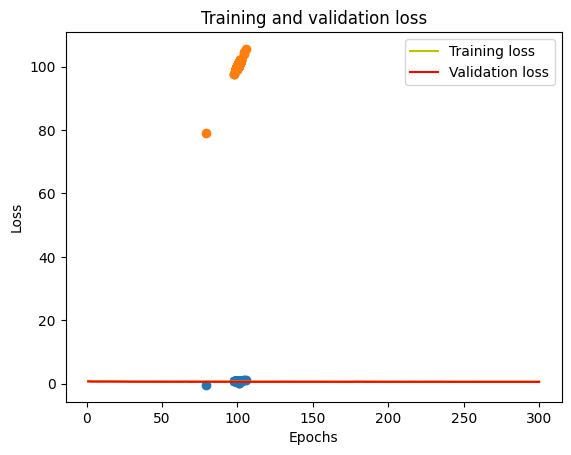

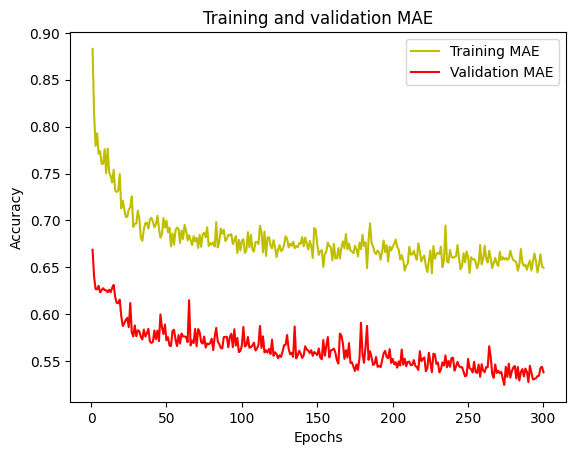

24/24 [==============================] - 0s 2ms/step
Predicted values are:  [[ 69.033264]
 [ 31.55969 ]
 [ 46.067204]
 [ 76.96778 ]
 [ 45.029472]
 [ 32.745358]
 [ 32.120365]
 [ 34.78298 ]
 [ 26.97325 ]
 [ 32.521496]
 [ 48.081123]
 [ 56.97459 ]
 [ 55.508015]
 [ 44.523506]
 [ 58.270287]
 [ 30.633635]
 [ 53.71289 ]
 [ 43.143143]
 [ 31.47834 ]
 [ 31.206383]
 [ 62.696796]
 [ 54.669106]
 [ 56.394608]
 [ 20.745243]
 [ 34.044376]
 [ 39.62976 ]
 [ 44.410576]
 [ 30.938486]
 [ 26.712679]
 [ 74.350464]
 [ 65.13162 ]
 [ 33.719196]
 [ 31.45466 ]
 [ 34.07675 ]
 [ 32.675564]
 [ 56.154015]
 [ 53.890114]
 [ 27.217281]
 [ 31.068054]
 [ 45.68176 ]
 [ 71.11271 ]
 [ 36.1784  ]
 [ 21.911764]
 [ 42.439503]
 [ 49.001522]
 [ 32.920914]
 [ 56.87881 ]
 [ 28.275204]
 [ 45.013763]
 [ 50.56765 ]
 [ 28.315214]
 [ 32.790596]
 [ 35.96593 ]
 [ 26.350445]
 [ 58.978622]
 [ 48.031918]
 [ 46.980392]
 [ 53.129913]
 [ 48.57578 ]
 [ 49.897785]
 [ 63.953262]
 [ 21.463818]
 [ 18.034348]
 [ 31.558048]
 [ 41.00723 ]
 [ 32.812542]


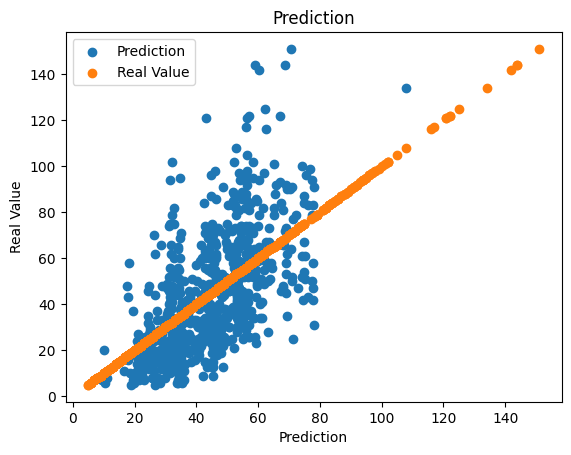

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 64)                320       
                                                                 
 dropout_68 (Dropout)        (None, 64)                0         
                                                                 
 dense_86 (Dense)            (None, 128)               8320      
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_87 (Dense)            (None, 64)                8256      
                                                                 
 dropout_70 (Dropout)        (None, 64)                0         
                                                                 
 dense_88 (Dense)            (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 3s 25ms/step - loss: 0.8655 - mean_squared_error: 0.8655 - val_loss: 0.6652 - val_mean_squared_error: 0.6652
Epoch 2/300
62/64 [============================>.] - ETA: 0s - loss: 0.7324 - mean_squared_error: 0.7324
Epoch 2: val_loss improved from 0.66520 to 0.58768, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.7322 - mean_squared_error: 0.7322 - val_loss: 0.5877 - val_mean_squared_error: 0.5877
Epoch 3/300
53/64 [=======================>......] - ETA: 0s - loss: 0.6756 - mean_squared_error: 0.6756
Epoch 3: val_loss did not improve from 0.58768
64/64 [==============================] - 0s 4ms/step - loss: 0.6912 - mean_squared_error: 0.6912 - val_loss: 0.6132 - val_mean_squared_error: 0.6132
Epoch 4/300
63/64 [============================>.] - ETA: 0s - loss: 0.6931 - mean_squared_error: 0.6931
Epoch 4: val_loss improved from 0.58768 to 0.56624, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 2s 24ms/step - loss: 0.6925 - mean_squared_error: 0.6925 - val_loss: 0.5662 - val_mean_squared_error: 0.5662
Epoch 5/300
52/64 [=======================>......] - ETA: 0s - loss: 0.6599 - mean_squared_error: 0.6599
Epoch 5: val_loss improved from 0.56624 to 0.56385, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 2s 24ms/step - loss: 0.6732 - mean_squared_error: 0.6732 - val_loss: 0.5638 - val_mean_squared_error: 0.5638
Epoch 6/300
60/64 [===========================>..] - ETA: 0s - loss: 0.6490 - mean_squared_error: 0.6490
Epoch 6: val_loss improved from 0.56385 to 0.55402, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 3s 42ms/step - loss: 0.6539 - mean_squared_error: 0.6539 - val_loss: 0.5540 - val_mean_squared_error: 0.5540
Epoch 7/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6890 - mean_squared_error: 0.6890
Epoch 7: val_loss did not improve from 0.55402
64/64 [==============================] - 0s 3ms/step - loss: 0.6632 - mean_squared_error: 0.6632 - val_loss: 0.5542 - val_mean_squared_error: 0.5542
Epoch 8/300
53/64 [=======================>......] - ETA: 0s - loss: 0.6535 - mean_squared_error: 0.6535
Epoch 8: val_loss did not improve from 0.55402
64/64 [==============================] - 0s 3ms/step - loss: 0.6534 - mean_squared_error: 0.6534 - val_loss: 0.5550 - val_mean_squared_error: 0.5550
Epoch 9/300
52/64 [=======================>......] - ETA: 0s - loss: 0.6565 - mean_squared_error: 0.6565
Epoch 9: val_loss did not improve from 0.55402
64/64 [==============================] - 0s 3ms/step - loss: 0.6469 - mean_squared_error: 0.6469

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6535 - mean_squared_error: 0.6535 - val_loss: 0.5521 - val_mean_squared_error: 0.5521
Epoch 12/300
43/64 [===================>..........] - ETA: 0s - loss: 0.6647 - mean_squared_error: 0.6647
Epoch 12: val_loss did not improve from 0.55206
64/64 [==============================] - 0s 3ms/step - loss: 0.6566 - mean_squared_error: 0.6566 - val_loss: 0.5569 - val_mean_squared_error: 0.5569
Epoch 13/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6409 - mean_squared_error: 0.6409
Epoch 13: val_loss did not improve from 0.55206
64/64 [==============================] - 0s 3ms/step - loss: 0.6539 - mean_squared_error: 0.6539 - val_loss: 0.5533 - val_mean_squared_error: 0.5533
Epoch 14/300
47/64 [=====================>........] - ETA: 0s - loss: 0.6235 - mean_squared_error: 0.6235
Epoch 14: val_loss improved from 0.55206 to 0.54672, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.5467 - val_mean_squared_error: 0.5467
Epoch 15/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6203 - mean_squared_error: 0.6203
Epoch 15: val_loss improved from 0.54672 to 0.54465, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 2s 24ms/step - loss: 0.6395 - mean_squared_error: 0.6395 - val_loss: 0.5447 - val_mean_squared_error: 0.5447
Epoch 16/300
62/64 [============================>.] - ETA: 0s - loss: 0.6273 - mean_squared_error: 0.6273
Epoch 16: val_loss did not improve from 0.54465
64/64 [==============================] - 0s 3ms/step - loss: 0.6315 - mean_squared_error: 0.6315 - val_loss: 0.5660 - val_mean_squared_error: 0.5660
Epoch 17/300
63/64 [============================>.] - ETA: 0s - loss: 0.6388 - mean_squared_error: 0.6388
Epoch 17: val_loss improved from 0.54465 to 0.54462, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6349 - mean_squared_error: 0.6349 - val_loss: 0.5446 - val_mean_squared_error: 0.5446
Epoch 18/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 18: val_loss improved from 0.54462 to 0.53879, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6351 - mean_squared_error: 0.6351 - val_loss: 0.5388 - val_mean_squared_error: 0.5388
Epoch 19/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6388 - mean_squared_error: 0.6388
Epoch 19: val_loss did not improve from 0.53879
64/64 [==============================] - 0s 3ms/step - loss: 0.6315 - mean_squared_error: 0.6315 - val_loss: 0.5476 - val_mean_squared_error: 0.5476
Epoch 20/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6423 - mean_squared_error: 0.6423
Epoch 20: val_loss did not improve from 0.53879
64/64 [==============================] - 0s 3ms/step - loss: 0.6369 - mean_squared_error: 0.6369 - val_loss: 0.5450 - val_mean_squared_error: 0.5450
Epoch 21/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6719 - mean_squared_error: 0.6719
Epoch 21: val_loss did not improve from 0.53879
64/64 [==============================] - 0s 3ms/step - loss: 0.6428 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 22ms/step - loss: 0.6267 - mean_squared_error: 0.6267 - val_loss: 0.5370 - val_mean_squared_error: 0.5370
Epoch 33/300
64/64 [==============================] - ETA: 0s - loss: 0.6277 - mean_squared_error: 0.6277
Epoch 33: val_loss did not improve from 0.53701
64/64 [==============================] - 0s 3ms/step - loss: 0.6277 - mean_squared_error: 0.6277 - val_loss: 0.5736 - val_mean_squared_error: 0.5736
Epoch 34/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6221 - mean_squared_error: 0.6221
Epoch 34: val_loss improved from 0.53701 to 0.53628, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6312 - mean_squared_error: 0.6312 - val_loss: 0.5363 - val_mean_squared_error: 0.5363
Epoch 35/300
64/64 [==============================] - ETA: 0s - loss: 0.6196 - mean_squared_error: 0.6196
Epoch 35: val_loss did not improve from 0.53628
64/64 [==============================] - 0s 3ms/step - loss: 0.6196 - mean_squared_error: 0.6196 - val_loss: 0.5422 - val_mean_squared_error: 0.5422
Epoch 36/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6239 - mean_squared_error: 0.6239
Epoch 36: val_loss did not improve from 0.53628
64/64 [==============================] - 0s 3ms/step - loss: 0.6268 - mean_squared_error: 0.6268 - val_loss: 0.5434 - val_mean_squared_error: 0.5434
Epoch 37/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6389 - mean_squared_error: 0.6389
Epoch 37: val_loss did not improve from 0.53628
64/64 [==============================] - 0s 3ms/step - loss: 0.6120 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6218 - mean_squared_error: 0.6218 - val_loss: 0.5354 - val_mean_squared_error: 0.5354
Epoch 49/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6137 - mean_squared_error: 0.6137
Epoch 49: val_loss did not improve from 0.53537
64/64 [==============================] - 0s 3ms/step - loss: 0.6199 - mean_squared_error: 0.6199 - val_loss: 0.5564 - val_mean_squared_error: 0.5564
Epoch 50/300
48/64 [=====================>........] - ETA: 0s - loss: 0.6036 - mean_squared_error: 0.6036
Epoch 50: val_loss improved from 0.53537 to 0.53096, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6222 - mean_squared_error: 0.6222 - val_loss: 0.5310 - val_mean_squared_error: 0.5310
Epoch 51/300
63/64 [============================>.] - ETA: 0s - loss: 0.6147 - mean_squared_error: 0.6147
Epoch 51: val_loss did not improve from 0.53096
64/64 [==============================] - 0s 3ms/step - loss: 0.6086 - mean_squared_error: 0.6086 - val_loss: 0.5357 - val_mean_squared_error: 0.5357
Epoch 52/300
46/64 [====================>.........] - ETA: 0s - loss: 0.6224 - mean_squared_error: 0.6224
Epoch 52: val_loss did not improve from 0.53096
64/64 [==============================] - 0s 3ms/step - loss: 0.6154 - mean_squared_error: 0.6154 - val_loss: 0.5548 - val_mean_squared_error: 0.5548
Epoch 53/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6438 - mean_squared_error: 0.6438
Epoch 53: val_loss did not improve from 0.53096
64/64 [==============================] - 0s 3ms/step - loss: 0.6136 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6169 - mean_squared_error: 0.6169 - val_loss: 0.5305 - val_mean_squared_error: 0.5305
Epoch 66/300
63/64 [============================>.] - ETA: 0s - loss: 0.6245 - mean_squared_error: 0.6245
Epoch 66: val_loss did not improve from 0.53050
64/64 [==============================] - 0s 3ms/step - loss: 0.6182 - mean_squared_error: 0.6182 - val_loss: 0.5461 - val_mean_squared_error: 0.5461
Epoch 67/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6296 - mean_squared_error: 0.6296
Epoch 67: val_loss did not improve from 0.53050
64/64 [==============================] - 0s 3ms/step - loss: 0.6213 - mean_squared_error: 0.6213 - val_loss: 0.5330 - val_mean_squared_error: 0.5330
Epoch 68/300
43/64 [===================>..........] - ETA: 0s - loss: 0.5994 - mean_squared_error: 0.5994
Epoch 68: val_loss did not improve from 0.53050
64/64 [==============================] - 0s 3ms/step - loss: 0.6043 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 22ms/step - loss: 0.6142 - mean_squared_error: 0.6142 - val_loss: 0.5278 - val_mean_squared_error: 0.5278
Epoch 89/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6094 - mean_squared_error: 0.6094
Epoch 89: val_loss did not improve from 0.52781
64/64 [==============================] - 0s 3ms/step - loss: 0.6147 - mean_squared_error: 0.6147 - val_loss: 0.5339 - val_mean_squared_error: 0.5339
Epoch 90/300
56/64 [=========================>....] - ETA: 0s - loss: 0.6221 - mean_squared_error: 0.6221
Epoch 90: val_loss did not improve from 0.52781
64/64 [==============================] - 0s 4ms/step - loss: 0.6168 - mean_squared_error: 0.6168 - val_loss: 0.5512 - val_mean_squared_error: 0.5512
Epoch 91/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6211 - mean_squared_error: 0.6211
Epoch 91: val_loss improved from 0.52781 to 0.52518, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6223 - mean_squared_error: 0.6223 - val_loss: 0.5252 - val_mean_squared_error: 0.5252
Epoch 92/300
63/64 [============================>.] - ETA: 0s - loss: 0.5970 - mean_squared_error: 0.5970
Epoch 92: val_loss did not improve from 0.52518
64/64 [==============================] - 0s 3ms/step - loss: 0.6007 - mean_squared_error: 0.6007 - val_loss: 0.5330 - val_mean_squared_error: 0.5330
Epoch 93/300
49/64 [=====================>........] - ETA: 0s - loss: 0.6020 - mean_squared_error: 0.6020
Epoch 93: val_loss did not improve from 0.52518
64/64 [==============================] - 0s 3ms/step - loss: 0.6156 - mean_squared_error: 0.6156 - val_loss: 0.5551 - val_mean_squared_error: 0.5551
Epoch 94/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6081 - mean_squared_error: 0.6081
Epoch 94: val_loss did not improve from 0.52518
64/64 [==============================] - 0s 3ms/step - loss: 0.6238 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6163 - mean_squared_error: 0.6163 - val_loss: 0.5237 - val_mean_squared_error: 0.5237
Epoch 104/300
45/64 [====================>.........] - ETA: 0s - loss: 0.5782 - mean_squared_error: 0.5782
Epoch 104: val_loss did not improve from 0.52370
64/64 [==============================] - 0s 3ms/step - loss: 0.6120 - mean_squared_error: 0.6120 - val_loss: 0.5598 - val_mean_squared_error: 0.5598
Epoch 105/300
46/64 [====================>.........] - ETA: 0s - loss: 0.6083 - mean_squared_error: 0.6083
Epoch 105: val_loss did not improve from 0.52370
64/64 [==============================] - 0s 3ms/step - loss: 0.6130 - mean_squared_error: 0.6130 - val_loss: 0.5393 - val_mean_squared_error: 0.5393
Epoch 106/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6281 - mean_squared_error: 0.6281
Epoch 106: val_loss did not improve from 0.52370
64/64 [==============================] - 0s 3ms/step - loss: 0.6065 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6060 - mean_squared_error: 0.6060 - val_loss: 0.5225 - val_mean_squared_error: 0.5225
Epoch 135/300
62/64 [============================>.] - ETA: 0s - loss: 0.6177 - mean_squared_error: 0.6177
Epoch 135: val_loss did not improve from 0.52253
64/64 [==============================] - 0s 3ms/step - loss: 0.6146 - mean_squared_error: 0.6146 - val_loss: 0.5262 - val_mean_squared_error: 0.5262
Epoch 136/300
44/64 [===================>..........] - ETA: 0s - loss: 0.6124 - mean_squared_error: 0.6124
Epoch 136: val_loss did not improve from 0.52253
64/64 [==============================] - 0s 3ms/step - loss: 0.6026 - mean_squared_error: 0.6026 - val_loss: 0.5427 - val_mean_squared_error: 0.5427
Epoch 137/300
46/64 [====================>.........] - ETA: 0s - loss: 0.6113 - mean_squared_error: 0.6113
Epoch 137: val_loss did not improve from 0.52253
64/64 [==============================] - 0s 3ms/step - loss: 0.6047 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 22ms/step - loss: 0.6167 - mean_squared_error: 0.6167 - val_loss: 0.5202 - val_mean_squared_error: 0.5202
Epoch 143/300
45/64 [====================>.........] - ETA: 0s - loss: 0.5966 - mean_squared_error: 0.5966
Epoch 143: val_loss did not improve from 0.52024
64/64 [==============================] - 0s 3ms/step - loss: 0.6057 - mean_squared_error: 0.6057 - val_loss: 0.5250 - val_mean_squared_error: 0.5250
Epoch 144/300
45/64 [====================>.........] - ETA: 0s - loss: 0.6189 - mean_squared_error: 0.6189
Epoch 144: val_loss did not improve from 0.52024
64/64 [==============================] - 0s 3ms/step - loss: 0.6032 - mean_squared_error: 0.6032 - val_loss: 0.5321 - val_mean_squared_error: 0.5321
Epoch 145/300
64/64 [==============================] - ETA: 0s - loss: 0.6020 - mean_squared_error: 0.6020
Epoch 145: val_loss did not improve from 0.52024
64/64 [==============================] - 0s 3ms/step - loss: 0.6020 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.6122 - mean_squared_error: 0.6122 - val_loss: 0.5182 - val_mean_squared_error: 0.5182
Epoch 158/300
63/64 [============================>.] - ETA: 0s - loss: 0.6024 - mean_squared_error: 0.6024
Epoch 158: val_loss did not improve from 0.51818
64/64 [==============================] - 0s 3ms/step - loss: 0.5995 - mean_squared_error: 0.5995 - val_loss: 0.5207 - val_mean_squared_error: 0.5207
Epoch 159/300
45/64 [====================>.........] - ETA: 0s - loss: 0.5843 - mean_squared_error: 0.5843
Epoch 159: val_loss did not improve from 0.51818
64/64 [==============================] - 0s 3ms/step - loss: 0.5983 - mean_squared_error: 0.5983 - val_loss: 0.5518 - val_mean_squared_error: 0.5518
Epoch 160/300
64/64 [==============================] - ETA: 0s - loss: 0.5922 - mean_squared_error: 0.5922
Epoch 160: val_loss did not improve from 0.51818
64/64 [==============================] - 0s 3ms/step - loss: 0.5922 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.5982 - mean_squared_error: 0.5982 - val_loss: 0.5165 - val_mean_squared_error: 0.5165
Epoch 163/300
43/64 [===================>..........] - ETA: 0s - loss: 0.5962 - mean_squared_error: 0.5962
Epoch 163: val_loss did not improve from 0.51646
64/64 [==============================] - 0s 3ms/step - loss: 0.6003 - mean_squared_error: 0.6003 - val_loss: 0.5272 - val_mean_squared_error: 0.5272
Epoch 164/300
46/64 [====================>.........] - ETA: 0s - loss: 0.6224 - mean_squared_error: 0.6224
Epoch 164: val_loss did not improve from 0.51646
64/64 [==============================] - 0s 3ms/step - loss: 0.6014 - mean_squared_error: 0.6014 - val_loss: 0.5185 - val_mean_squared_error: 0.5185
Epoch 165/300
46/64 [====================>.........] - ETA: 0s - loss: 0.5848 - mean_squared_error: 0.5848
Epoch 165: val_loss did not improve from 0.51646
64/64 [==============================] - 0s 3ms/step - loss: 0.6008 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.5940 - mean_squared_error: 0.5940 - val_loss: 0.5155 - val_mean_squared_error: 0.5155
Epoch 171/300
61/64 [===========================>..] - ETA: 0s - loss: 0.5883 - mean_squared_error: 0.5883
Epoch 171: val_loss did not improve from 0.51550
64/64 [==============================] - 0s 3ms/step - loss: 0.5928 - mean_squared_error: 0.5928 - val_loss: 0.5174 - val_mean_squared_error: 0.5174
Epoch 172/300
44/64 [===================>..........] - ETA: 0s - loss: 0.5620 - mean_squared_error: 0.5620
Epoch 172: val_loss did not improve from 0.51550
64/64 [==============================] - 0s 3ms/step - loss: 0.5960 - mean_squared_error: 0.5960 - val_loss: 0.5311 - val_mean_squared_error: 0.5311
Epoch 173/300
43/64 [===================>..........] - ETA: 0s - loss: 0.5939 - mean_squared_error: 0.5939
Epoch 173: val_loss did not improve from 0.51550
64/64 [==============================] - 0s 3ms/step - loss: 0.5825 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 23ms/step - loss: 0.5831 - mean_squared_error: 0.5831 - val_loss: 0.5151 - val_mean_squared_error: 0.5151
Epoch 188/300
43/64 [===================>..........] - ETA: 0s - loss: 0.6152 - mean_squared_error: 0.6152
Epoch 188: val_loss did not improve from 0.51513
64/64 [==============================] - 0s 3ms/step - loss: 0.5897 - mean_squared_error: 0.5897 - val_loss: 0.5213 - val_mean_squared_error: 0.5213
Epoch 189/300
58/64 [==========================>...] - ETA: 0s - loss: 0.5922 - mean_squared_error: 0.5922
Epoch 189: val_loss improved from 0.51513 to 0.50475, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 20ms/step - loss: 0.5911 - mean_squared_error: 0.5911 - val_loss: 0.5048 - val_mean_squared_error: 0.5048
Epoch 190/300
45/64 [====================>.........] - ETA: 0s - loss: 0.5985 - mean_squared_error: 0.5985
Epoch 190: val_loss did not improve from 0.50475
64/64 [==============================] - 0s 3ms/step - loss: 0.5875 - mean_squared_error: 0.5875 - val_loss: 0.5177 - val_mean_squared_error: 0.5177
Epoch 191/300
50/64 [======================>.......] - ETA: 0s - loss: 0.5882 - mean_squared_error: 0.5882
Epoch 191: val_loss did not improve from 0.50475
64/64 [==============================] - 0s 3ms/step - loss: 0.5893 - mean_squared_error: 0.5893 - val_loss: 0.5169 - val_mean_squared_error: 0.5169
Epoch 192/300
46/64 [====================>.........] - ETA: 0s - loss: 0.5876 - mean_squared_error: 0.5876
Epoch 192: val_loss did not improve from 0.50475
64/64 [==============================] - 0s 3ms/step - loss: 0.6022 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 19ms/step - loss: 0.5981 - mean_squared_error: 0.5981 - val_loss: 0.5013 - val_mean_squared_error: 0.5013
Epoch 206/300
61/64 [===========================>..] - ETA: 0s - loss: 0.5617 - mean_squared_error: 0.5617
Epoch 206: val_loss did not improve from 0.50134
64/64 [==============================] - 0s 3ms/step - loss: 0.5727 - mean_squared_error: 0.5727 - val_loss: 0.5562 - val_mean_squared_error: 0.5562
Epoch 207/300
62/64 [============================>.] - ETA: 0s - loss: 0.5979 - mean_squared_error: 0.5979
Epoch 207: val_loss did not improve from 0.50134
64/64 [==============================] - 0s 3ms/step - loss: 0.5933 - mean_squared_error: 0.5933 - val_loss: 0.5246 - val_mean_squared_error: 0.5246
Epoch 208/300
64/64 [==============================] - ETA: 0s - loss: 0.5855 - mean_squared_error: 0.5855
Epoch 208: val_loss did not improve from 0.50134
64/64 [==============================] - 0s 3ms/step - loss: 0.5855 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 2s 24ms/step - loss: 0.5883 - mean_squared_error: 0.5883 - val_loss: 0.4989 - val_mean_squared_error: 0.4989
Epoch 225/300
53/64 [=======================>......] - ETA: 0s - loss: 0.5974 - mean_squared_error: 0.5974
Epoch 225: val_loss did not improve from 0.49890
64/64 [==============================] - 0s 3ms/step - loss: 0.5772 - mean_squared_error: 0.5772 - val_loss: 0.5105 - val_mean_squared_error: 0.5105
Epoch 226/300
54/64 [========================>.....] - ETA: 0s - loss: 0.5871 - mean_squared_error: 0.5871
Epoch 226: val_loss did not improve from 0.49890
64/64 [==============================] - 0s 3ms/step - loss: 0.5854 - mean_squared_error: 0.5854 - val_loss: 0.5013 - val_mean_squared_error: 0.5013
Epoch 227/300
57/64 [=========================>....] - ETA: 0s - loss: 0.5790 - mean_squared_error: 0.5790
Epoch 227: val_loss did not improve from 0.49890
64/64 [==============================] - 0s 2ms/step - loss: 0.5725 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 2s 24ms/step - loss: 0.5792 - mean_squared_error: 0.5792 - val_loss: 0.4984 - val_mean_squared_error: 0.4984
Epoch 241/300
59/64 [==========================>...] - ETA: 0s - loss: 0.5718 - mean_squared_error: 0.5718
Epoch 241: val_loss improved from 0.49844 to 0.49197, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 2s 30ms/step - loss: 0.5750 - mean_squared_error: 0.5750 - val_loss: 0.4920 - val_mean_squared_error: 0.4920
Epoch 242/300
56/64 [=========================>....] - ETA: 0s - loss: 0.5901 - mean_squared_error: 0.5901
Epoch 242: val_loss did not improve from 0.49197
64/64 [==============================] - 0s 3ms/step - loss: 0.5851 - mean_squared_error: 0.5851 - val_loss: 0.5013 - val_mean_squared_error: 0.5013
Epoch 243/300
55/64 [========================>.....] - ETA: 0s - loss: 0.5698 - mean_squared_error: 0.5698
Epoch 243: val_loss did not improve from 0.49197
64/64 [==============================] - 0s 2ms/step - loss: 0.5691 - mean_squared_error: 0.5691 - val_loss: 0.5357 - val_mean_squared_error: 0.5357
Epoch 244/300
59/64 [==========================>...] - ETA: 0s - loss: 0.5720 - mean_squared_error: 0.5720
Epoch 244: val_loss did not improve from 0.49197
64/64 [==============================] - 0s 2ms/step - loss: 0.5818 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 21ms/step - loss: 0.5812 - mean_squared_error: 0.5812 - val_loss: 0.4859 - val_mean_squared_error: 0.4859
Epoch 247/300
50/64 [======================>.......] - ETA: 0s - loss: 0.5679 - mean_squared_error: 0.5679
Epoch 247: val_loss did not improve from 0.48595
64/64 [==============================] - 0s 3ms/step - loss: 0.5713 - mean_squared_error: 0.5713 - val_loss: 0.5055 - val_mean_squared_error: 0.5055
Epoch 248/300
58/64 [==========================>...] - ETA: 0s - loss: 0.5848 - mean_squared_error: 0.5848
Epoch 248: val_loss did not improve from 0.48595
64/64 [==============================] - 0s 2ms/step - loss: 0.5837 - mean_squared_error: 0.5837 - val_loss: 0.5041 - val_mean_squared_error: 0.5041
Epoch 249/300
58/64 [==========================>...] - ETA: 0s - loss: 0.5790 - mean_squared_error: 0.5790
Epoch 249: val_loss did not improve from 0.48595
64/64 [==============================] - 0s 2ms/step - loss: 0.5824 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 21ms/step - loss: 0.5697 - mean_squared_error: 0.5697 - val_loss: 0.4845 - val_mean_squared_error: 0.4845
Epoch 253/300
61/64 [===========================>..] - ETA: 0s - loss: 0.5630 - mean_squared_error: 0.5630
Epoch 253: val_loss did not improve from 0.48448
64/64 [==============================] - 0s 3ms/step - loss: 0.5642 - mean_squared_error: 0.5642 - val_loss: 0.5013 - val_mean_squared_error: 0.5013
Epoch 254/300
49/64 [=====================>........] - ETA: 0s - loss: 0.5591 - mean_squared_error: 0.5591
Epoch 254: val_loss did not improve from 0.48448
64/64 [==============================] - 0s 3ms/step - loss: 0.5799 - mean_squared_error: 0.5799 - val_loss: 0.5013 - val_mean_squared_error: 0.5013
Epoch 255/300
63/64 [============================>.] - ETA: 0s - loss: 0.5845 - mean_squared_error: 0.5845
Epoch 255: val_loss did not improve from 0.48448
64/64 [==============================] - 0s 3ms/step - loss: 0.5845 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


64/64 [==============================] - 1s 17ms/step - loss: 0.5672 - mean_squared_error: 0.5672 - val_loss: 0.4794 - val_mean_squared_error: 0.4794
Epoch 276/300
49/64 [=====================>........] - ETA: 0s - loss: 0.5629 - mean_squared_error: 0.5629
Epoch 276: val_loss did not improve from 0.47943
64/64 [==============================] - 0s 3ms/step - loss: 0.5664 - mean_squared_error: 0.5664 - val_loss: 0.5058 - val_mean_squared_error: 0.5058
Epoch 277/300
51/64 [======================>.......] - ETA: 0s - loss: 0.5592 - mean_squared_error: 0.5592
Epoch 277: val_loss did not improve from 0.47943
64/64 [==============================] - 0s 3ms/step - loss: 0.5698 - mean_squared_error: 0.5698 - val_loss: 0.5007 - val_mean_squared_error: 0.5007
Epoch 278/300
55/64 [========================>.....] - ETA: 0s - loss: 0.5821 - mean_squared_error: 0.5821
Epoch 278: val_loss did not improve from 0.47943
64/64 [==============================] - 0s 2ms/step - loss: 0.5752 - mean_squared_e

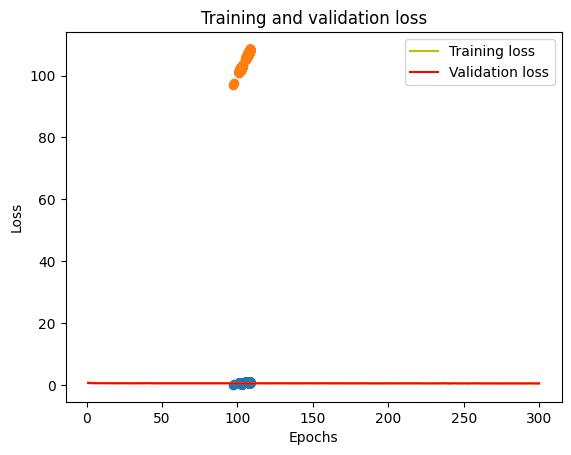

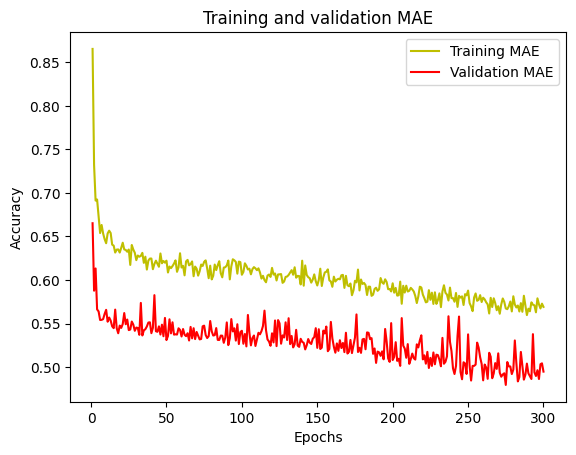

35/35 [==============================] - 0s 851us/step
Predicted values are:  [[30.626305]
 [24.54588 ]
 [74.60028 ]
 ...
 [50.43082 ]
 [54.15159 ]
 [44.549294]]
Real values are:  ts
2021-03-09 13:00:00+00:00    27.0
2021-03-24 16:00:00+00:00    41.0
2021-01-23 01:00:00+00:00    55.0
2021-06-01 22:00:00+00:00    13.0
2021-04-18 06:00:00+00:00    32.0
                             ... 
2021-06-04 02:00:00+00:00    21.0
2021-02-22 22:00:00+00:00    47.0
2021-02-22 01:00:00+00:00    31.0
2021-02-01 20:00:00+00:00    58.0
2021-04-20 10:00:00+00:00    35.0
Name: Biossido di Azoto, Length: 1096, dtype: float64


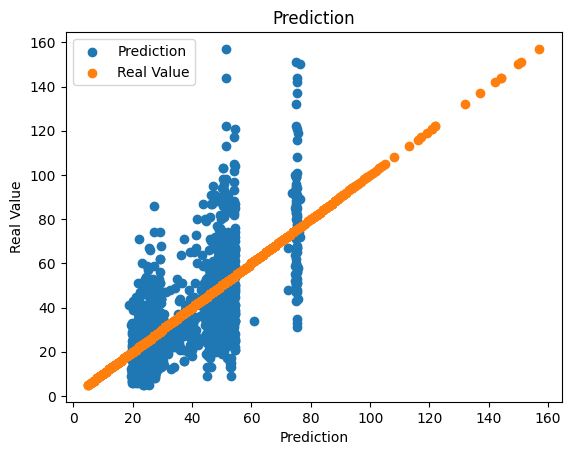

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 64)                320       
                                                                 
 dropout_72 (Dropout)        (None, 64)                0         
                                                                 
 dense_91 (Dense)            (None, 128)               8320      
                                                                 
 dropout_73 (Dropout)        (None, 128)               0         
                                                                 
 dense_92 (Dense)            (None, 64)                8256      
                                                                 
 dropout_74 (Dropout)        (None, 64)                0         
                                                                 
 dense_93 (Dense)            (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 4s 8ms/step - loss: 0.8835 - mean_squared_error: 0.8835 - val_loss: 0.8911 - val_mean_squared_error: 0.8911
Epoch 2/300
335/349 [===========================>..] - ETA: 0s - loss: 0.8616 - mean_squared_error: 0.8616
Epoch 2: val_loss improved from 0.89111 to 0.87383, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.8613 - mean_squared_error: 0.8613 - val_loss: 0.8738 - val_mean_squared_error: 0.8738
Epoch 3/300
341/349 [============================>.] - ETA: 0s - loss: 0.8559 - mean_squared_error: 0.8559
Epoch 3: val_loss improved from 0.87383 to 0.86481, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.8562 - mean_squared_error: 0.8562 - val_loss: 0.8648 - val_mean_squared_error: 0.8648
Epoch 4/300
340/349 [============================>.] - ETA: 0s - loss: 0.8470 - mean_squared_error: 0.8470
Epoch 4: val_loss improved from 0.86481 to 0.85958, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.8478 - mean_squared_error: 0.8478 - val_loss: 0.8596 - val_mean_squared_error: 0.8596
Epoch 5/300
325/349 [==========================>...] - ETA: 0s - loss: 0.8419 - mean_squared_error: 0.8419
Epoch 5: val_loss improved from 0.85958 to 0.84446, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.8384 - mean_squared_error: 0.8384 - val_loss: 0.8445 - val_mean_squared_error: 0.8445
Epoch 6/300
345/349 [============================>.] - ETA: 0s - loss: 0.8312 - mean_squared_error: 0.8312
Epoch 6: val_loss improved from 0.84446 to 0.84236, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.8301 - mean_squared_error: 0.8301 - val_loss: 0.8424 - val_mean_squared_error: 0.8424
Epoch 7/300
335/349 [===========================>..] - ETA: 0s - loss: 0.8299 - mean_squared_error: 0.8299
Epoch 7: val_loss improved from 0.84236 to 0.81526, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.8277 - mean_squared_error: 0.8277 - val_loss: 0.8153 - val_mean_squared_error: 0.8153
Epoch 8/300
349/349 [==============================] - ETA: 0s - loss: 0.8149 - mean_squared_error: 0.8149
Epoch 8: val_loss did not improve from 0.81526
349/349 [==============================] - 1s 3ms/step - loss: 0.8149 - mean_squared_error: 0.8149 - val_loss: 0.8548 - val_mean_squared_error: 0.8548
Epoch 9/300
343/349 [============================>.] - ETA: 0s - loss: 0.7967 - mean_squared_error: 0.7967
Epoch 9: val_loss improved from 0.81526 to 0.80450, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7959 - mean_squared_error: 0.7959 - val_loss: 0.8045 - val_mean_squared_error: 0.8045
Epoch 10/300
330/349 [===========================>..] - ETA: 0s - loss: 0.7863 - mean_squared_error: 0.7863
Epoch 10: val_loss improved from 0.80450 to 0.78133, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7874 - mean_squared_error: 0.7874 - val_loss: 0.7813 - val_mean_squared_error: 0.7813
Epoch 11/300
328/349 [===========================>..] - ETA: 0s - loss: 0.7874 - mean_squared_error: 0.7874
Epoch 11: val_loss improved from 0.78133 to 0.77414, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7800 - mean_squared_error: 0.7800 - val_loss: 0.7741 - val_mean_squared_error: 0.7741
Epoch 12/300
338/349 [============================>.] - ETA: 0s - loss: 0.7829 - mean_squared_error: 0.7829
Epoch 12: val_loss improved from 0.77414 to 0.76790, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7804 - mean_squared_error: 0.7804 - val_loss: 0.7679 - val_mean_squared_error: 0.7679
Epoch 13/300
347/349 [============================>.] - ETA: 0s - loss: 0.7641 - mean_squared_error: 0.7641
Epoch 13: val_loss improved from 0.76790 to 0.76417, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7642 - mean_squared_error: 0.7642 - val_loss: 0.7642 - val_mean_squared_error: 0.7642
Epoch 14/300
335/349 [===========================>..] - ETA: 0s - loss: 0.7656 - mean_squared_error: 0.7656
Epoch 14: val_loss did not improve from 0.76417
349/349 [==============================] - 1s 3ms/step - loss: 0.7701 - mean_squared_error: 0.7701 - val_loss: 0.7684 - val_mean_squared_error: 0.7684
Epoch 15/300
343/349 [============================>.] - ETA: 0s - loss: 0.7625 - mean_squared_error: 0.7625
Epoch 15: val_loss did not improve from 0.76417
349/349 [==============================] - 1s 2ms/step - loss: 0.7640 - mean_squared_error: 0.7640 - val_loss: 0.7806 - val_mean_squared_error: 0.7806
Epoch 16/300
345/349 [============================>.] - ETA: 0s - loss: 0.7675 - mean_squared_error: 0.7675
Epoch 16: val_loss improved from 0.76417 to 0.75669, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7666 - mean_squared_error: 0.7666 - val_loss: 0.7567 - val_mean_squared_error: 0.7567
Epoch 17/300
331/349 [===========================>..] - ETA: 0s - loss: 0.7636 - mean_squared_error: 0.7636
Epoch 17: val_loss improved from 0.75669 to 0.75261, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7624 - mean_squared_error: 0.7624 - val_loss: 0.7526 - val_mean_squared_error: 0.7526
Epoch 18/300
339/349 [============================>.] - ETA: 0s - loss: 0.7685 - mean_squared_error: 0.7685
Epoch 18: val_loss did not improve from 0.75261
349/349 [==============================] - 1s 3ms/step - loss: 0.7662 - mean_squared_error: 0.7662 - val_loss: 0.7597 - val_mean_squared_error: 0.7597
Epoch 19/300
331/349 [===========================>..] - ETA: 0s - loss: 0.7525 - mean_squared_error: 0.7525
Epoch 19: val_loss improved from 0.75261 to 0.74587, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7547 - mean_squared_error: 0.7547 - val_loss: 0.7459 - val_mean_squared_error: 0.7459
Epoch 20/300
346/349 [============================>.] - ETA: 0s - loss: 0.7534 - mean_squared_error: 0.7534
Epoch 20: val_loss did not improve from 0.74587
349/349 [==============================] - 1s 3ms/step - loss: 0.7554 - mean_squared_error: 0.7554 - val_loss: 0.7547 - val_mean_squared_error: 0.7547
Epoch 21/300
331/349 [===========================>..] - ETA: 0s - loss: 0.7560 - mean_squared_error: 0.7560
Epoch 21: val_loss did not improve from 0.74587
349/349 [==============================] - 1s 3ms/step - loss: 0.7501 - mean_squared_error: 0.7501 - val_loss: 0.7715 - val_mean_squared_error: 0.7715
Epoch 22/300
333/349 [===========================>..] - ETA: 0s - loss: 0.7566 - mean_squared_error: 0.7566
Epoch 22: val_loss did not improve from 0.74587
349/349 [==============================] - 1s 3ms/step - loss: 0.7573 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.7498 - mean_squared_error: 0.7498 - val_loss: 0.7334 - val_mean_squared_error: 0.7334
Epoch 26/300
335/349 [===========================>..] - ETA: 0s - loss: 0.7356 - mean_squared_error: 0.7356
Epoch 26: val_loss improved from 0.73338 to 0.72119, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7374 - mean_squared_error: 0.7374 - val_loss: 0.7212 - val_mean_squared_error: 0.7212
Epoch 27/300
330/349 [===========================>..] - ETA: 0s - loss: 0.7380 - mean_squared_error: 0.7380
Epoch 27: val_loss did not improve from 0.72119
349/349 [==============================] - 1s 3ms/step - loss: 0.7372 - mean_squared_error: 0.7372 - val_loss: 0.7270 - val_mean_squared_error: 0.7270
Epoch 28/300
349/349 [==============================] - ETA: 0s - loss: 0.7272 - mean_squared_error: 0.7272
Epoch 28: val_loss improved from 0.72119 to 0.70513, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7272 - mean_squared_error: 0.7272 - val_loss: 0.7051 - val_mean_squared_error: 0.7051
Epoch 29/300
344/349 [============================>.] - ETA: 0s - loss: 0.7250 - mean_squared_error: 0.7250
Epoch 29: val_loss improved from 0.70513 to 0.69297, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7236 - mean_squared_error: 0.7236 - val_loss: 0.6930 - val_mean_squared_error: 0.6930
Epoch 30/300
345/349 [============================>.] - ETA: 0s - loss: 0.7110 - mean_squared_error: 0.7110
Epoch 30: val_loss improved from 0.69297 to 0.69037, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7109 - mean_squared_error: 0.7109 - val_loss: 0.6904 - val_mean_squared_error: 0.6904
Epoch 31/300
343/349 [============================>.] - ETA: 0s - loss: 0.7140 - mean_squared_error: 0.7140
Epoch 31: val_loss did not improve from 0.69037
349/349 [==============================] - 1s 3ms/step - loss: 0.7128 - mean_squared_error: 0.7128 - val_loss: 0.7046 - val_mean_squared_error: 0.7046
Epoch 32/300
349/349 [==============================] - ETA: 0s - loss: 0.6960 - mean_squared_error: 0.6960
Epoch 32: val_loss improved from 0.69037 to 0.66559, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6960 - mean_squared_error: 0.6960 - val_loss: 0.6656 - val_mean_squared_error: 0.6656
Epoch 33/300
342/349 [============================>.] - ETA: 0s - loss: 0.7093 - mean_squared_error: 0.7093
Epoch 33: val_loss did not improve from 0.66559
349/349 [==============================] - 1s 2ms/step - loss: 0.7081 - mean_squared_error: 0.7081 - val_loss: 0.6715 - val_mean_squared_error: 0.6715
Epoch 34/300
348/349 [============================>.] - ETA: 0s - loss: 0.6982 - mean_squared_error: 0.6982
Epoch 34: val_loss did not improve from 0.66559
349/349 [==============================] - 1s 3ms/step - loss: 0.6988 - mean_squared_error: 0.6988 - val_loss: 0.6808 - val_mean_squared_error: 0.6808
Epoch 35/300
345/349 [============================>.] - ETA: 0s - loss: 0.6945 - mean_squared_error: 0.6945
Epoch 35: val_loss did not improve from 0.66559
349/349 [==============================] - 1s 2ms/step - loss: 0.6952 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6864 - mean_squared_error: 0.6864 - val_loss: 0.6591 - val_mean_squared_error: 0.6591
Epoch 37/300
341/349 [============================>.] - ETA: 0s - loss: 0.6784 - mean_squared_error: 0.6784
Epoch 37: val_loss did not improve from 0.65915
349/349 [==============================] - 1s 3ms/step - loss: 0.6796 - mean_squared_error: 0.6796 - val_loss: 0.6745 - val_mean_squared_error: 0.6745
Epoch 38/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6875 - mean_squared_error: 0.6875
Epoch 38: val_loss improved from 0.65915 to 0.65825, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6851 - mean_squared_error: 0.6851 - val_loss: 0.6583 - val_mean_squared_error: 0.6583
Epoch 39/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6813 - mean_squared_error: 0.6813
Epoch 39: val_loss did not improve from 0.65825
349/349 [==============================] - 1s 3ms/step - loss: 0.6811 - mean_squared_error: 0.6811 - val_loss: 0.6603 - val_mean_squared_error: 0.6603
Epoch 40/300
340/349 [============================>.] - ETA: 0s - loss: 0.6823 - mean_squared_error: 0.6823
Epoch 40: val_loss did not improve from 0.65825
349/349 [==============================] - 1s 2ms/step - loss: 0.6797 - mean_squared_error: 0.6797 - val_loss: 0.6625 - val_mean_squared_error: 0.6625
Epoch 41/300
345/349 [============================>.] - ETA: 0s - loss: 0.6771 - mean_squared_error: 0.6771
Epoch 41: val_loss did not improve from 0.65825
349/349 [==============================] - 1s 2ms/step - loss: 0.6763 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6740 - mean_squared_error: 0.6740 - val_loss: 0.6508 - val_mean_squared_error: 0.6508
Epoch 43/300
345/349 [============================>.] - ETA: 0s - loss: 0.6852 - mean_squared_error: 0.6852
Epoch 43: val_loss did not improve from 0.65083
349/349 [==============================] - 1s 3ms/step - loss: 0.6833 - mean_squared_error: 0.6833 - val_loss: 0.6722 - val_mean_squared_error: 0.6722
Epoch 44/300
326/349 [===========================>..] - ETA: 0s - loss: 0.6762 - mean_squared_error: 0.6762
Epoch 44: val_loss did not improve from 0.65083
349/349 [==============================] - 1s 2ms/step - loss: 0.6762 - mean_squared_error: 0.6762 - val_loss: 0.6727 - val_mean_squared_error: 0.6727
Epoch 45/300
339/349 [============================>.] - ETA: 0s - loss: 0.6728 - mean_squared_error: 0.6728
Epoch 45: val_loss improved from 0.65083 to 0.64912, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6712 - mean_squared_error: 0.6712 - val_loss: 0.6491 - val_mean_squared_error: 0.6491
Epoch 46/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6646 - mean_squared_error: 0.6646
Epoch 46: val_loss did not improve from 0.64912
349/349 [==============================] - 1s 2ms/step - loss: 0.6681 - mean_squared_error: 0.6681 - val_loss: 0.6791 - val_mean_squared_error: 0.6791
Epoch 47/300
324/349 [==========================>...] - ETA: 0s - loss: 0.6710 - mean_squared_error: 0.6710
Epoch 47: val_loss did not improve from 0.64912
349/349 [==============================] - 1s 2ms/step - loss: 0.6655 - mean_squared_error: 0.6655 - val_loss: 0.6553 - val_mean_squared_error: 0.6553
Epoch 48/300
325/349 [==========================>...] - ETA: 0s - loss: 0.6703 - mean_squared_error: 0.6703
Epoch 48: val_loss improved from 0.64912 to 0.64725, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6673 - mean_squared_error: 0.6673 - val_loss: 0.6473 - val_mean_squared_error: 0.6473
Epoch 49/300
335/349 [===========================>..] - ETA: 0s - loss: 0.6694 - mean_squared_error: 0.6694
Epoch 49: val_loss improved from 0.64725 to 0.64521, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6706 - mean_squared_error: 0.6706 - val_loss: 0.6452 - val_mean_squared_error: 0.6452
Epoch 50/300
343/349 [============================>.] - ETA: 0s - loss: 0.6611 - mean_squared_error: 0.6611
Epoch 50: val_loss improved from 0.64521 to 0.64403, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6619 - mean_squared_error: 0.6619 - val_loss: 0.6440 - val_mean_squared_error: 0.6440
Epoch 51/300
335/349 [===========================>..] - ETA: 0s - loss: 0.6586 - mean_squared_error: 0.6586
Epoch 51: val_loss did not improve from 0.64403
349/349 [==============================] - 1s 3ms/step - loss: 0.6583 - mean_squared_error: 0.6583 - val_loss: 0.6514 - val_mean_squared_error: 0.6514
Epoch 52/300
340/349 [============================>.] - ETA: 0s - loss: 0.6685 - mean_squared_error: 0.6685
Epoch 52: val_loss did not improve from 0.64403
349/349 [==============================] - 1s 3ms/step - loss: 0.6675 - mean_squared_error: 0.6675 - val_loss: 0.6547 - val_mean_squared_error: 0.6547
Epoch 53/300
345/349 [============================>.] - ETA: 0s - loss: 0.6568 - mean_squared_error: 0.6568
Epoch 53: val_loss improved from 0.64403 to 0.64067, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6583 - mean_squared_error: 0.6583 - val_loss: 0.6407 - val_mean_squared_error: 0.6407
Epoch 54/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6666 - mean_squared_error: 0.6666
Epoch 54: val_loss did not improve from 0.64067
349/349 [==============================] - 1s 3ms/step - loss: 0.6647 - mean_squared_error: 0.6647 - val_loss: 0.6593 - val_mean_squared_error: 0.6593
Epoch 55/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6564 - mean_squared_error: 0.6564
Epoch 55: val_loss did not improve from 0.64067
349/349 [==============================] - 1s 3ms/step - loss: 0.6555 - mean_squared_error: 0.6555 - val_loss: 0.6527 - val_mean_squared_error: 0.6527
Epoch 56/300
335/349 [===========================>..] - ETA: 0s - loss: 0.6590 - mean_squared_error: 0.6590
Epoch 56: val_loss did not improve from 0.64067
349/349 [==============================] - 1s 3ms/step - loss: 0.6624 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6499 - mean_squared_error: 0.6499 - val_loss: 0.6319 - val_mean_squared_error: 0.6319
Epoch 65/300
343/349 [============================>.] - ETA: 0s - loss: 0.6569 - mean_squared_error: 0.6569
Epoch 65: val_loss did not improve from 0.63191
349/349 [==============================] - 1s 2ms/step - loss: 0.6559 - mean_squared_error: 0.6559 - val_loss: 0.6640 - val_mean_squared_error: 0.6640
Epoch 66/300
346/349 [============================>.] - ETA: 0s - loss: 0.6546 - mean_squared_error: 0.6546
Epoch 66: val_loss did not improve from 0.63191
349/349 [==============================] - 1s 3ms/step - loss: 0.6539 - mean_squared_error: 0.6539 - val_loss: 0.6589 - val_mean_squared_error: 0.6589
Epoch 67/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6608 - mean_squared_error: 0.6608
Epoch 67: val_loss did not improve from 0.63191
349/349 [==============================] - 1s 3ms/step - loss: 0.6601 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6424 - mean_squared_error: 0.6424 - val_loss: 0.6315 - val_mean_squared_error: 0.6315
Epoch 100/300
341/349 [============================>.] - ETA: 0s - loss: 0.6511 - mean_squared_error: 0.6511
Epoch 100: val_loss did not improve from 0.63150
349/349 [==============================] - 1s 2ms/step - loss: 0.6478 - mean_squared_error: 0.6478 - val_loss: 0.6366 - val_mean_squared_error: 0.6366
Epoch 101/300
344/349 [============================>.] - ETA: 0s - loss: 0.6480 - mean_squared_error: 0.6480
Epoch 101: val_loss did not improve from 0.63150
349/349 [==============================] - 1s 2ms/step - loss: 0.6464 - mean_squared_error: 0.6464 - val_loss: 0.6613 - val_mean_squared_error: 0.6613
Epoch 102/300
338/349 [============================>.] - ETA: 0s - loss: 0.6466 - mean_squared_error: 0.6466
Epoch 102: val_loss did not improve from 0.63150
349/349 [==============================] - 1s 2ms/step - loss: 0.6460 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6538 - mean_squared_error: 0.6538 - val_loss: 0.6310 - val_mean_squared_error: 0.6310
Epoch 106/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6413 - mean_squared_error: 0.6413
Epoch 106: val_loss did not improve from 0.63102
349/349 [==============================] - 1s 3ms/step - loss: 0.6402 - mean_squared_error: 0.6402 - val_loss: 0.6635 - val_mean_squared_error: 0.6635
Epoch 107/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6466 - mean_squared_error: 0.6466
Epoch 107: val_loss improved from 0.63102 to 0.63019, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6459 - mean_squared_error: 0.6459 - val_loss: 0.6302 - val_mean_squared_error: 0.6302
Epoch 108/300
343/349 [============================>.] - ETA: 0s - loss: 0.6435 - mean_squared_error: 0.6435
Epoch 108: val_loss did not improve from 0.63019
349/349 [==============================] - 1s 3ms/step - loss: 0.6455 - mean_squared_error: 0.6455 - val_loss: 0.6477 - val_mean_squared_error: 0.6477
Epoch 109/300
335/349 [===========================>..] - ETA: 0s - loss: 0.6499 - mean_squared_error: 0.6499
Epoch 109: val_loss did not improve from 0.63019
349/349 [==============================] - 1s 3ms/step - loss: 0.6472 - mean_squared_error: 0.6472 - val_loss: 0.6303 - val_mean_squared_error: 0.6303
Epoch 110/300
326/349 [===========================>..] - ETA: 0s - loss: 0.6396 - mean_squared_error: 0.6396
Epoch 110: val_loss did not improve from 0.63019
349/349 [==============================] - 1s 3ms/step - loss: 0.6427 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 9ms/step - loss: 0.6417 - mean_squared_error: 0.6417 - val_loss: 0.6269 - val_mean_squared_error: 0.6269
Epoch 121/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6439 - mean_squared_error: 0.6439
Epoch 121: val_loss did not improve from 0.62689
349/349 [==============================] - 1s 2ms/step - loss: 0.6442 - mean_squared_error: 0.6442 - val_loss: 0.6294 - val_mean_squared_error: 0.6294
Epoch 122/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6459 - mean_squared_error: 0.6459
Epoch 122: val_loss did not improve from 0.62689
349/349 [==============================] - 1s 2ms/step - loss: 0.6419 - mean_squared_error: 0.6419 - val_loss: 0.6455 - val_mean_squared_error: 0.6455
Epoch 123/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6412 - mean_squared_error: 0.6412
Epoch 123: val_loss did not improve from 0.62689
349/349 [==============================] - 1s 2ms/step - loss: 0.6388 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6391 - mean_squared_error: 0.6391 - val_loss: 0.6255 - val_mean_squared_error: 0.6255
Epoch 144/300
324/349 [==========================>...] - ETA: 0s - loss: 0.6260 - mean_squared_error: 0.6260
Epoch 144: val_loss did not improve from 0.62546
349/349 [==============================] - 1s 2ms/step - loss: 0.6362 - mean_squared_error: 0.6362 - val_loss: 0.6331 - val_mean_squared_error: 0.6331
Epoch 145/300
348/349 [============================>.] - ETA: 0s - loss: 0.6420 - mean_squared_error: 0.6420
Epoch 145: val_loss did not improve from 0.62546
349/349 [==============================] - 1s 2ms/step - loss: 0.6423 - mean_squared_error: 0.6423 - val_loss: 0.6293 - val_mean_squared_error: 0.6293
Epoch 146/300
322/349 [==========================>...] - ETA: 0s - loss: 0.6367 - mean_squared_error: 0.6367
Epoch 146: val_loss did not improve from 0.62546
349/349 [==============================] - 1s 2ms/step - loss: 0.6351 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6366 - mean_squared_error: 0.6366 - val_loss: 0.6250 - val_mean_squared_error: 0.6250
Epoch 157/300
323/349 [==========================>...] - ETA: 0s - loss: 0.6317 - mean_squared_error: 0.6317
Epoch 157: val_loss did not improve from 0.62496
349/349 [==============================] - 1s 2ms/step - loss: 0.6366 - mean_squared_error: 0.6366 - val_loss: 0.6418 - val_mean_squared_error: 0.6418
Epoch 158/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6365 - mean_squared_error: 0.6365
Epoch 158: val_loss improved from 0.62496 to 0.62447, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.6245 - val_mean_squared_error: 0.6245
Epoch 159/300
319/349 [==========================>...] - ETA: 0s - loss: 0.6318 - mean_squared_error: 0.6318
Epoch 159: val_loss did not improve from 0.62447
349/349 [==============================] - 1s 2ms/step - loss: 0.6366 - mean_squared_error: 0.6366 - val_loss: 0.6257 - val_mean_squared_error: 0.6257
Epoch 160/300
321/349 [==========================>...] - ETA: 0s - loss: 0.6334 - mean_squared_error: 0.6334
Epoch 160: val_loss did not improve from 0.62447
349/349 [==============================] - 1s 2ms/step - loss: 0.6373 - mean_squared_error: 0.6373 - val_loss: 0.6283 - val_mean_squared_error: 0.6283
Epoch 161/300
327/349 [===========================>..] - ETA: 0s - loss: 0.6393 - mean_squared_error: 0.6393
Epoch 161: val_loss did not improve from 0.62447
349/349 [==============================] - 1s 2ms/step - loss: 0.6419 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6265 - mean_squared_error: 0.6265 - val_loss: 0.6224 - val_mean_squared_error: 0.6224
Epoch 190/300
342/349 [============================>.] - ETA: 0s - loss: 0.6361 - mean_squared_error: 0.6361
Epoch 190: val_loss did not improve from 0.62237
349/349 [==============================] - 1s 3ms/step - loss: 0.6364 - mean_squared_error: 0.6364 - val_loss: 0.6330 - val_mean_squared_error: 0.6330
Epoch 191/300
344/349 [============================>.] - ETA: 0s - loss: 0.6352 - mean_squared_error: 0.6352
Epoch 191: val_loss did not improve from 0.62237
349/349 [==============================] - 1s 3ms/step - loss: 0.6348 - mean_squared_error: 0.6348 - val_loss: 0.6445 - val_mean_squared_error: 0.6445
Epoch 192/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6350 - mean_squared_error: 0.6350
Epoch 192: val_loss did not improve from 0.62237
349/349 [==============================] - 1s 3ms/step - loss: 0.6354 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6336 - mean_squared_error: 0.6336 - val_loss: 0.6209 - val_mean_squared_error: 0.6209
Epoch 207/300
333/349 [===========================>..] - ETA: 0s - loss: 0.6351 - mean_squared_error: 0.6351
Epoch 207: val_loss did not improve from 0.62090
349/349 [==============================] - 1s 2ms/step - loss: 0.6331 - mean_squared_error: 0.6331 - val_loss: 0.6261 - val_mean_squared_error: 0.6261
Epoch 208/300
340/349 [============================>.] - ETA: 0s - loss: 0.6289 - mean_squared_error: 0.6289
Epoch 208: val_loss did not improve from 0.62090
349/349 [==============================] - 1s 2ms/step - loss: 0.6289 - mean_squared_error: 0.6289 - val_loss: 0.6369 - val_mean_squared_error: 0.6369
Epoch 209/300
346/349 [============================>.] - ETA: 0s - loss: 0.6335 - mean_squared_error: 0.6335
Epoch 209: val_loss did not improve from 0.62090
349/349 [==============================] - 1s 2ms/step - loss: 0.6329 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6302 - mean_squared_error: 0.6302 - val_loss: 0.6178 - val_mean_squared_error: 0.6178
Epoch 215/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6310 - mean_squared_error: 0.6310
Epoch 215: val_loss did not improve from 0.61775
349/349 [==============================] - 1s 2ms/step - loss: 0.6327 - mean_squared_error: 0.6327 - val_loss: 0.6346 - val_mean_squared_error: 0.6346
Epoch 216/300
344/349 [============================>.] - ETA: 0s - loss: 0.6333 - mean_squared_error: 0.6333
Epoch 216: val_loss did not improve from 0.61775
349/349 [==============================] - 1s 2ms/step - loss: 0.6322 - mean_squared_error: 0.6322 - val_loss: 0.6243 - val_mean_squared_error: 0.6243
Epoch 217/300
340/349 [============================>.] - ETA: 0s - loss: 0.6337 - mean_squared_error: 0.6337
Epoch 217: val_loss did not improve from 0.61775
349/349 [==============================] - 1s 2ms/step - loss: 0.6322 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6214 - mean_squared_error: 0.6214 - val_loss: 0.6142 - val_mean_squared_error: 0.6142
Epoch 253/300
344/349 [============================>.] - ETA: 0s - loss: 0.6303 - mean_squared_error: 0.6303
Epoch 253: val_loss did not improve from 0.61417
349/349 [==============================] - 1s 2ms/step - loss: 0.6320 - mean_squared_error: 0.6320 - val_loss: 0.6229 - val_mean_squared_error: 0.6229
Epoch 254/300
333/349 [===========================>..] - ETA: 0s - loss: 0.6424 - mean_squared_error: 0.6424
Epoch 254: val_loss did not improve from 0.61417
349/349 [==============================] - 1s 2ms/step - loss: 0.6360 - mean_squared_error: 0.6360 - val_loss: 0.6364 - val_mean_squared_error: 0.6364
Epoch 255/300
341/349 [============================>.] - ETA: 0s - loss: 0.6272 - mean_squared_error: 0.6272
Epoch 255: val_loss did not improve from 0.61417
349/349 [==============================] - 1s 2ms/step - loss: 0.6302 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6242 - mean_squared_error: 0.6242 - val_loss: 0.6141 - val_mean_squared_error: 0.6141
Epoch 277/300
326/349 [===========================>..] - ETA: 0s - loss: 0.6283 - mean_squared_error: 0.6283
Epoch 277: val_loss did not improve from 0.61407
349/349 [==============================] - 1s 2ms/step - loss: 0.6301 - mean_squared_error: 0.6301 - val_loss: 0.6283 - val_mean_squared_error: 0.6283
Epoch 278/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6248 - mean_squared_error: 0.6248
Epoch 278: val_loss did not improve from 0.61407
349/349 [==============================] - 1s 2ms/step - loss: 0.6268 - mean_squared_error: 0.6268 - val_loss: 0.6171 - val_mean_squared_error: 0.6171
Epoch 279/300
342/349 [============================>.] - ETA: 0s - loss: 0.6214 - mean_squared_error: 0.6214
Epoch 279: val_loss did not improve from 0.61407
349/349 [==============================] - 1s 3ms/step - loss: 0.6226 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6314 - mean_squared_error: 0.6314 - val_loss: 0.6116 - val_mean_squared_error: 0.6116
Epoch 290/300
343/349 [============================>.] - ETA: 0s - loss: 0.6321 - mean_squared_error: 0.6321
Epoch 290: val_loss did not improve from 0.61165
349/349 [==============================] - 1s 3ms/step - loss: 0.6316 - mean_squared_error: 0.6316 - val_loss: 0.6194 - val_mean_squared_error: 0.6194
Epoch 291/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6257 - mean_squared_error: 0.6257
Epoch 291: val_loss did not improve from 0.61165
349/349 [==============================] - 1s 3ms/step - loss: 0.6243 - mean_squared_error: 0.6243 - val_loss: 0.6507 - val_mean_squared_error: 0.6507
Epoch 292/300
339/349 [============================>.] - ETA: 0s - loss: 0.6260 - mean_squared_error: 0.6260
Epoch 292: val_loss did not improve from 0.61165
349/349 [==============================] - 1s 3ms/step - loss: 0.6266 - m

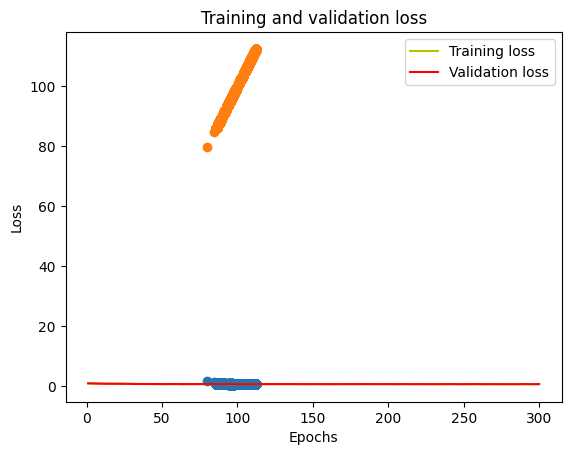

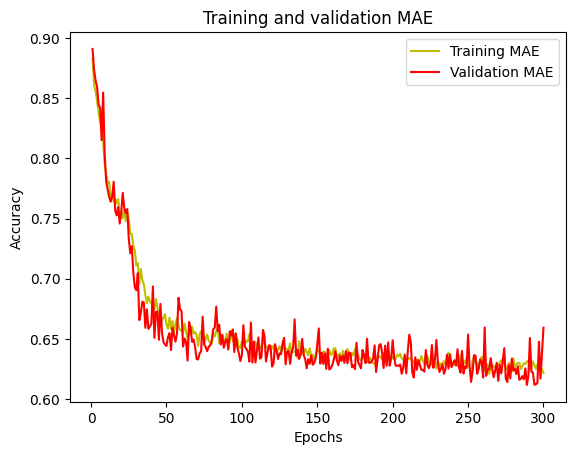

187/187 [==============================] - 0s 1ms/step
Predicted values are:  [[22.23576 ]
 [47.030098]
 [26.362888]
 ...
 [27.78711 ]
 [41.109417]
 [23.148891]]
Real values are:  ts
2023-04-22 14:00:00+00:00    16.0
2021-10-27 18:00:00+00:00    75.0
2021-07-09 23:00:00+00:00    24.0
2022-04-20 12:00:00+00:00    18.0
2021-02-18 08:00:00+00:00    49.0
                             ... 
2021-06-11 12:00:00+00:00    37.0
2021-08-01 21:00:00+00:00    10.0
2021-08-27 21:00:00+00:00    15.0
2022-11-23 19:00:00+00:00    67.0
2022-08-03 01:00:00+00:00    12.0
Name: Biossido di Azoto, Length: 5976, dtype: float64


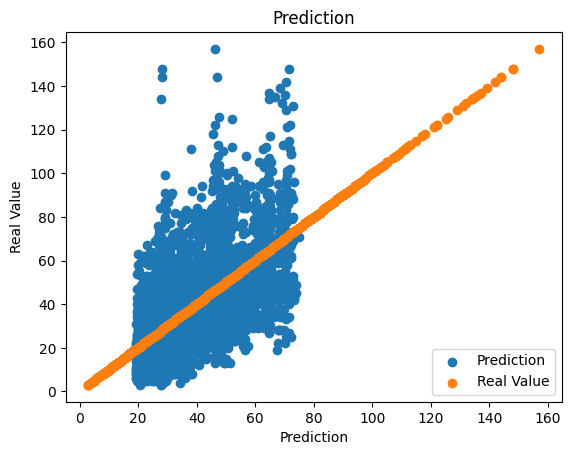

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 64)                320       
                                                                 
 dropout_76 (Dropout)        (None, 64)                0         
                                                                 
 dense_96 (Dense)            (None, 128)               8320      
                                                                 
 dropout_77 (Dropout)        (None, 128)               0         
                                                                 
 dense_97 (Dense)            (None, 64)                8256      
                                                                 
 dropout_78 (Dropout)        (None, 64)                0         
                                                                 
 dense_98 (Dense)            (None, 16)              

c:\Users\ricca\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


30/42 [====================>.........] - ETA: 0s - loss: 1.0118 - mean_squared_error: 1.0118
Epoch 1: val_loss improved from inf to 1.00059, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 3s 36ms/step - loss: 0.9829 - mean_squared_error: 0.9829 - val_loss: 1.0006 - val_mean_squared_error: 1.0006
Epoch 2/300
22/42 [==============>...............] - ETA: 0s - loss: 0.8866 - mean_squared_error: 0.8866
Epoch 2: val_loss did not improve from 1.00059
42/42 [==============================] - 0s 3ms/step - loss: 0.9660 - mean_squared_error: 0.9660 - val_loss: 1.0098 - val_mean_squared_error: 1.0098
Epoch 3/300
24/42 [================>.............] - ETA: 0s - loss: 0.9122 - mean_squared_error: 0.9122
Epoch 3: val_loss improved from 1.00059 to 0.98540, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 34ms/step - loss: 0.9604 - mean_squared_error: 0.9604 - val_loss: 0.9854 - val_mean_squared_error: 0.9854
Epoch 4/300
25/42 [================>.............] - ETA: 0s - loss: 0.9686 - mean_squared_error: 0.9686
Epoch 4: val_loss improved from 0.98540 to 0.97146, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 33ms/step - loss: 0.9561 - mean_squared_error: 0.9561 - val_loss: 0.9715 - val_mean_squared_error: 0.9715
Epoch 5/300
40/42 [===========================>..] - ETA: 0s - loss: 0.9232 - mean_squared_error: 0.9232
Epoch 5: val_loss did not improve from 0.97146
42/42 [==============================] - 0s 4ms/step - loss: 0.9509 - mean_squared_error: 0.9509 - val_loss: 0.9855 - val_mean_squared_error: 0.9855
Epoch 6/300
32/42 [=====================>........] - ETA: 0s - loss: 0.9482 - mean_squared_error: 0.9482
Epoch 6: val_loss improved from 0.97146 to 0.95452, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 33ms/step - loss: 0.9450 - mean_squared_error: 0.9450 - val_loss: 0.9545 - val_mean_squared_error: 0.9545
Epoch 7/300
23/42 [===============>..............] - ETA: 0s - loss: 0.8948 - mean_squared_error: 0.8948
Epoch 7: val_loss improved from 0.95452 to 0.94151, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 33ms/step - loss: 0.9370 - mean_squared_error: 0.9370 - val_loss: 0.9415 - val_mean_squared_error: 0.9415
Epoch 8/300
22/42 [==============>...............] - ETA: 0s - loss: 0.9205 - mean_squared_error: 0.9205
Epoch 8: val_loss improved from 0.94151 to 0.93344, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 39ms/step - loss: 0.9331 - mean_squared_error: 0.9331 - val_loss: 0.9334 - val_mean_squared_error: 0.9334
Epoch 9/300
21/42 [==============>...............] - ETA: 0s - loss: 0.9734 - mean_squared_error: 0.9734
Epoch 9: val_loss did not improve from 0.93344
42/42 [==============================] - 0s 3ms/step - loss: 0.9322 - mean_squared_error: 0.9322 - val_loss: 0.9382 - val_mean_squared_error: 0.9382
Epoch 10/300
23/42 [===============>..............] - ETA: 0s - loss: 0.9542 - mean_squared_error: 0.9542
Epoch 10: val_loss did not improve from 0.93344
42/42 [==============================] - 0s 3ms/step - loss: 0.9045 - mean_squared_error: 0.9045 - val_loss: 0.9353 - val_mean_squared_error: 0.9353
Epoch 11/300
26/42 [=================>............] - ETA: 0s - loss: 0.8725 - mean_squared_error: 0.8725
Epoch 11: val_loss improved from 0.93344 to 0.88742, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 32ms/step - loss: 0.8939 - mean_squared_error: 0.8939 - val_loss: 0.8874 - val_mean_squared_error: 0.8874
Epoch 12/300
24/42 [================>.............] - ETA: 0s - loss: 0.9548 - mean_squared_error: 0.9548
Epoch 12: val_loss improved from 0.88742 to 0.86969, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 36ms/step - loss: 0.8986 - mean_squared_error: 0.8986 - val_loss: 0.8697 - val_mean_squared_error: 0.8697
Epoch 13/300
28/42 [===================>..........] - ETA: 0s - loss: 0.8814 - mean_squared_error: 0.8814
Epoch 13: val_loss did not improve from 0.86969
42/42 [==============================] - 0s 5ms/step - loss: 0.8830 - mean_squared_error: 0.8830 - val_loss: 0.9395 - val_mean_squared_error: 0.9395
Epoch 14/300
23/42 [===============>..............] - ETA: 0s - loss: 0.8912 - mean_squared_error: 0.8912
Epoch 14: val_loss improved from 0.86969 to 0.86804, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 34ms/step - loss: 0.8946 - mean_squared_error: 0.8946 - val_loss: 0.8680 - val_mean_squared_error: 0.8680
Epoch 15/300
24/42 [================>.............] - ETA: 0s - loss: 0.8983 - mean_squared_error: 0.8983
Epoch 15: val_loss did not improve from 0.86804
42/42 [==============================] - 0s 3ms/step - loss: 0.8866 - mean_squared_error: 0.8866 - val_loss: 0.8710 - val_mean_squared_error: 0.8710
Epoch 16/300
26/42 [=================>............] - ETA: 0s - loss: 0.9099 - mean_squared_error: 0.9099
Epoch 16: val_loss did not improve from 0.86804
42/42 [==============================] - 0s 3ms/step - loss: 0.8957 - mean_squared_error: 0.8957 - val_loss: 0.8801 - val_mean_squared_error: 0.8801
Epoch 17/300
26/42 [=================>............] - ETA: 0s - loss: 0.8697 - mean_squared_error: 0.8697
Epoch 17: val_loss improved from 0.86804 to 0.86225, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 32ms/step - loss: 0.8674 - mean_squared_error: 0.8674 - val_loss: 0.8623 - val_mean_squared_error: 0.8623
Epoch 18/300
24/42 [================>.............] - ETA: 0s - loss: 0.8664 - mean_squared_error: 0.8664
Epoch 18: val_loss improved from 0.86225 to 0.85708, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 32ms/step - loss: 0.8702 - mean_squared_error: 0.8702 - val_loss: 0.8571 - val_mean_squared_error: 0.8571
Epoch 19/300
31/42 [=====================>........] - ETA: 0s - loss: 0.8564 - mean_squared_error: 0.8564
Epoch 19: val_loss improved from 0.85708 to 0.83185, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 35ms/step - loss: 0.8631 - mean_squared_error: 0.8631 - val_loss: 0.8318 - val_mean_squared_error: 0.8318
Epoch 20/300
20/42 [=============>................] - ETA: 0s - loss: 0.8359 - mean_squared_error: 0.8359
Epoch 20: val_loss did not improve from 0.83185
42/42 [==============================] - 0s 4ms/step - loss: 0.8916 - mean_squared_error: 0.8916 - val_loss: 0.8485 - val_mean_squared_error: 0.8485
Epoch 21/300
24/42 [================>.............] - ETA: 0s - loss: 0.8647 - mean_squared_error: 0.8647
Epoch 21: val_loss did not improve from 0.83185
42/42 [==============================] - 0s 4ms/step - loss: 0.8687 - mean_squared_error: 0.8687 - val_loss: 0.8595 - val_mean_squared_error: 0.8595
Epoch 22/300
22/42 [==============>...............] - ETA: 0s - loss: 0.8500 - mean_squared_error: 0.8500
Epoch 22: val_loss improved from 0.83185 to 0.82339, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 35ms/step - loss: 0.8553 - mean_squared_error: 0.8553 - val_loss: 0.8234 - val_mean_squared_error: 0.8234
Epoch 23/300
25/42 [================>.............] - ETA: 0s - loss: 0.7933 - mean_squared_error: 0.7933
Epoch 23: val_loss did not improve from 0.82339
42/42 [==============================] - 0s 3ms/step - loss: 0.8331 - mean_squared_error: 0.8331 - val_loss: 0.8388 - val_mean_squared_error: 0.8388
Epoch 24/300
25/42 [================>.............] - ETA: 0s - loss: 0.9243 - mean_squared_error: 0.9243
Epoch 24: val_loss did not improve from 0.82339
42/42 [==============================] - 0s 3ms/step - loss: 0.8459 - mean_squared_error: 0.8459 - val_loss: 0.8368 - val_mean_squared_error: 0.8368
Epoch 25/300
24/42 [================>.............] - ETA: 0s - loss: 0.8998 - mean_squared_error: 0.8998
Epoch 25: val_loss improved from 0.82339 to 0.80059, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 33ms/step - loss: 0.8494 - mean_squared_error: 0.8494 - val_loss: 0.8006 - val_mean_squared_error: 0.8006
Epoch 26/300
28/42 [===================>..........] - ETA: 0s - loss: 0.8596 - mean_squared_error: 0.8596
Epoch 26: val_loss did not improve from 0.80059
42/42 [==============================] - 0s 5ms/step - loss: 0.8217 - mean_squared_error: 0.8217 - val_loss: 0.8043 - val_mean_squared_error: 0.8043
Epoch 27/300
23/42 [===============>..............] - ETA: 0s - loss: 0.8377 - mean_squared_error: 0.8377
Epoch 27: val_loss did not improve from 0.80059
42/42 [==============================] - 0s 3ms/step - loss: 0.8265 - mean_squared_error: 0.8265 - val_loss: 0.8186 - val_mean_squared_error: 0.8186
Epoch 28/300
23/42 [===============>..............] - ETA: 0s - loss: 0.8618 - mean_squared_error: 0.8618
Epoch 28: val_loss did not improve from 0.80059
42/42 [==============================] - 0s 3ms/step - loss: 0.8510 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 39ms/step - loss: 0.8252 - mean_squared_error: 0.8252 - val_loss: 0.7840 - val_mean_squared_error: 0.7840
Epoch 30/300
22/42 [==============>...............] - ETA: 0s - loss: 0.8497 - mean_squared_error: 0.8497
Epoch 30: val_loss did not improve from 0.78399
42/42 [==============================] - 0s 4ms/step - loss: 0.8443 - mean_squared_error: 0.8443 - val_loss: 0.8161 - val_mean_squared_error: 0.8161
Epoch 31/300
36/42 [========================>.....] - ETA: 0s - loss: 0.8573 - mean_squared_error: 0.8573
Epoch 31: val_loss did not improve from 0.78399
42/42 [==============================] - 0s 4ms/step - loss: 0.8597 - mean_squared_error: 0.8597 - val_loss: 0.8198 - val_mean_squared_error: 0.8198
Epoch 32/300
38/42 [==========================>...] - ETA: 0s - loss: 0.8256 - mean_squared_error: 0.8256
Epoch 32: val_loss did not improve from 0.78399
42/42 [==============================] - 0s 4ms/step - loss: 0.8224 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 39ms/step - loss: 0.8104 - mean_squared_error: 0.8104 - val_loss: 0.7729 - val_mean_squared_error: 0.7729
Epoch 37/300
38/42 [==========================>...] - ETA: 0s - loss: 0.8234 - mean_squared_error: 0.8234
Epoch 37: val_loss improved from 0.77291 to 0.77253, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 38ms/step - loss: 0.8173 - mean_squared_error: 0.8173 - val_loss: 0.7725 - val_mean_squared_error: 0.7725
Epoch 38/300
34/42 [=======================>......] - ETA: 0s - loss: 0.8203 - mean_squared_error: 0.8203
Epoch 38: val_loss did not improve from 0.77253
42/42 [==============================] - 0s 4ms/step - loss: 0.8407 - mean_squared_error: 0.8407 - val_loss: 0.7825 - val_mean_squared_error: 0.7825
Epoch 39/300
24/42 [================>.............] - ETA: 0s - loss: 0.8265 - mean_squared_error: 0.8265
Epoch 39: val_loss did not improve from 0.77253
42/42 [==============================] - 0s 3ms/step - loss: 0.8381 - mean_squared_error: 0.8381 - val_loss: 0.7993 - val_mean_squared_error: 0.7993
Epoch 40/300
25/42 [================>.............] - ETA: 0s - loss: 0.8002 - mean_squared_error: 0.8002
Epoch 40: val_loss improved from 0.77253 to 0.76767, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 34ms/step - loss: 0.8182 - mean_squared_error: 0.8182 - val_loss: 0.7677 - val_mean_squared_error: 0.7677
Epoch 41/300
42/42 [==============================] - ETA: 0s - loss: 0.8166 - mean_squared_error: 0.8166
Epoch 41: val_loss did not improve from 0.76767
42/42 [==============================] - 0s 4ms/step - loss: 0.8166 - mean_squared_error: 0.8166 - val_loss: 0.7763 - val_mean_squared_error: 0.7763
Epoch 42/300
42/42 [==============================] - ETA: 0s - loss: 0.8162 - mean_squared_error: 0.8162
Epoch 42: val_loss did not improve from 0.76767
42/42 [==============================] - 0s 4ms/step - loss: 0.8162 - mean_squared_error: 0.8162 - val_loss: 0.7826 - val_mean_squared_error: 0.7826
Epoch 43/300
36/42 [========================>.....] - ETA: 0s - loss: 0.8049 - mean_squared_error: 0.8049
Epoch 43: val_loss did not improve from 0.76767
42/42 [==============================] - 0s 4ms/step - loss: 0.8116 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 34ms/step - loss: 0.7996 - mean_squared_error: 0.7996 - val_loss: 0.7534 - val_mean_squared_error: 0.7534
Epoch 46/300
25/42 [================>.............] - ETA: 0s - loss: 0.7740 - mean_squared_error: 0.7740
Epoch 46: val_loss did not improve from 0.75339
42/42 [==============================] - 0s 3ms/step - loss: 0.8053 - mean_squared_error: 0.8053 - val_loss: 0.7659 - val_mean_squared_error: 0.7659
Epoch 47/300
28/42 [===================>..........] - ETA: 0s - loss: 0.7834 - mean_squared_error: 0.7834
Epoch 47: val_loss improved from 0.75339 to 0.75283, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 32ms/step - loss: 0.7835 - mean_squared_error: 0.7835 - val_loss: 0.7528 - val_mean_squared_error: 0.7528
Epoch 48/300
22/42 [==============>...............] - ETA: 0s - loss: 0.8397 - mean_squared_error: 0.8397
Epoch 48: val_loss improved from 0.75283 to 0.74058, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 35ms/step - loss: 0.7980 - mean_squared_error: 0.7980 - val_loss: 0.7406 - val_mean_squared_error: 0.7406
Epoch 49/300
41/42 [============================>.] - ETA: 0s - loss: 0.8132 - mean_squared_error: 0.8132
Epoch 49: val_loss did not improve from 0.74058
42/42 [==============================] - 0s 4ms/step - loss: 0.8092 - mean_squared_error: 0.8092 - val_loss: 0.7658 - val_mean_squared_error: 0.7658
Epoch 50/300
23/42 [===============>..............] - ETA: 0s - loss: 0.7834 - mean_squared_error: 0.7834
Epoch 50: val_loss improved from 0.74058 to 0.73883, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 37ms/step - loss: 0.7794 - mean_squared_error: 0.7794 - val_loss: 0.7388 - val_mean_squared_error: 0.7388
Epoch 51/300
28/42 [===================>..........] - ETA: 0s - loss: 0.8236 - mean_squared_error: 0.8236
Epoch 51: val_loss did not improve from 0.73883
42/42 [==============================] - 0s 5ms/step - loss: 0.8010 - mean_squared_error: 0.8010 - val_loss: 0.7771 - val_mean_squared_error: 0.7771
Epoch 52/300
22/42 [==============>...............] - ETA: 0s - loss: 0.7975 - mean_squared_error: 0.7975
Epoch 52: val_loss did not improve from 0.73883
42/42 [==============================] - 0s 4ms/step - loss: 0.8102 - mean_squared_error: 0.8102 - val_loss: 0.7731 - val_mean_squared_error: 0.7731
Epoch 53/300
22/42 [==============>...............] - ETA: 0s - loss: 0.8163 - mean_squared_error: 0.8163
Epoch 53: val_loss did not improve from 0.73883
42/42 [==============================] - 0s 4ms/step - loss: 0.7825 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 28ms/step - loss: 0.7886 - mean_squared_error: 0.7886 - val_loss: 0.7367 - val_mean_squared_error: 0.7367
Epoch 68/300
31/42 [=====================>........] - ETA: 0s - loss: 0.7534 - mean_squared_error: 0.7534
Epoch 68: val_loss did not improve from 0.73670
42/42 [==============================] - 0s 3ms/step - loss: 0.7628 - mean_squared_error: 0.7628 - val_loss: 0.7564 - val_mean_squared_error: 0.7564
Epoch 69/300
23/42 [===============>..............] - ETA: 0s - loss: 0.7140 - mean_squared_error: 0.7140
Epoch 69: val_loss improved from 0.73670 to 0.71360, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 29ms/step - loss: 0.7728 - mean_squared_error: 0.7728 - val_loss: 0.7136 - val_mean_squared_error: 0.7136
Epoch 70/300
29/42 [===================>..........] - ETA: 0s - loss: 0.7456 - mean_squared_error: 0.7456
Epoch 70: val_loss did not improve from 0.71360
42/42 [==============================] - 0s 3ms/step - loss: 0.7791 - mean_squared_error: 0.7791 - val_loss: 0.7929 - val_mean_squared_error: 0.7929
Epoch 71/300
30/42 [====================>.........] - ETA: 0s - loss: 0.7895 - mean_squared_error: 0.7895
Epoch 71: val_loss did not improve from 0.71360
42/42 [==============================] - 0s 3ms/step - loss: 0.7876 - mean_squared_error: 0.7876 - val_loss: 0.7463 - val_mean_squared_error: 0.7463
Epoch 72/300
25/42 [================>.............] - ETA: 0s - loss: 0.7986 - mean_squared_error: 0.7986
Epoch 72: val_loss did not improve from 0.71360
42/42 [==============================] - 0s 3ms/step - loss: 0.7879 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 27ms/step - loss: 0.7616 - mean_squared_error: 0.7616 - val_loss: 0.7115 - val_mean_squared_error: 0.7115
Epoch 95/300
32/42 [=====================>........] - ETA: 0s - loss: 0.7538 - mean_squared_error: 0.7538
Epoch 95: val_loss did not improve from 0.71152
42/42 [==============================] - 0s 2ms/step - loss: 0.7645 - mean_squared_error: 0.7645 - val_loss: 0.7228 - val_mean_squared_error: 0.7228
Epoch 96/300
37/42 [=========================>....] - ETA: 0s - loss: 0.7729 - mean_squared_error: 0.7729
Epoch 96: val_loss did not improve from 0.71152
42/42 [==============================] - 0s 2ms/step - loss: 0.7908 - mean_squared_error: 0.7908 - val_loss: 0.7279 - val_mean_squared_error: 0.7279
Epoch 97/300
37/42 [=========================>....] - ETA: 0s - loss: 0.7568 - mean_squared_error: 0.7568
Epoch 97: val_loss did not improve from 0.71152
42/42 [==============================] - 0s 2ms/step - loss: 0.7537 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 27ms/step - loss: 0.7535 - mean_squared_error: 0.7535 - val_loss: 0.7112 - val_mean_squared_error: 0.7112
Epoch 103/300
27/42 [==================>...........] - ETA: 0s - loss: 0.7529 - mean_squared_error: 0.7529
Epoch 103: val_loss did not improve from 0.71119
42/42 [==============================] - 0s 3ms/step - loss: 0.7727 - mean_squared_error: 0.7727 - val_loss: 0.7226 - val_mean_squared_error: 0.7226
Epoch 104/300
40/42 [===========================>..] - ETA: 0s - loss: 0.7562 - mean_squared_error: 0.7562
Epoch 104: val_loss did not improve from 0.71119
42/42 [==============================] - 0s 4ms/step - loss: 0.7629 - mean_squared_error: 0.7629 - val_loss: 0.7303 - val_mean_squared_error: 0.7303
Epoch 105/300
26/42 [=================>............] - ETA: 0s - loss: 0.7896 - mean_squared_error: 0.7896
Epoch 105: val_loss did not improve from 0.71119
42/42 [==============================] - 0s 3ms/step - loss: 0.7617 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 27ms/step - loss: 0.7641 - mean_squared_error: 0.7641 - val_loss: 0.7073 - val_mean_squared_error: 0.7073
Epoch 116/300
29/42 [===================>..........] - ETA: 0s - loss: 0.7439 - mean_squared_error: 0.7439
Epoch 116: val_loss did not improve from 0.70727
42/42 [==============================] - 0s 3ms/step - loss: 0.7657 - mean_squared_error: 0.7657 - val_loss: 0.7145 - val_mean_squared_error: 0.7145
Epoch 117/300
32/42 [=====================>........] - ETA: 0s - loss: 0.7489 - mean_squared_error: 0.7489
Epoch 117: val_loss did not improve from 0.70727
42/42 [==============================] - 0s 2ms/step - loss: 0.7767 - mean_squared_error: 0.7767 - val_loss: 0.7252 - val_mean_squared_error: 0.7252
Epoch 118/300
34/42 [=======================>......] - ETA: 0s - loss: 0.7562 - mean_squared_error: 0.7562
Epoch 118: val_loss did not improve from 0.70727
42/42 [==============================] - 0s 2ms/step - loss: 0.7611 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 3s 76ms/step - loss: 0.7684 - mean_squared_error: 0.7684 - val_loss: 0.7053 - val_mean_squared_error: 0.7053
Epoch 127/300
29/42 [===================>..........] - ETA: 0s - loss: 0.7543 - mean_squared_error: 0.7543
Epoch 127: val_loss did not improve from 0.70535
42/42 [==============================] - 0s 3ms/step - loss: 0.7729 - mean_squared_error: 0.7729 - val_loss: 0.7108 - val_mean_squared_error: 0.7108
Epoch 128/300
29/42 [===================>..........] - ETA: 0s - loss: 0.7239 - mean_squared_error: 0.7239
Epoch 128: val_loss did not improve from 0.70535
42/42 [==============================] - 0s 3ms/step - loss: 0.7471 - mean_squared_error: 0.7471 - val_loss: 0.7055 - val_mean_squared_error: 0.7055
Epoch 129/300
23/42 [===============>..............] - ETA: 0s - loss: 0.7960 - mean_squared_error: 0.7960
Epoch 129: val_loss improved from 0.70535 to 0.69821, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 27ms/step - loss: 0.7446 - mean_squared_error: 0.7446 - val_loss: 0.6982 - val_mean_squared_error: 0.6982
Epoch 130/300
26/42 [=================>............] - ETA: 0s - loss: 0.7593 - mean_squared_error: 0.7593
Epoch 130: val_loss improved from 0.69821 to 0.69811, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 28ms/step - loss: 0.7504 - mean_squared_error: 0.7504 - val_loss: 0.6981 - val_mean_squared_error: 0.6981
Epoch 131/300
22/42 [==============>...............] - ETA: 0s - loss: 0.7370 - mean_squared_error: 0.7370
Epoch 131: val_loss did not improve from 0.69811
42/42 [==============================] - 0s 3ms/step - loss: 0.7375 - mean_squared_error: 0.7375 - val_loss: 0.7216 - val_mean_squared_error: 0.7216
Epoch 132/300
34/42 [=======================>......] - ETA: 0s - loss: 0.7340 - mean_squared_error: 0.7340
Epoch 132: val_loss did not improve from 0.69811
42/42 [==============================] - 0s 2ms/step - loss: 0.7530 - mean_squared_error: 0.7530 - val_loss: 0.7088 - val_mean_squared_error: 0.7088
Epoch 133/300
34/42 [=======================>......] - ETA: 0s - loss: 0.7660 - mean_squared_error: 0.7660
Epoch 133: val_loss did not improve from 0.69811
42/42 [==============================] - 0s 2ms/step - loss: 0.7575 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 26ms/step - loss: 0.7483 - mean_squared_error: 0.7483 - val_loss: 0.6935 - val_mean_squared_error: 0.6935
Epoch 138/300
31/42 [=====================>........] - ETA: 0s - loss: 0.7640 - mean_squared_error: 0.7640
Epoch 138: val_loss did not improve from 0.69346
42/42 [==============================] - 0s 2ms/step - loss: 0.7559 - mean_squared_error: 0.7559 - val_loss: 0.7212 - val_mean_squared_error: 0.7212
Epoch 139/300
32/42 [=====================>........] - ETA: 0s - loss: 0.7047 - mean_squared_error: 0.7047
Epoch 139: val_loss did not improve from 0.69346
42/42 [==============================] - 0s 2ms/step - loss: 0.7424 - mean_squared_error: 0.7424 - val_loss: 0.7064 - val_mean_squared_error: 0.7064
Epoch 140/300
29/42 [===================>..........] - ETA: 0s - loss: 0.7751 - mean_squared_error: 0.7751
Epoch 140: val_loss did not improve from 0.69346
42/42 [==============================] - 0s 3ms/step - loss: 0.7641 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 25ms/step - loss: 0.7405 - mean_squared_error: 0.7405 - val_loss: 0.6912 - val_mean_squared_error: 0.6912
Epoch 145/300
31/42 [=====================>........] - ETA: 0s - loss: 0.7688 - mean_squared_error: 0.7688
Epoch 145: val_loss did not improve from 0.69122
42/42 [==============================] - 0s 2ms/step - loss: 0.7596 - mean_squared_error: 0.7596 - val_loss: 0.6979 - val_mean_squared_error: 0.6979
Epoch 146/300
32/42 [=====================>........] - ETA: 0s - loss: 0.7154 - mean_squared_error: 0.7154
Epoch 146: val_loss did not improve from 0.69122
42/42 [==============================] - 0s 2ms/step - loss: 0.7555 - mean_squared_error: 0.7555 - val_loss: 0.7019 - val_mean_squared_error: 0.7019
Epoch 147/300
34/42 [=======================>......] - ETA: 0s - loss: 0.7685 - mean_squared_error: 0.7685
Epoch 147: val_loss did not improve from 0.69122
42/42 [==============================] - 0s 2ms/step - loss: 0.7665 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 24ms/step - loss: 0.7426 - mean_squared_error: 0.7426 - val_loss: 0.6846 - val_mean_squared_error: 0.6846
Epoch 159/300
30/42 [====================>.........] - ETA: 0s - loss: 0.7822 - mean_squared_error: 0.7822
Epoch 159: val_loss did not improve from 0.68465
42/42 [==============================] - 0s 2ms/step - loss: 0.7486 - mean_squared_error: 0.7486 - val_loss: 0.6857 - val_mean_squared_error: 0.6857
Epoch 160/300
32/42 [=====================>........] - ETA: 0s - loss: 0.7380 - mean_squared_error: 0.7380
Epoch 160: val_loss did not improve from 0.68465
42/42 [==============================] - 0s 2ms/step - loss: 0.7485 - mean_squared_error: 0.7485 - val_loss: 0.7023 - val_mean_squared_error: 0.7023
Epoch 161/300
33/42 [======================>.......] - ETA: 0s - loss: 0.7453 - mean_squared_error: 0.7453
Epoch 161: val_loss did not improve from 0.68465
42/42 [==============================] - 0s 2ms/step - loss: 0.7557 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 24ms/step - loss: 0.7333 - mean_squared_error: 0.7333 - val_loss: 0.6809 - val_mean_squared_error: 0.6809
Epoch 168/300
32/42 [=====================>........] - ETA: 0s - loss: 0.7558 - mean_squared_error: 0.7558
Epoch 168: val_loss did not improve from 0.68091
42/42 [==============================] - 0s 2ms/step - loss: 0.7340 - mean_squared_error: 0.7340 - val_loss: 0.6976 - val_mean_squared_error: 0.6976
Epoch 169/300
33/42 [======================>.......] - ETA: 0s - loss: 0.7311 - mean_squared_error: 0.7311
Epoch 169: val_loss did not improve from 0.68091
42/42 [==============================] - 0s 3ms/step - loss: 0.7586 - mean_squared_error: 0.7586 - val_loss: 0.6975 - val_mean_squared_error: 0.6975
Epoch 170/300
34/42 [=======================>......] - ETA: 0s - loss: 0.7772 - mean_squared_error: 0.7772
Epoch 170: val_loss did not improve from 0.68091
42/42 [==============================] - 0s 2ms/step - loss: 0.7741 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 24ms/step - loss: 0.7197 - mean_squared_error: 0.7197 - val_loss: 0.6769 - val_mean_squared_error: 0.6769
Epoch 181/300
29/42 [===================>..........] - ETA: 0s - loss: 0.7355 - mean_squared_error: 0.7355
Epoch 181: val_loss did not improve from 0.67686
42/42 [==============================] - 0s 3ms/step - loss: 0.7426 - mean_squared_error: 0.7426 - val_loss: 0.6795 - val_mean_squared_error: 0.6795
Epoch 182/300
33/42 [======================>.......] - ETA: 0s - loss: 0.7048 - mean_squared_error: 0.7048
Epoch 182: val_loss did not improve from 0.67686
42/42 [==============================] - 0s 2ms/step - loss: 0.7348 - mean_squared_error: 0.7348 - val_loss: 0.7031 - val_mean_squared_error: 0.7031
Epoch 183/300
35/42 [========================>.....] - ETA: 0s - loss: 0.7065 - mean_squared_error: 0.7065
Epoch 183: val_loss did not improve from 0.67686
42/42 [==============================] - 0s 2ms/step - loss: 0.7253 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 27ms/step - loss: 0.7442 - mean_squared_error: 0.7442 - val_loss: 0.6738 - val_mean_squared_error: 0.6738
Epoch 185/300
29/42 [===================>..........] - ETA: 0s - loss: 0.7539 - mean_squared_error: 0.7539
Epoch 185: val_loss did not improve from 0.67382
42/42 [==============================] - 0s 3ms/step - loss: 0.7380 - mean_squared_error: 0.7380 - val_loss: 0.6962 - val_mean_squared_error: 0.6962
Epoch 186/300
30/42 [====================>.........] - ETA: 0s - loss: 0.7107 - mean_squared_error: 0.7107
Epoch 186: val_loss improved from 0.67382 to 0.67272, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 27ms/step - loss: 0.7226 - mean_squared_error: 0.7226 - val_loss: 0.6727 - val_mean_squared_error: 0.6727
Epoch 187/300
28/42 [===================>..........] - ETA: 0s - loss: 0.7240 - mean_squared_error: 0.7240
Epoch 187: val_loss did not improve from 0.67272
42/42 [==============================] - 0s 3ms/step - loss: 0.7532 - mean_squared_error: 0.7532 - val_loss: 0.7013 - val_mean_squared_error: 0.7013
Epoch 188/300
35/42 [========================>.....] - ETA: 0s - loss: 0.7395 - mean_squared_error: 0.7395
Epoch 188: val_loss did not improve from 0.67272
42/42 [==============================] - 0s 2ms/step - loss: 0.7489 - mean_squared_error: 0.7489 - val_loss: 0.6773 - val_mean_squared_error: 0.6773
Epoch 189/300
39/42 [==========================>...] - ETA: 0s - loss: 0.7428 - mean_squared_error: 0.7428
Epoch 189: val_loss did not improve from 0.67272
42/42 [==============================] - 0s 2ms/step - loss: 0.7513 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 1s 27ms/step - loss: 0.7342 - mean_squared_error: 0.7342 - val_loss: 0.6670 - val_mean_squared_error: 0.6670
Epoch 213/300
25/42 [================>.............] - ETA: 0s - loss: 0.7727 - mean_squared_error: 0.7727
Epoch 213: val_loss did not improve from 0.66704
42/42 [==============================] - 0s 4ms/step - loss: 0.7442 - mean_squared_error: 0.7442 - val_loss: 0.7047 - val_mean_squared_error: 0.7047
Epoch 214/300
35/42 [========================>.....] - ETA: 0s - loss: 0.7244 - mean_squared_error: 0.7244
Epoch 214: val_loss did not improve from 0.66704
42/42 [==============================] - 0s 5ms/step - loss: 0.7293 - mean_squared_error: 0.7293 - val_loss: 0.6691 - val_mean_squared_error: 0.6691
Epoch 215/300
25/42 [================>.............] - ETA: 0s - loss: 0.7291 - mean_squared_error: 0.7291
Epoch 215: val_loss did not improve from 0.66704
42/42 [==============================] - 0s 3ms/step - loss: 0.7283 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 39ms/step - loss: 0.7433 - mean_squared_error: 0.7433 - val_loss: 0.6603 - val_mean_squared_error: 0.6603
Epoch 219/300
27/42 [==================>...........] - ETA: 0s - loss: 0.7499 - mean_squared_error: 0.7499
Epoch 219: val_loss did not improve from 0.66034
42/42 [==============================] - 0s 3ms/step - loss: 0.7317 - mean_squared_error: 0.7317 - val_loss: 0.6826 - val_mean_squared_error: 0.6826
Epoch 220/300
32/42 [=====================>........] - ETA: 0s - loss: 0.7199 - mean_squared_error: 0.7199
Epoch 220: val_loss did not improve from 0.66034
42/42 [==============================] - 0s 2ms/step - loss: 0.7386 - mean_squared_error: 0.7386 - val_loss: 0.6666 - val_mean_squared_error: 0.6666
Epoch 221/300
30/42 [====================>.........] - ETA: 0s - loss: 0.7414 - mean_squared_error: 0.7414
Epoch 221: val_loss did not improve from 0.66034
42/42 [==============================] - 0s 3ms/step - loss: 0.7427 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 37ms/step - loss: 0.7238 - mean_squared_error: 0.7238 - val_loss: 0.6575 - val_mean_squared_error: 0.6575
Epoch 258/300
20/42 [=============>................] - ETA: 0s - loss: 0.7347 - mean_squared_error: 0.7347
Epoch 258: val_loss did not improve from 0.65751
42/42 [==============================] - 0s 4ms/step - loss: 0.7307 - mean_squared_error: 0.7307 - val_loss: 0.6763 - val_mean_squared_error: 0.6763
Epoch 259/300
21/42 [==============>...............] - ETA: 0s - loss: 0.7029 - mean_squared_error: 0.7029
Epoch 259: val_loss did not improve from 0.65751
42/42 [==============================] - 0s 3ms/step - loss: 0.7318 - mean_squared_error: 0.7318 - val_loss: 0.6728 - val_mean_squared_error: 0.6728
Epoch 260/300
40/42 [===========================>..] - ETA: 0s - loss: 0.6927 - mean_squared_error: 0.6927
Epoch 260: val_loss did not improve from 0.65751
42/42 [==============================] - 0s 4ms/step - loss: 0.6934 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 2s 50ms/step - loss: 0.7097 - mean_squared_error: 0.7097 - val_loss: 0.6557 - val_mean_squared_error: 0.6557
Epoch 286/300
34/42 [=======================>......] - ETA: 0s - loss: 0.6956 - mean_squared_error: 0.6956
Epoch 286: val_loss did not improve from 0.65565
42/42 [==============================] - 0s 5ms/step - loss: 0.6977 - mean_squared_error: 0.6977 - val_loss: 0.6599 - val_mean_squared_error: 0.6599
Epoch 287/300
40/42 [===========================>..] - ETA: 0s - loss: 0.7286 - mean_squared_error: 0.7286
Epoch 287: val_loss did not improve from 0.65565
42/42 [==============================] - 0s 4ms/step - loss: 0.7267 - mean_squared_error: 0.7267 - val_loss: 0.6740 - val_mean_squared_error: 0.6740
Epoch 288/300
38/42 [==========================>...] - ETA: 0s - loss: 0.7389 - mean_squared_error: 0.7389
Epoch 288: val_loss did not improve from 0.65565
42/42 [==============================] - 0s 4ms/step - loss: 0.7321 - mean_squared_e

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


42/42 [==============================] - 3s 68ms/step - loss: 0.7213 - mean_squared_error: 0.7213 - val_loss: 0.6543 - val_mean_squared_error: 0.6543
Epoch 298/300
28/42 [===================>..........] - ETA: 0s - loss: 0.6760 - mean_squared_error: 0.6760
Epoch 298: val_loss did not improve from 0.65430
42/42 [==============================] - 0s 5ms/step - loss: 0.7247 - mean_squared_error: 0.7247 - val_loss: 0.6713 - val_mean_squared_error: 0.6713
Epoch 299/300
38/42 [==========================>...] - ETA: 0s - loss: 0.6957 - mean_squared_error: 0.6957
Epoch 299: val_loss did not improve from 0.65430
42/42 [==============================] - 0s 7ms/step - loss: 0.7015 - mean_squared_error: 0.7015 - val_loss: 0.6634 - val_mean_squared_error: 0.6634
Epoch 300/300
33/42 [======================>.......] - ETA: 0s - loss: 0.7285 - mean_squared_error: 0.7285
Epoch 300: val_loss did not improve from 0.65430
42/42 [==============================] - 0s 7ms/step - loss: 0.7091 - mean_squared_e

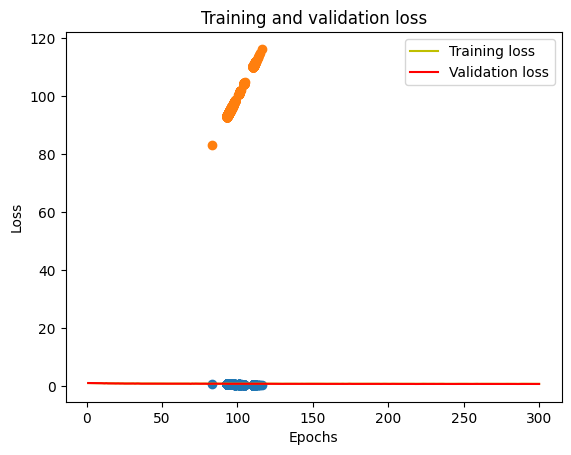

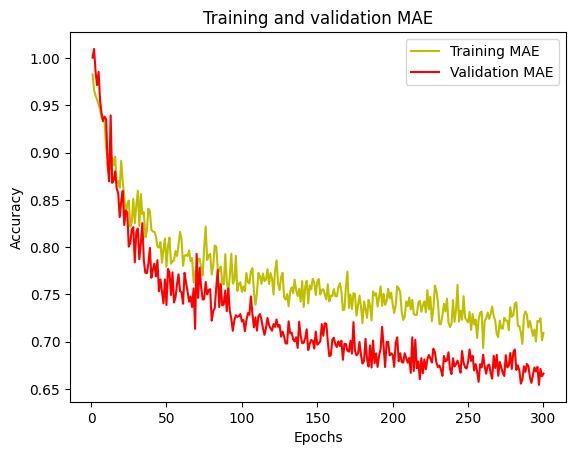

23/23 [==============================] - 0s 2ms/step
Predicted values are:  [[25.081482]
 [58.311314]
 [21.419256]
 [44.418663]
 [22.741362]
 [25.261047]
 [22.50185 ]
 [25.155172]
 [22.43115 ]
 [29.579496]
 [22.144878]
 [58.355034]
 [25.313946]
 [22.491066]
 [22.669584]
 [21.72493 ]
 [23.014265]
 [25.270203]
 [26.78701 ]
 [21.756618]
 [23.837212]
 [30.621304]
 [32.84944 ]
 [25.426603]
 [24.994501]
 [25.353724]
 [25.723482]
 [21.483889]
 [21.788422]
 [25.42855 ]
 [34.153988]
 [43.619747]
 [21.535906]
 [29.573565]
 [24.597164]
 [22.083845]
 [25.200605]
 [29.300575]
 [30.685621]
 [22.633657]
 [22.576485]
 [22.205383]
 [25.2249  ]
 [33.783875]
 [22.907606]
 [25.178097]
 [25.179144]
 [21.207956]
 [29.13171 ]
 [48.47492 ]
 [32.703136]
 [23.064331]
 [21.71035 ]
 [41.085957]
 [25.103748]
 [25.1384  ]
 [35.12241 ]
 [21.376165]
 [22.348112]
 [42.32589 ]
 [21.762146]
 [25.42802 ]
 [22.061533]
 [26.014694]
 [23.387913]
 [25.493103]
 [25.425104]
 [26.094168]
 [21.361599]
 [25.052378]
 [27.632359]
 

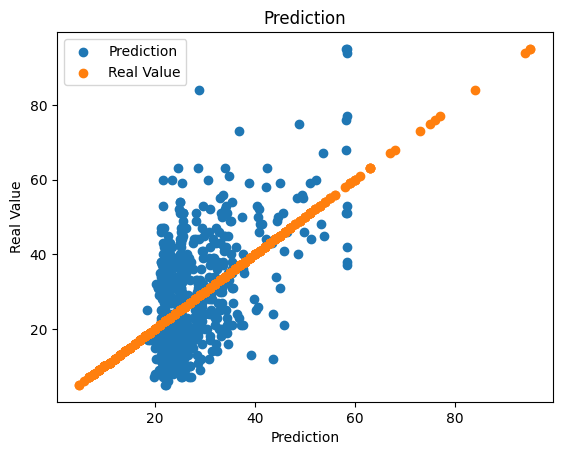

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 64)                320       
                                                                 
 dropout_80 (Dropout)        (None, 64)                0         
                                                                 
 dense_101 (Dense)           (None, 128)               8320      
                                                                 
 dropout_81 (Dropout)        (None, 128)               0         
                                                                 
 dense_102 (Dense)           (None, 64)                8256      
                                                                 
 dropout_82 (Dropout)        (None, 64)                0         
                                                                 
 dense_103 (Dense)           (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 6s 14ms/step - loss: 0.7887 - mean_squared_error: 0.7887 - val_loss: 0.6786 - val_mean_squared_error: 0.6786
Epoch 2/300
266/278 [===========================>..] - ETA: 0s - loss: 0.6728 - mean_squared_error: 0.6728
Epoch 2: val_loss improved from 0.67857 to 0.63630, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 4s 13ms/step - loss: 0.6820 - mean_squared_error: 0.6820 - val_loss: 0.6363 - val_mean_squared_error: 0.6363
Epoch 3/300
270/278 [============================>.] - ETA: 0s - loss: 0.6690 - mean_squared_error: 0.6690
Epoch 3: val_loss improved from 0.63630 to 0.63113, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 4s 13ms/step - loss: 0.6674 - mean_squared_error: 0.6674 - val_loss: 0.6311 - val_mean_squared_error: 0.6311
Epoch 4/300
266/278 [===========================>..] - ETA: 0s - loss: 0.6500 - mean_squared_error: 0.6500
Epoch 4: val_loss improved from 0.63113 to 0.61788, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 3s 10ms/step - loss: 0.6478 - mean_squared_error: 0.6478 - val_loss: 0.6179 - val_mean_squared_error: 0.6179
Epoch 5/300
273/278 [============================>.] - ETA: 0s - loss: 0.6457 - mean_squared_error: 0.6457
Epoch 5: val_loss improved from 0.61788 to 0.60311, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.6445 - mean_squared_error: 0.6445 - val_loss: 0.6031 - val_mean_squared_error: 0.6031
Epoch 6/300
272/278 [============================>.] - ETA: 0s - loss: 0.6247 - mean_squared_error: 0.6247
Epoch 6: val_loss improved from 0.60311 to 0.59717, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.6253 - mean_squared_error: 0.6253 - val_loss: 0.5972 - val_mean_squared_error: 0.5972
Epoch 7/300
272/278 [============================>.] - ETA: 0s - loss: 0.6272 - mean_squared_error: 0.6272
Epoch 7: val_loss improved from 0.59717 to 0.58605, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.6277 - mean_squared_error: 0.6277 - val_loss: 0.5861 - val_mean_squared_error: 0.5861
Epoch 8/300
265/278 [===========================>..] - ETA: 0s - loss: 0.6139 - mean_squared_error: 0.6139
Epoch 8: val_loss did not improve from 0.58605
278/278 [==============================] - 1s 3ms/step - loss: 0.6129 - mean_squared_error: 0.6129 - val_loss: 0.5867 - val_mean_squared_error: 0.5867
Epoch 9/300
263/278 [===========================>..] - ETA: 0s - loss: 0.5961 - mean_squared_error: 0.5961
Epoch 9: val_loss improved from 0.58605 to 0.57591, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.6001 - mean_squared_error: 0.6001 - val_loss: 0.5759 - val_mean_squared_error: 0.5759
Epoch 10/300
265/278 [===========================>..] - ETA: 0s - loss: 0.5910 - mean_squared_error: 0.5910
Epoch 10: val_loss improved from 0.57591 to 0.57384, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.5914 - mean_squared_error: 0.5914 - val_loss: 0.5738 - val_mean_squared_error: 0.5738
Epoch 11/300
269/278 [============================>.] - ETA: 0s - loss: 0.5870 - mean_squared_error: 0.5870
Epoch 11: val_loss did not improve from 0.57384
278/278 [==============================] - 1s 4ms/step - loss: 0.5861 - mean_squared_error: 0.5861 - val_loss: 0.5951 - val_mean_squared_error: 0.5951
Epoch 12/300
268/278 [===========================>..] - ETA: 0s - loss: 0.5871 - mean_squared_error: 0.5871
Epoch 12: val_loss improved from 0.57384 to 0.56494, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.5852 - mean_squared_error: 0.5852 - val_loss: 0.5649 - val_mean_squared_error: 0.5649
Epoch 13/300
272/278 [============================>.] - ETA: 0s - loss: 0.5917 - mean_squared_error: 0.5917
Epoch 13: val_loss did not improve from 0.56494
278/278 [==============================] - 1s 4ms/step - loss: 0.5922 - mean_squared_error: 0.5922 - val_loss: 0.5705 - val_mean_squared_error: 0.5705
Epoch 14/300
278/278 [==============================] - ETA: 0s - loss: 0.5776 - mean_squared_error: 0.5776
Epoch 14: val_loss improved from 0.56494 to 0.55598, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 3s 9ms/step - loss: 0.5776 - mean_squared_error: 0.5776 - val_loss: 0.5560 - val_mean_squared_error: 0.5560
Epoch 15/300
269/278 [============================>.] - ETA: 0s - loss: 0.5788 - mean_squared_error: 0.5788
Epoch 15: val_loss did not improve from 0.55598
278/278 [==============================] - 1s 3ms/step - loss: 0.5784 - mean_squared_error: 0.5784 - val_loss: 0.5731 - val_mean_squared_error: 0.5731
Epoch 16/300
270/278 [============================>.] - ETA: 0s - loss: 0.5636 - mean_squared_error: 0.5636
Epoch 16: val_loss did not improve from 0.55598
278/278 [==============================] - 1s 3ms/step - loss: 0.5657 - mean_squared_error: 0.5657 - val_loss: 0.5564 - val_mean_squared_error: 0.5564
Epoch 17/300
268/278 [===========================>..] - ETA: 0s - loss: 0.5661 - mean_squared_error: 0.5661
Epoch 17: val_loss improved from 0.55598 to 0.54693, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.5654 - mean_squared_error: 0.5654 - val_loss: 0.5469 - val_mean_squared_error: 0.5469
Epoch 18/300
272/278 [============================>.] - ETA: 0s - loss: 0.5662 - mean_squared_error: 0.5662
Epoch 18: val_loss did not improve from 0.54693
278/278 [==============================] - 1s 4ms/step - loss: 0.5651 - mean_squared_error: 0.5651 - val_loss: 0.5544 - val_mean_squared_error: 0.5544
Epoch 19/300
267/278 [===========================>..] - ETA: 0s - loss: 0.5639 - mean_squared_error: 0.5639
Epoch 19: val_loss did not improve from 0.54693
278/278 [==============================] - 1s 4ms/step - loss: 0.5649 - mean_squared_error: 0.5649 - val_loss: 0.5772 - val_mean_squared_error: 0.5772
Epoch 20/300
263/278 [===========================>..] - ETA: 0s - loss: 0.5702 - mean_squared_error: 0.5702
Epoch 20: val_loss did not improve from 0.54693
278/278 [==============================] - 1s 4ms/step - loss: 0.5677 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 3s 9ms/step - loss: 0.5643 - mean_squared_error: 0.5643 - val_loss: 0.5467 - val_mean_squared_error: 0.5467
Epoch 22/300
271/278 [============================>.] - ETA: 0s - loss: 0.5660 - mean_squared_error: 0.5660
Epoch 22: val_loss improved from 0.54667 to 0.54109, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 3s 10ms/step - loss: 0.5657 - mean_squared_error: 0.5657 - val_loss: 0.5411 - val_mean_squared_error: 0.5411
Epoch 23/300
264/278 [===========================>..] - ETA: 0s - loss: 0.5634 - mean_squared_error: 0.5634
Epoch 23: val_loss did not improve from 0.54109
278/278 [==============================] - 1s 4ms/step - loss: 0.5666 - mean_squared_error: 0.5666 - val_loss: 0.5451 - val_mean_squared_error: 0.5451
Epoch 24/300
275/278 [============================>.] - ETA: 0s - loss: 0.5569 - mean_squared_error: 0.5569
Epoch 24: val_loss improved from 0.54109 to 0.53623, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.5575 - mean_squared_error: 0.5575 - val_loss: 0.5362 - val_mean_squared_error: 0.5362
Epoch 25/300
267/278 [===========================>..] - ETA: 0s - loss: 0.5604 - mean_squared_error: 0.5604
Epoch 25: val_loss did not improve from 0.53623
278/278 [==============================] - 1s 4ms/step - loss: 0.5622 - mean_squared_error: 0.5622 - val_loss: 0.5493 - val_mean_squared_error: 0.5493
Epoch 26/300
267/278 [===========================>..] - ETA: 0s - loss: 0.5558 - mean_squared_error: 0.5558
Epoch 26: val_loss did not improve from 0.53623
278/278 [==============================] - 1s 4ms/step - loss: 0.5558 - mean_squared_error: 0.5558 - val_loss: 0.5486 - val_mean_squared_error: 0.5486
Epoch 27/300
267/278 [===========================>..] - ETA: 0s - loss: 0.5562 - mean_squared_error: 0.5562
Epoch 27: val_loss did not improve from 0.53623
278/278 [==============================] - 1s 3ms/step - loss: 0.5545 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 7ms/step - loss: 0.5619 - mean_squared_error: 0.5619 - val_loss: 0.5294 - val_mean_squared_error: 0.5294
Epoch 34/300
272/278 [============================>.] - ETA: 0s - loss: 0.5458 - mean_squared_error: 0.5458
Epoch 34: val_loss did not improve from 0.52940
278/278 [==============================] - 1s 3ms/step - loss: 0.5483 - mean_squared_error: 0.5483 - val_loss: 0.5328 - val_mean_squared_error: 0.5328
Epoch 35/300
263/278 [===========================>..] - ETA: 0s - loss: 0.5459 - mean_squared_error: 0.5459
Epoch 35: val_loss improved from 0.52940 to 0.52481, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 7ms/step - loss: 0.5474 - mean_squared_error: 0.5474 - val_loss: 0.5248 - val_mean_squared_error: 0.5248
Epoch 36/300
260/278 [===========================>..] - ETA: 0s - loss: 0.5553 - mean_squared_error: 0.5553
Epoch 36: val_loss did not improve from 0.52481
278/278 [==============================] - 1s 3ms/step - loss: 0.5554 - mean_squared_error: 0.5554 - val_loss: 0.5571 - val_mean_squared_error: 0.5571
Epoch 37/300
270/278 [============================>.] - ETA: 0s - loss: 0.5491 - mean_squared_error: 0.5491
Epoch 37: val_loss did not improve from 0.52481
278/278 [==============================] - 1s 4ms/step - loss: 0.5470 - mean_squared_error: 0.5470 - val_loss: 0.5314 - val_mean_squared_error: 0.5314
Epoch 38/300
274/278 [============================>.] - ETA: 0s - loss: 0.5511 - mean_squared_error: 0.5511
Epoch 38: val_loss did not improve from 0.52481
278/278 [==============================] - 1s 3ms/step - loss: 0.5502 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 3s 10ms/step - loss: 0.5452 - mean_squared_error: 0.5452 - val_loss: 0.5227 - val_mean_squared_error: 0.5227
Epoch 44/300
266/278 [===========================>..] - ETA: 0s - loss: 0.5415 - mean_squared_error: 0.5415
Epoch 44: val_loss did not improve from 0.52268
278/278 [==============================] - 1s 4ms/step - loss: 0.5393 - mean_squared_error: 0.5393 - val_loss: 0.5310 - val_mean_squared_error: 0.5310
Epoch 45/300
275/278 [============================>.] - ETA: 0s - loss: 0.5424 - mean_squared_error: 0.5424
Epoch 45: val_loss did not improve from 0.52268
278/278 [==============================] - 1s 3ms/step - loss: 0.5406 - mean_squared_error: 0.5406 - val_loss: 0.5238 - val_mean_squared_error: 0.5238
Epoch 46/300
261/278 [===========================>..] - ETA: 0s - loss: 0.5391 - mean_squared_error: 0.5391
Epoch 46: val_loss did not improve from 0.52268
278/278 [==============================] - 1s 3ms/step - loss: 0.5406 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 3s 9ms/step - loss: 0.5431 - mean_squared_error: 0.5431 - val_loss: 0.5210 - val_mean_squared_error: 0.5210
Epoch 52/300
277/278 [============================>.] - ETA: 0s - loss: 0.5421 - mean_squared_error: 0.5421
Epoch 52: val_loss did not improve from 0.52103
278/278 [==============================] - 1s 4ms/step - loss: 0.5413 - mean_squared_error: 0.5413 - val_loss: 0.5224 - val_mean_squared_error: 0.5224
Epoch 53/300
268/278 [===========================>..] - ETA: 0s - loss: 0.5366 - mean_squared_error: 0.5366
Epoch 53: val_loss did not improve from 0.52103
278/278 [==============================] - 1s 4ms/step - loss: 0.5368 - mean_squared_error: 0.5368 - val_loss: 0.5212 - val_mean_squared_error: 0.5212
Epoch 54/300
271/278 [============================>.] - ETA: 0s - loss: 0.5358 - mean_squared_error: 0.5358
Epoch 54: val_loss did not improve from 0.52103
278/278 [==============================] - 1s 4ms/step - loss: 0.5396 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.5382 - mean_squared_error: 0.5382 - val_loss: 0.5174 - val_mean_squared_error: 0.5174
Epoch 56/300
274/278 [============================>.] - ETA: 0s - loss: 0.5425 - mean_squared_error: 0.5425
Epoch 56: val_loss did not improve from 0.51735
278/278 [==============================] - 1s 4ms/step - loss: 0.5426 - mean_squared_error: 0.5426 - val_loss: 0.5207 - val_mean_squared_error: 0.5207
Epoch 57/300
260/278 [===========================>..] - ETA: 0s - loss: 0.5340 - mean_squared_error: 0.5340
Epoch 57: val_loss did not improve from 0.51735
278/278 [==============================] - 1s 3ms/step - loss: 0.5357 - mean_squared_error: 0.5357 - val_loss: 0.5174 - val_mean_squared_error: 0.5174
Epoch 58/300
264/278 [===========================>..] - ETA: 0s - loss: 0.5396 - mean_squared_error: 0.5396
Epoch 58: val_loss did not improve from 0.51735
278/278 [==============================] - 1s 4ms/step - loss: 0.5372 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 3s 10ms/step - loss: 0.5328 - mean_squared_error: 0.5328 - val_loss: 0.5147 - val_mean_squared_error: 0.5147
Epoch 66/300
265/278 [===========================>..] - ETA: 0s - loss: 0.5329 - mean_squared_error: 0.5329
Epoch 66: val_loss did not improve from 0.51468
278/278 [==============================] - 1s 3ms/step - loss: 0.5361 - mean_squared_error: 0.5361 - val_loss: 0.5288 - val_mean_squared_error: 0.5288
Epoch 67/300
268/278 [===========================>..] - ETA: 0s - loss: 0.5296 - mean_squared_error: 0.5296
Epoch 67: val_loss improved from 0.51468 to 0.51088, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.5280 - mean_squared_error: 0.5280 - val_loss: 0.5109 - val_mean_squared_error: 0.5109
Epoch 68/300
271/278 [============================>.] - ETA: 0s - loss: 0.5322 - mean_squared_error: 0.5322
Epoch 68: val_loss did not improve from 0.51088
278/278 [==============================] - 1s 3ms/step - loss: 0.5330 - mean_squared_error: 0.5330 - val_loss: 0.5278 - val_mean_squared_error: 0.5278
Epoch 69/300
276/278 [============================>.] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 69: val_loss did not improve from 0.51088
278/278 [==============================] - 1s 4ms/step - loss: 0.5291 - mean_squared_error: 0.5291 - val_loss: 0.5201 - val_mean_squared_error: 0.5201
Epoch 70/300
264/278 [===========================>..] - ETA: 0s - loss: 0.5331 - mean_squared_error: 0.5331
Epoch 70: val_loss did not improve from 0.51088
278/278 [==============================] - 1s 4ms/step - loss: 0.5322 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 7ms/step - loss: 0.5252 - mean_squared_error: 0.5252 - val_loss: 0.5094 - val_mean_squared_error: 0.5094
Epoch 87/300
278/278 [==============================] - ETA: 0s - loss: 0.5291 - mean_squared_error: 0.5291
Epoch 87: val_loss did not improve from 0.50943
278/278 [==============================] - 1s 3ms/step - loss: 0.5291 - mean_squared_error: 0.5291 - val_loss: 0.5160 - val_mean_squared_error: 0.5160
Epoch 88/300
276/278 [============================>.] - ETA: 0s - loss: 0.5328 - mean_squared_error: 0.5328
Epoch 88: val_loss did not improve from 0.50943
278/278 [==============================] - 1s 3ms/step - loss: 0.5319 - mean_squared_error: 0.5319 - val_loss: 0.5151 - val_mean_squared_error: 0.5151
Epoch 89/300
275/278 [============================>.] - ETA: 0s - loss: 0.5321 - mean_squared_error: 0.5321
Epoch 89: val_loss did not improve from 0.50943
278/278 [==============================] - 1s 3ms/step - loss: 0.5315 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.5215 - mean_squared_error: 0.5215 - val_loss: 0.5072 - val_mean_squared_error: 0.5072
Epoch 91/300
274/278 [============================>.] - ETA: 0s - loss: 0.5270 - mean_squared_error: 0.5270
Epoch 91: val_loss did not improve from 0.50722
278/278 [==============================] - 1s 3ms/step - loss: 0.5284 - mean_squared_error: 0.5284 - val_loss: 0.5130 - val_mean_squared_error: 0.5130
Epoch 92/300
260/278 [===========================>..] - ETA: 0s - loss: 0.5246 - mean_squared_error: 0.5246
Epoch 92: val_loss did not improve from 0.50722
278/278 [==============================] - 1s 3ms/step - loss: 0.5261 - mean_squared_error: 0.5261 - val_loss: 0.5074 - val_mean_squared_error: 0.5074
Epoch 93/300
269/278 [============================>.] - ETA: 0s - loss: 0.5299 - mean_squared_error: 0.5299
Epoch 93: val_loss did not improve from 0.50722
278/278 [==============================] - 1s 3ms/step - loss: 0.5283 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.5292 - mean_squared_error: 0.5292 - val_loss: 0.5067 - val_mean_squared_error: 0.5067
Epoch 97/300
268/278 [===========================>..] - ETA: 0s - loss: 0.5295 - mean_squared_error: 0.5295
Epoch 97: val_loss did not improve from 0.50672
278/278 [==============================] - 1s 3ms/step - loss: 0.5287 - mean_squared_error: 0.5287 - val_loss: 0.5088 - val_mean_squared_error: 0.5088
Epoch 98/300
277/278 [============================>.] - ETA: 0s - loss: 0.5268 - mean_squared_error: 0.5268
Epoch 98: val_loss did not improve from 0.50672
278/278 [==============================] - 1s 3ms/step - loss: 0.5265 - mean_squared_error: 0.5265 - val_loss: 0.5106 - val_mean_squared_error: 0.5106
Epoch 99/300
271/278 [============================>.] - ETA: 0s - loss: 0.5210 - mean_squared_error: 0.5210
Epoch 99: val_loss did not improve from 0.50672
278/278 [==============================] - 1s 3ms/step - loss: 0.5211 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.5284 - mean_squared_error: 0.5284 - val_loss: 0.5001 - val_mean_squared_error: 0.5001
Epoch 103/300
265/278 [===========================>..] - ETA: 0s - loss: 0.5248 - mean_squared_error: 0.5248
Epoch 103: val_loss did not improve from 0.50011
278/278 [==============================] - 1s 3ms/step - loss: 0.5239 - mean_squared_error: 0.5239 - val_loss: 0.5186 - val_mean_squared_error: 0.5186
Epoch 104/300
259/278 [==========================>...] - ETA: 0s - loss: 0.5269 - mean_squared_error: 0.5269
Epoch 104: val_loss did not improve from 0.50011
278/278 [==============================] - 1s 3ms/step - loss: 0.5252 - mean_squared_error: 0.5252 - val_loss: 0.5037 - val_mean_squared_error: 0.5037
Epoch 105/300
266/278 [===========================>..] - ETA: 0s - loss: 0.5202 - mean_squared_error: 0.5202
Epoch 105: val_loss did not improve from 0.50011
278/278 [==============================] - 1s 3ms/step - loss: 0.5225 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.5287 - mean_squared_error: 0.5287 - val_loss: 0.4997 - val_mean_squared_error: 0.4997
Epoch 111/300
275/278 [============================>.] - ETA: 0s - loss: 0.5273 - mean_squared_error: 0.5273
Epoch 111: val_loss did not improve from 0.49972
278/278 [==============================] - 1s 4ms/step - loss: 0.5273 - mean_squared_error: 0.5273 - val_loss: 0.5161 - val_mean_squared_error: 0.5161
Epoch 112/300
266/278 [===========================>..] - ETA: 0s - loss: 0.5176 - mean_squared_error: 0.5176
Epoch 112: val_loss did not improve from 0.49972
278/278 [==============================] - 1s 3ms/step - loss: 0.5184 - mean_squared_error: 0.5184 - val_loss: 0.5197 - val_mean_squared_error: 0.5197
Epoch 113/300
278/278 [==============================] - ETA: 0s - loss: 0.5249 - mean_squared_error: 0.5249
Epoch 113: val_loss did not improve from 0.49972
278/278 [==============================] - 1s 3ms/step - loss: 0.5249 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 9ms/step - loss: 0.5234 - mean_squared_error: 0.5234 - val_loss: 0.4957 - val_mean_squared_error: 0.4957
Epoch 115/300
267/278 [===========================>..] - ETA: 0s - loss: 0.5215 - mean_squared_error: 0.5215
Epoch 115: val_loss did not improve from 0.49570
278/278 [==============================] - 1s 4ms/step - loss: 0.5190 - mean_squared_error: 0.5190 - val_loss: 0.4964 - val_mean_squared_error: 0.4964
Epoch 116/300
269/278 [============================>.] - ETA: 0s - loss: 0.5221 - mean_squared_error: 0.5221
Epoch 116: val_loss did not improve from 0.49570
278/278 [==============================] - 1s 5ms/step - loss: 0.5200 - mean_squared_error: 0.5200 - val_loss: 0.5060 - val_mean_squared_error: 0.5060
Epoch 117/300
267/278 [===========================>..] - ETA: 0s - loss: 0.5294 - mean_squared_error: 0.5294
Epoch 117: val_loss improved from 0.49570 to 0.49511, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 5s 18ms/step - loss: 0.5261 - mean_squared_error: 0.5261 - val_loss: 0.4951 - val_mean_squared_error: 0.4951
Epoch 118/300
276/278 [============================>.] - ETA: 0s - loss: 0.5179 - mean_squared_error: 0.5179
Epoch 118: val_loss did not improve from 0.49511
278/278 [==============================] - 1s 3ms/step - loss: 0.5184 - mean_squared_error: 0.5184 - val_loss: 0.4997 - val_mean_squared_error: 0.4997
Epoch 119/300
265/278 [===========================>..] - ETA: 0s - loss: 0.5256 - mean_squared_error: 0.5256
Epoch 119: val_loss did not improve from 0.49511
278/278 [==============================] - 1s 3ms/step - loss: 0.5279 - mean_squared_error: 0.5279 - val_loss: 0.5364 - val_mean_squared_error: 0.5364
Epoch 120/300
275/278 [============================>.] - ETA: 0s - loss: 0.5229 - mean_squared_error: 0.5229
Epoch 120: val_loss did not improve from 0.49511
278/278 [==============================] - 1s 4ms/step - loss: 0.5216 - 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 7ms/step - loss: 0.5187 - mean_squared_error: 0.5187 - val_loss: 0.4936 - val_mean_squared_error: 0.4936
Epoch 126/300
275/278 [============================>.] - ETA: 0s - loss: 0.5204 - mean_squared_error: 0.5204
Epoch 126: val_loss did not improve from 0.49359
278/278 [==============================] - 1s 3ms/step - loss: 0.5219 - mean_squared_error: 0.5219 - val_loss: 0.5153 - val_mean_squared_error: 0.5153
Epoch 127/300
270/278 [============================>.] - ETA: 0s - loss: 0.5205 - mean_squared_error: 0.5205
Epoch 127: val_loss did not improve from 0.49359
278/278 [==============================] - 1s 3ms/step - loss: 0.5162 - mean_squared_error: 0.5162 - val_loss: 0.4999 - val_mean_squared_error: 0.4999
Epoch 128/300
267/278 [===========================>..] - ETA: 0s - loss: 0.5186 - mean_squared_error: 0.5186
Epoch 128: val_loss did not improve from 0.49359
278/278 [==============================] - 1s 3ms/step - loss: 0.5183 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 8ms/step - loss: 0.5050 - mean_squared_error: 0.5050 - val_loss: 0.4909 - val_mean_squared_error: 0.4909
Epoch 154/300
275/278 [============================>.] - ETA: 0s - loss: 0.5093 - mean_squared_error: 0.5093
Epoch 154: val_loss did not improve from 0.49087
278/278 [==============================] - 1s 3ms/step - loss: 0.5094 - mean_squared_error: 0.5094 - val_loss: 0.4909 - val_mean_squared_error: 0.4909
Epoch 155/300
269/278 [============================>.] - ETA: 0s - loss: 0.5123 - mean_squared_error: 0.5123
Epoch 155: val_loss improved from 0.49087 to 0.48577, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 6ms/step - loss: 0.5104 - mean_squared_error: 0.5104 - val_loss: 0.4858 - val_mean_squared_error: 0.4858
Epoch 156/300
273/278 [============================>.] - ETA: 0s - loss: 0.5132 - mean_squared_error: 0.5132
Epoch 156: val_loss did not improve from 0.48577
278/278 [==============================] - 1s 2ms/step - loss: 0.5118 - mean_squared_error: 0.5118 - val_loss: 0.5182 - val_mean_squared_error: 0.5182
Epoch 157/300
251/278 [==========================>...] - ETA: 0s - loss: 0.5142 - mean_squared_error: 0.5142
Epoch 157: val_loss did not improve from 0.48577
278/278 [==============================] - 1s 2ms/step - loss: 0.5153 - mean_squared_error: 0.5153 - val_loss: 0.5008 - val_mean_squared_error: 0.5008
Epoch 158/300
257/278 [==========================>...] - ETA: 0s - loss: 0.5233 - mean_squared_error: 0.5233
Epoch 158: val_loss did not improve from 0.48577
278/278 [==============================] - 1s 2ms/step - loss: 0.5198 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 6ms/step - loss: 0.5098 - mean_squared_error: 0.5098 - val_loss: 0.4832 - val_mean_squared_error: 0.4832
Epoch 214/300
272/278 [============================>.] - ETA: 0s - loss: 0.5062 - mean_squared_error: 0.5062
Epoch 214: val_loss did not improve from 0.48322
278/278 [==============================] - 1s 2ms/step - loss: 0.5050 - mean_squared_error: 0.5050 - val_loss: 0.4960 - val_mean_squared_error: 0.4960
Epoch 215/300
259/278 [==========================>...] - ETA: 0s - loss: 0.5076 - mean_squared_error: 0.5076
Epoch 215: val_loss did not improve from 0.48322
278/278 [==============================] - 1s 3ms/step - loss: 0.5118 - mean_squared_error: 0.5118 - val_loss: 0.5008 - val_mean_squared_error: 0.5008
Epoch 216/300
258/278 [==========================>...] - ETA: 0s - loss: 0.5141 - mean_squared_error: 0.5141
Epoch 216: val_loss did not improve from 0.48322
278/278 [==============================] - 1s 2ms/step - loss: 0.5132 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 6ms/step - loss: 0.4956 - mean_squared_error: 0.4956 - val_loss: 0.4813 - val_mean_squared_error: 0.4813
Epoch 247/300
271/278 [============================>.] - ETA: 0s - loss: 0.5039 - mean_squared_error: 0.5039
Epoch 247: val_loss did not improve from 0.48133
278/278 [==============================] - 1s 2ms/step - loss: 0.5008 - mean_squared_error: 0.5008 - val_loss: 0.4882 - val_mean_squared_error: 0.4882
Epoch 248/300
261/278 [===========================>..] - ETA: 0s - loss: 0.5047 - mean_squared_error: 0.5047
Epoch 248: val_loss did not improve from 0.48133
278/278 [==============================] - 1s 3ms/step - loss: 0.5050 - mean_squared_error: 0.5050 - val_loss: 0.4928 - val_mean_squared_error: 0.4928
Epoch 249/300
257/278 [==========================>...] - ETA: 0s - loss: 0.5101 - mean_squared_error: 0.5101
Epoch 249: val_loss did not improve from 0.48133
278/278 [==============================] - 1s 3ms/step - loss: 0.5083 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 7ms/step - loss: 0.5047 - mean_squared_error: 0.5047 - val_loss: 0.4800 - val_mean_squared_error: 0.4800
Epoch 262/300
278/278 [==============================] - ETA: 0s - loss: 0.5099 - mean_squared_error: 0.5099
Epoch 262: val_loss did not improve from 0.48003
278/278 [==============================] - 1s 3ms/step - loss: 0.5099 - mean_squared_error: 0.5099 - val_loss: 0.4901 - val_mean_squared_error: 0.4901
Epoch 263/300
275/278 [============================>.] - ETA: 0s - loss: 0.5122 - mean_squared_error: 0.5122
Epoch 263: val_loss did not improve from 0.48003
278/278 [==============================] - 1s 3ms/step - loss: 0.5112 - mean_squared_error: 0.5112 - val_loss: 0.4814 - val_mean_squared_error: 0.4814
Epoch 264/300
259/278 [==========================>...] - ETA: 0s - loss: 0.5067 - mean_squared_error: 0.5067
Epoch 264: val_loss did not improve from 0.48003
278/278 [==============================] - 1s 3ms/step - loss: 0.5079 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


278/278 [==============================] - 2s 6ms/step - loss: 0.5039 - mean_squared_error: 0.5039 - val_loss: 0.4782 - val_mean_squared_error: 0.4782
Epoch 274/300
272/278 [============================>.] - ETA: 0s - loss: 0.5067 - mean_squared_error: 0.5067
Epoch 274: val_loss did not improve from 0.47824
278/278 [==============================] - 1s 4ms/step - loss: 0.5075 - mean_squared_error: 0.5075 - val_loss: 0.4851 - val_mean_squared_error: 0.4851
Epoch 275/300
276/278 [============================>.] - ETA: 0s - loss: 0.5067 - mean_squared_error: 0.5067
Epoch 275: val_loss did not improve from 0.47824
278/278 [==============================] - 1s 4ms/step - loss: 0.5077 - mean_squared_error: 0.5077 - val_loss: 0.4881 - val_mean_squared_error: 0.4881
Epoch 276/300
277/278 [============================>.] - ETA: 0s - loss: 0.5011 - mean_squared_error: 0.5011
Epoch 276: val_loss did not improve from 0.47824
278/278 [==============================] - 1s 3ms/step - loss: 0.5003 - m

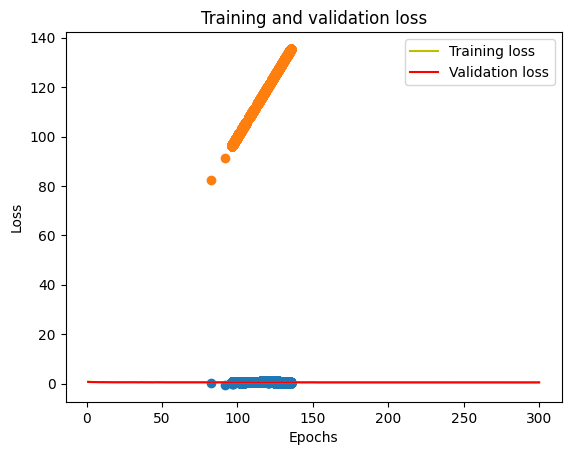

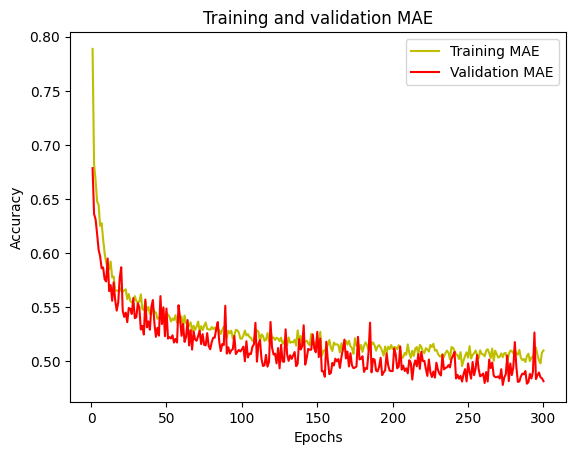

149/149 [==============================] - 0s 826us/step
Predicted values are:  [[19.968447]
 [26.902075]
 [24.983011]
 ...
 [41.56451 ]
 [24.364256]
 [25.24033 ]]
Real values are:  ts
2022-07-25 07:00:00+00:00    23.0
2021-09-07 09:00:00+00:00    25.0
2021-08-01 02:00:00+00:00     9.0
2021-09-30 06:00:00+00:00    33.0
2021-11-27 16:00:00+00:00    64.0
                             ... 
2022-10-27 23:00:00+00:00    27.0
2023-01-13 17:00:00+00:00    86.0
2021-10-13 04:00:00+00:00    36.0
2022-03-22 13:00:00+00:00    31.0
2021-08-12 07:00:00+00:00    22.0
Name: Biossido di Azoto, Length: 4764, dtype: float64


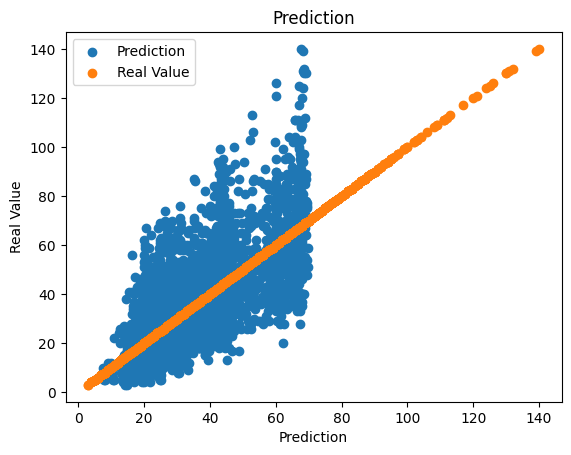

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 64)                320       
                                                                 
 dropout_84 (Dropout)        (None, 64)                0         
                                                                 
 dense_106 (Dense)           (None, 128)               8320      
                                                                 
 dropout_85 (Dropout)        (None, 128)               0         
                                                                 
 dense_107 (Dense)           (None, 64)                8256      
                                                                 
 dropout_86 (Dropout)        (None, 64)                0         
                                                                 
 dense_108 (Dense)           (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 3s 8ms/step - loss: 0.9701 - mean_squared_error: 0.9701 - val_loss: 0.9104 - val_mean_squared_error: 0.9104
Epoch 2/300
173/195 [=========================>....] - ETA: 0s - loss: 0.9275 - mean_squared_error: 0.9275
Epoch 2: val_loss improved from 0.91043 to 0.90411, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.9399 - mean_squared_error: 0.9399 - val_loss: 0.9041 - val_mean_squared_error: 0.9041
Epoch 3/300
175/195 [=========================>....] - ETA: 0s - loss: 0.9258 - mean_squared_error: 0.9258
Epoch 3: val_loss improved from 0.90411 to 0.89573, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9285 - mean_squared_error: 0.9285 - val_loss: 0.8957 - val_mean_squared_error: 0.8957
Epoch 4/300
186/195 [===========================>..] - ETA: 0s - loss: 0.9324 - mean_squared_error: 0.9324
Epoch 4: val_loss improved from 0.89573 to 0.89303, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9285 - mean_squared_error: 0.9285 - val_loss: 0.8930 - val_mean_squared_error: 0.8930
Epoch 5/300
194/195 [============================>.] - ETA: 0s - loss: 0.9339 - mean_squared_error: 0.9339
Epoch 5: val_loss did not improve from 0.89303
195/195 [==============================] - 1s 3ms/step - loss: 0.9325 - mean_squared_error: 0.9325 - val_loss: 0.8943 - val_mean_squared_error: 0.8943
Epoch 6/300
175/195 [=========================>....] - ETA: 0s - loss: 0.9162 - mean_squared_error: 0.9162
Epoch 6: val_loss did not improve from 0.89303
195/195 [==============================] - 1s 3ms/step - loss: 0.9280 - mean_squared_error: 0.9280 - val_loss: 0.8942 - val_mean_squared_error: 0.8942
Epoch 7/300
184/195 [===========================>..] - ETA: 0s - loss: 0.9156 - mean_squared_error: 0.9156
Epoch 7: val_loss improved from 0.89303 to 0.88700, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9250 - mean_squared_error: 0.9250 - val_loss: 0.8870 - val_mean_squared_error: 0.8870
Epoch 8/300
189/195 [============================>.] - ETA: 0s - loss: 0.9264 - mean_squared_error: 0.9264
Epoch 8: val_loss did not improve from 0.88700
195/195 [==============================] - 1s 3ms/step - loss: 0.9226 - mean_squared_error: 0.9226 - val_loss: 0.8932 - val_mean_squared_error: 0.8932
Epoch 9/300
184/195 [===========================>..] - ETA: 0s - loss: 0.9362 - mean_squared_error: 0.9362
Epoch 9: val_loss did not improve from 0.88700
195/195 [==============================] - 1s 3ms/step - loss: 0.9321 - mean_squared_error: 0.9321 - val_loss: 0.8935 - val_mean_squared_error: 0.8935
Epoch 10/300
191/195 [============================>.] - ETA: 0s - loss: 0.9276 - mean_squared_error: 0.9276
Epoch 10: val_loss did not improve from 0.88700
195/195 [==============================] - 0s 3ms/step - loss: 0.9277 - mean_square

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9174 - mean_squared_error: 0.9174 - val_loss: 0.8820 - val_mean_squared_error: 0.8820
Epoch 27/300
190/195 [============================>.] - ETA: 0s - loss: 0.9254 - mean_squared_error: 0.9254
Epoch 27: val_loss did not improve from 0.88204
195/195 [==============================] - 1s 3ms/step - loss: 0.9230 - mean_squared_error: 0.9230 - val_loss: 0.9076 - val_mean_squared_error: 0.9076
Epoch 28/300
193/195 [============================>.] - ETA: 0s - loss: 0.9282 - mean_squared_error: 0.9282
Epoch 28: val_loss did not improve from 0.88204
195/195 [==============================] - 1s 3ms/step - loss: 0.9254 - mean_squared_error: 0.9254 - val_loss: 0.8987 - val_mean_squared_error: 0.8987
Epoch 29/300
173/195 [=========================>....] - ETA: 0s - loss: 0.9198 - mean_squared_error: 0.9198
Epoch 29: val_loss did not improve from 0.88204
195/195 [==============================] - 0s 3ms/step - loss: 0.9204 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9188 - mean_squared_error: 0.9188 - val_loss: 0.8820 - val_mean_squared_error: 0.8820
Epoch 38/300
174/195 [=========================>....] - ETA: 0s - loss: 0.9246 - mean_squared_error: 0.9246
Epoch 38: val_loss did not improve from 0.88197
195/195 [==============================] - 0s 2ms/step - loss: 0.9176 - mean_squared_error: 0.9176 - val_loss: 0.9021 - val_mean_squared_error: 0.9021
Epoch 39/300
177/195 [==========================>...] - ETA: 0s - loss: 0.9170 - mean_squared_error: 0.9170
Epoch 39: val_loss did not improve from 0.88197
195/195 [==============================] - 1s 3ms/step - loss: 0.9164 - mean_squared_error: 0.9164 - val_loss: 0.8885 - val_mean_squared_error: 0.8885
Epoch 40/300
178/195 [==========================>...] - ETA: 0s - loss: 0.9260 - mean_squared_error: 0.9260
Epoch 40: val_loss did not improve from 0.88197
195/195 [==============================] - 0s 2ms/step - loss: 0.9189 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.9192 - mean_squared_error: 0.9192 - val_loss: 0.8816 - val_mean_squared_error: 0.8816
Epoch 43/300
187/195 [===========================>..] - ETA: 0s - loss: 0.9108 - mean_squared_error: 0.9108
Epoch 43: val_loss did not improve from 0.88162
195/195 [==============================] - 1s 3ms/step - loss: 0.9103 - mean_squared_error: 0.9103 - val_loss: 0.8913 - val_mean_squared_error: 0.8913
Epoch 44/300
175/195 [=========================>....] - ETA: 0s - loss: 0.9187 - mean_squared_error: 0.9187
Epoch 44: val_loss did not improve from 0.88162
195/195 [==============================] - 1s 3ms/step - loss: 0.9144 - mean_squared_error: 0.9144 - val_loss: 0.8842 - val_mean_squared_error: 0.8842
Epoch 45/300
193/195 [============================>.] - ETA: 0s - loss: 0.9143 - mean_squared_error: 0.9143
Epoch 45: val_loss improved from 0.88162 to 0.87644, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9135 - mean_squared_error: 0.9135 - val_loss: 0.8764 - val_mean_squared_error: 0.8764
Epoch 46/300
177/195 [==========================>...] - ETA: 0s - loss: 0.9174 - mean_squared_error: 0.9174
Epoch 46: val_loss did not improve from 0.87644
195/195 [==============================] - 1s 3ms/step - loss: 0.9163 - mean_squared_error: 0.9163 - val_loss: 0.8819 - val_mean_squared_error: 0.8819
Epoch 47/300
175/195 [=========================>....] - ETA: 0s - loss: 0.9007 - mean_squared_error: 0.9007
Epoch 47: val_loss did not improve from 0.87644
195/195 [==============================] - 1s 3ms/step - loss: 0.9090 - mean_squared_error: 0.9090 - val_loss: 0.8788 - val_mean_squared_error: 0.8788
Epoch 48/300
188/195 [===========================>..] - ETA: 0s - loss: 0.8951 - mean_squared_error: 0.8951
Epoch 48: val_loss did not improve from 0.87644
195/195 [==============================] - 1s 3ms/step - loss: 0.9040 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.9076 - mean_squared_error: 0.9076 - val_loss: 0.8721 - val_mean_squared_error: 0.8721
Epoch 53/300
172/195 [=========================>....] - ETA: 0s - loss: 0.9026 - mean_squared_error: 0.9026
Epoch 53: val_loss did not improve from 0.87205
195/195 [==============================] - 0s 2ms/step - loss: 0.9067 - mean_squared_error: 0.9067 - val_loss: 0.8803 - val_mean_squared_error: 0.8803
Epoch 54/300
177/195 [==========================>...] - ETA: 0s - loss: 0.9051 - mean_squared_error: 0.9051
Epoch 54: val_loss did not improve from 0.87205
195/195 [==============================] - 0s 2ms/step - loss: 0.9064 - mean_squared_error: 0.9064 - val_loss: 0.8728 - val_mean_squared_error: 0.8728
Epoch 55/300
178/195 [==========================>...] - ETA: 0s - loss: 0.8982 - mean_squared_error: 0.8982
Epoch 55: val_loss did not improve from 0.87205
195/195 [==============================] - 0s 2ms/step - loss: 0.9045 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9069 - mean_squared_error: 0.9069 - val_loss: 0.8697 - val_mean_squared_error: 0.8697
Epoch 60/300
178/195 [==========================>...] - ETA: 0s - loss: 0.9000 - mean_squared_error: 0.9000
Epoch 60: val_loss did not improve from 0.86970
195/195 [==============================] - 1s 3ms/step - loss: 0.9043 - mean_squared_error: 0.9043 - val_loss: 0.8727 - val_mean_squared_error: 0.8727
Epoch 61/300
191/195 [============================>.] - ETA: 0s - loss: 0.8974 - mean_squared_error: 0.8974
Epoch 61: val_loss did not improve from 0.86970
195/195 [==============================] - 1s 3ms/step - loss: 0.9019 - mean_squared_error: 0.9019 - val_loss: 0.8718 - val_mean_squared_error: 0.8718
Epoch 62/300
192/195 [============================>.] - ETA: 0s - loss: 0.9019 - mean_squared_error: 0.9019
Epoch 62: val_loss improved from 0.86970 to 0.86784, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9008 - mean_squared_error: 0.9008 - val_loss: 0.8678 - val_mean_squared_error: 0.8678
Epoch 63/300
191/195 [============================>.] - ETA: 0s - loss: 0.9005 - mean_squared_error: 0.9005
Epoch 63: val_loss did not improve from 0.86784
195/195 [==============================] - 1s 3ms/step - loss: 0.9000 - mean_squared_error: 0.9000 - val_loss: 0.8764 - val_mean_squared_error: 0.8764
Epoch 64/300
186/195 [===========================>..] - ETA: 0s - loss: 0.9049 - mean_squared_error: 0.9049
Epoch 64: val_loss did not improve from 0.86784
195/195 [==============================] - 1s 3ms/step - loss: 0.9021 - mean_squared_error: 0.9021 - val_loss: 0.8707 - val_mean_squared_error: 0.8707
Epoch 65/300
175/195 [=========================>....] - ETA: 0s - loss: 0.9043 - mean_squared_error: 0.9043
Epoch 65: val_loss did not improve from 0.86784
195/195 [==============================] - 0s 2ms/step - loss: 0.9050 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8992 - mean_squared_error: 0.8992 - val_loss: 0.8671 - val_mean_squared_error: 0.8671
Epoch 79/300
181/195 [==========================>...] - ETA: 0s - loss: 0.8806 - mean_squared_error: 0.8806
Epoch 79: val_loss did not improve from 0.86715
195/195 [==============================] - 1s 3ms/step - loss: 0.8959 - mean_squared_error: 0.8959 - val_loss: 0.8729 - val_mean_squared_error: 0.8729
Epoch 80/300
185/195 [===========================>..] - ETA: 0s - loss: 0.9058 - mean_squared_error: 0.9058
Epoch 80: val_loss improved from 0.86715 to 0.86570, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.9032 - mean_squared_error: 0.9032 - val_loss: 0.8657 - val_mean_squared_error: 0.8657
Epoch 81/300
188/195 [===========================>..] - ETA: 0s - loss: 0.8967 - mean_squared_error: 0.8967
Epoch 81: val_loss did not improve from 0.86570
195/195 [==============================] - 1s 3ms/step - loss: 0.8983 - mean_squared_error: 0.8983 - val_loss: 0.8677 - val_mean_squared_error: 0.8677
Epoch 82/300
181/195 [==========================>...] - ETA: 0s - loss: 0.9018 - mean_squared_error: 0.9018
Epoch 82: val_loss did not improve from 0.86570
195/195 [==============================] - 1s 3ms/step - loss: 0.8957 - mean_squared_error: 0.8957 - val_loss: 0.8735 - val_mean_squared_error: 0.8735
Epoch 83/300
175/195 [=========================>....] - ETA: 0s - loss: 0.8873 - mean_squared_error: 0.8873
Epoch 83: val_loss did not improve from 0.86570
195/195 [==============================] - 0s 2ms/step - loss: 0.8940 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8944 - mean_squared_error: 0.8944 - val_loss: 0.8574 - val_mean_squared_error: 0.8574
Epoch 87/300
195/195 [==============================] - ETA: 0s - loss: 0.8877 - mean_squared_error: 0.8877
Epoch 87: val_loss improved from 0.85739 to 0.84814, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.8877 - mean_squared_error: 0.8877 - val_loss: 0.8481 - val_mean_squared_error: 0.8481
Epoch 88/300
168/195 [========================>.....] - ETA: 0s - loss: 0.8925 - mean_squared_error: 0.8925
Epoch 88: val_loss improved from 0.84814 to 0.84729, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8897 - mean_squared_error: 0.8897 - val_loss: 0.8473 - val_mean_squared_error: 0.8473
Epoch 89/300
190/195 [============================>.] - ETA: 0s - loss: 0.8848 - mean_squared_error: 0.8848
Epoch 89: val_loss improved from 0.84729 to 0.83773, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.8814 - mean_squared_error: 0.8814 - val_loss: 0.8377 - val_mean_squared_error: 0.8377
Epoch 90/300
193/195 [============================>.] - ETA: 0s - loss: 0.8903 - mean_squared_error: 0.8903
Epoch 90: val_loss improved from 0.83773 to 0.82456, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.8886 - mean_squared_error: 0.8886 - val_loss: 0.8246 - val_mean_squared_error: 0.8246
Epoch 91/300
195/195 [==============================] - ETA: 0s - loss: 0.8869 - mean_squared_error: 0.8869
Epoch 91: val_loss did not improve from 0.82456
195/195 [==============================] - 1s 3ms/step - loss: 0.8869 - mean_squared_error: 0.8869 - val_loss: 0.8413 - val_mean_squared_error: 0.8413
Epoch 92/300
190/195 [============================>.] - ETA: 0s - loss: 0.8833 - mean_squared_error: 0.8833
Epoch 92: val_loss did not improve from 0.82456
195/195 [==============================] - 1s 3ms/step - loss: 0.8838 - mean_squared_error: 0.8838 - val_loss: 0.8250 - val_mean_squared_error: 0.8250
Epoch 93/300
191/195 [============================>.] - ETA: 0s - loss: 0.8754 - mean_squared_error: 0.8754
Epoch 93: val_loss did not improve from 0.82456
195/195 [==============================] - 0s 3ms/step - loss: 0.8759 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8792 - mean_squared_error: 0.8792 - val_loss: 0.8191 - val_mean_squared_error: 0.8191
Epoch 95/300
170/195 [=========================>....] - ETA: 0s - loss: 0.8567 - mean_squared_error: 0.8567
Epoch 95: val_loss did not improve from 0.81907
195/195 [==============================] - 0s 2ms/step - loss: 0.8735 - mean_squared_error: 0.8735 - val_loss: 0.8274 - val_mean_squared_error: 0.8274
Epoch 96/300
195/195 [==============================] - ETA: 0s - loss: 0.8677 - mean_squared_error: 0.8677
Epoch 96: val_loss improved from 0.81907 to 0.81237, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8677 - mean_squared_error: 0.8677 - val_loss: 0.8124 - val_mean_squared_error: 0.8124
Epoch 97/300
194/195 [============================>.] - ETA: 0s - loss: 0.8656 - mean_squared_error: 0.8656
Epoch 97: val_loss improved from 0.81237 to 0.81110, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.8658 - mean_squared_error: 0.8658 - val_loss: 0.8111 - val_mean_squared_error: 0.8111
Epoch 98/300
189/195 [============================>.] - ETA: 0s - loss: 0.8657 - mean_squared_error: 0.8657
Epoch 98: val_loss did not improve from 0.81110
195/195 [==============================] - 1s 3ms/step - loss: 0.8621 - mean_squared_error: 0.8621 - val_loss: 0.8293 - val_mean_squared_error: 0.8293
Epoch 99/300
189/195 [============================>.] - ETA: 0s - loss: 0.8709 - mean_squared_error: 0.8709
Epoch 99: val_loss did not improve from 0.81110
195/195 [==============================] - 1s 3ms/step - loss: 0.8671 - mean_squared_error: 0.8671 - val_loss: 0.8158 - val_mean_squared_error: 0.8158
Epoch 100/300
173/195 [=========================>....] - ETA: 0s - loss: 0.8587 - mean_squared_error: 0.8587
Epoch 100: val_loss improved from 0.81110 to 0.80970, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8584 - mean_squared_error: 0.8584 - val_loss: 0.8097 - val_mean_squared_error: 0.8097
Epoch 101/300
190/195 [============================>.] - ETA: 0s - loss: 0.8724 - mean_squared_error: 0.8724
Epoch 101: val_loss did not improve from 0.80970
195/195 [==============================] - 1s 3ms/step - loss: 0.8683 - mean_squared_error: 0.8683 - val_loss: 0.8261 - val_mean_squared_error: 0.8261
Epoch 102/300
186/195 [===========================>..] - ETA: 0s - loss: 0.8589 - mean_squared_error: 0.8589
Epoch 102: val_loss did not improve from 0.80970
195/195 [==============================] - 1s 3ms/step - loss: 0.8618 - mean_squared_error: 0.8618 - val_loss: 0.8175 - val_mean_squared_error: 0.8175
Epoch 103/300
194/195 [============================>.] - ETA: 0s - loss: 0.8607 - mean_squared_error: 0.8607
Epoch 103: val_loss did not improve from 0.80970
195/195 [==============================] - 0s 2ms/step - loss: 0.8597 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8572 - mean_squared_error: 0.8572 - val_loss: 0.8086 - val_mean_squared_error: 0.8086
Epoch 106/300
195/195 [==============================] - ETA: 0s - loss: 0.8643 - mean_squared_error: 0.8643
Epoch 106: val_loss improved from 0.80860 to 0.80366, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.8643 - mean_squared_error: 0.8643 - val_loss: 0.8037 - val_mean_squared_error: 0.8037
Epoch 107/300
192/195 [============================>.] - ETA: 0s - loss: 0.8528 - mean_squared_error: 0.8528
Epoch 107: val_loss improved from 0.80366 to 0.80135, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.8529 - mean_squared_error: 0.8529 - val_loss: 0.8013 - val_mean_squared_error: 0.8013
Epoch 108/300
175/195 [=========================>....] - ETA: 0s - loss: 0.8419 - mean_squared_error: 0.8419
Epoch 108: val_loss did not improve from 0.80135
195/195 [==============================] - 0s 2ms/step - loss: 0.8513 - mean_squared_error: 0.8513 - val_loss: 0.8161 - val_mean_squared_error: 0.8161
Epoch 109/300
180/195 [==========================>...] - ETA: 0s - loss: 0.8516 - mean_squared_error: 0.8516
Epoch 109: val_loss did not improve from 0.80135
195/195 [==============================] - 1s 3ms/step - loss: 0.8546 - mean_squared_error: 0.8546 - val_loss: 0.8076 - val_mean_squared_error: 0.8076
Epoch 110/300
193/195 [============================>.] - ETA: 0s - loss: 0.8584 - mean_squared_error: 0.8584
Epoch 110: val_loss did not improve from 0.80135
195/195 [==============================] - 0s 3ms/step - loss: 0.8623 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.8493 - mean_squared_error: 0.8493 - val_loss: 0.7992 - val_mean_squared_error: 0.7992
Epoch 112/300
190/195 [============================>.] - ETA: 0s - loss: 0.8535 - mean_squared_error: 0.8535
Epoch 112: val_loss improved from 0.79922 to 0.79628, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.8536 - mean_squared_error: 0.8536 - val_loss: 0.7963 - val_mean_squared_error: 0.7963
Epoch 113/300
175/195 [=========================>....] - ETA: 0s - loss: 0.8350 - mean_squared_error: 0.8350
Epoch 113: val_loss did not improve from 0.79628
195/195 [==============================] - 1s 3ms/step - loss: 0.8481 - mean_squared_error: 0.8481 - val_loss: 0.8058 - val_mean_squared_error: 0.8058
Epoch 114/300
179/195 [==========================>...] - ETA: 0s - loss: 0.8600 - mean_squared_error: 0.8600
Epoch 114: val_loss did not improve from 0.79628
195/195 [==============================] - 0s 2ms/step - loss: 0.8550 - mean_squared_error: 0.8550 - val_loss: 0.8004 - val_mean_squared_error: 0.8004
Epoch 115/300
187/195 [===========================>..] - ETA: 0s - loss: 0.8483 - mean_squared_error: 0.8483
Epoch 115: val_loss did not improve from 0.79628
195/195 [==============================] - 0s 2ms/step - loss: 0.8462 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 6ms/step - loss: 0.8448 - mean_squared_error: 0.8448 - val_loss: 0.7961 - val_mean_squared_error: 0.7961
Epoch 155/300
191/195 [============================>.] - ETA: 0s - loss: 0.8456 - mean_squared_error: 0.8456
Epoch 155: val_loss did not improve from 0.79606
195/195 [==============================] - 0s 2ms/step - loss: 0.8447 - mean_squared_error: 0.8447 - val_loss: 0.8004 - val_mean_squared_error: 0.8004
Epoch 156/300
181/195 [==========================>...] - ETA: 0s - loss: 0.8477 - mean_squared_error: 0.8477
Epoch 156: val_loss did not improve from 0.79606
195/195 [==============================] - 0s 2ms/step - loss: 0.8430 - mean_squared_error: 0.8430 - val_loss: 0.8025 - val_mean_squared_error: 0.8025
Epoch 157/300
190/195 [============================>.] - ETA: 0s - loss: 0.8431 - mean_squared_error: 0.8431
Epoch 157: val_loss did not improve from 0.79606
195/195 [==============================] - 0s 2ms/step - loss: 0.8442 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 7ms/step - loss: 0.8361 - mean_squared_error: 0.8361 - val_loss: 0.7948 - val_mean_squared_error: 0.7948
Epoch 205/300
175/195 [=========================>....] - ETA: 0s - loss: 0.8352 - mean_squared_error: 0.8352
Epoch 205: val_loss did not improve from 0.79479
195/195 [==============================] - 0s 2ms/step - loss: 0.8408 - mean_squared_error: 0.8408 - val_loss: 0.8004 - val_mean_squared_error: 0.8004
Epoch 206/300
193/195 [============================>.] - ETA: 0s - loss: 0.8310 - mean_squared_error: 0.8310
Epoch 206: val_loss did not improve from 0.79479
195/195 [==============================] - 0s 2ms/step - loss: 0.8312 - mean_squared_error: 0.8312 - val_loss: 0.8022 - val_mean_squared_error: 0.8022
Epoch 207/300
178/195 [==========================>...] - ETA: 0s - loss: 0.8317 - mean_squared_error: 0.8317
Epoch 207: val_loss did not improve from 0.79479
195/195 [==============================] - 0s 2ms/step - loss: 0.8387 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 11ms/step - loss: 0.8360 - mean_squared_error: 0.8360 - val_loss: 0.7931 - val_mean_squared_error: 0.7931
Epoch 279/300
189/195 [============================>.] - ETA: 0s - loss: 0.8329 - mean_squared_error: 0.8329
Epoch 279: val_loss did not improve from 0.79312
195/195 [==============================] - 1s 4ms/step - loss: 0.8330 - mean_squared_error: 0.8330 - val_loss: 0.8039 - val_mean_squared_error: 0.8039
Epoch 280/300
186/195 [===========================>..] - ETA: 0s - loss: 0.8396 - mean_squared_error: 0.8396
Epoch 280: val_loss did not improve from 0.79312
195/195 [==============================] - 1s 4ms/step - loss: 0.8351 - mean_squared_error: 0.8351 - val_loss: 0.8125 - val_mean_squared_error: 0.8125
Epoch 281/300
189/195 [============================>.] - ETA: 0s - loss: 0.8383 - mean_squared_error: 0.8383
Epoch 281: val_loss did not improve from 0.79312
195/195 [==============================] - 1s 4ms/step - loss: 0.8405 - 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 12ms/step - loss: 0.8353 - mean_squared_error: 0.8353 - val_loss: 0.7911 - val_mean_squared_error: 0.7911
Epoch 290/300
189/195 [============================>.] - ETA: 0s - loss: 0.8468 - mean_squared_error: 0.8468
Epoch 290: val_loss did not improve from 0.79106
195/195 [==============================] - 1s 3ms/step - loss: 0.8418 - mean_squared_error: 0.8418 - val_loss: 0.8011 - val_mean_squared_error: 0.8011
Epoch 291/300
180/195 [==========================>...] - ETA: 0s - loss: 0.8412 - mean_squared_error: 0.8412
Epoch 291: val_loss did not improve from 0.79106
195/195 [==============================] - 1s 3ms/step - loss: 0.8393 - mean_squared_error: 0.8393 - val_loss: 0.8049 - val_mean_squared_error: 0.8049
Epoch 292/300
190/195 [============================>.] - ETA: 0s - loss: 0.8319 - mean_squared_error: 0.8319
Epoch 292: val_loss did not improve from 0.79106
195/195 [==============================] - 1s 3ms/step - loss: 0.8339 - 

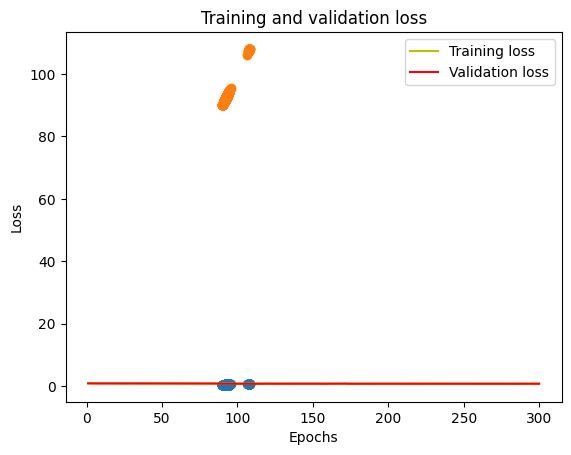

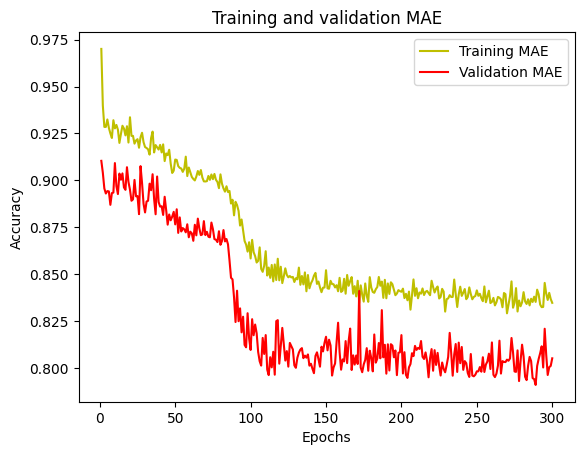

105/105 [==============================] - 0s 1ms/step
Predicted values are:  [[25.090202]
 [22.98141 ]
 [26.356174]
 ...
 [35.898743]
 [22.69381 ]
 [32.830074]]
Real values are:  ts
2022-05-13 19:00:00+00:00    33.0
2022-07-19 12:00:00+00:00    16.0
2022-09-13 09:00:00+00:00    19.0
2022-08-11 19:00:00+00:00    24.0
2023-04-18 22:00:00+00:00    27.0
                             ... 
2022-09-22 11:00:00+00:00    23.0
2022-11-09 00:00:00+00:00    29.0
2023-02-07 16:00:00+00:00    57.0
2023-06-05 16:00:00+00:00    50.0
2023-02-06 14:00:00+00:00    18.0
Name: Biossido di Azoto, Length: 3336, dtype: float64


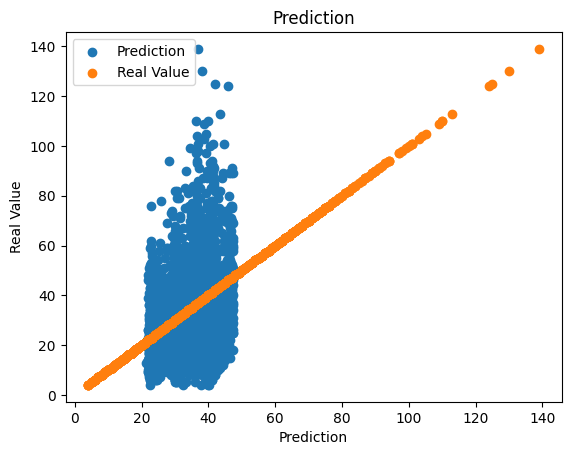

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 64)                320       
                                                                 
 dropout_88 (Dropout)        (None, 64)                0         
                                                                 
 dense_111 (Dense)           (None, 128)               8320      
                                                                 
 dropout_89 (Dropout)        (None, 128)               0         
                                                                 
 dense_112 (Dense)           (None, 64)                8256      
                                                                 
 dropout_90 (Dropout)        (None, 64)                0         
                                                                 
 dense_113 (Dense)           (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 3s 10ms/step - loss: 0.7702 - mean_squared_error: 0.7702 - val_loss: 0.7056 - val_mean_squared_error: 0.7056
Epoch 2/300
178/195 [==========================>...] - ETA: 0s - loss: 0.7319 - mean_squared_error: 0.7319
Epoch 2: val_loss improved from 0.70561 to 0.68539, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.7276 - mean_squared_error: 0.7276 - val_loss: 0.6854 - val_mean_squared_error: 0.6854
Epoch 3/300
188/195 [===========================>..] - ETA: 0s - loss: 0.7072 - mean_squared_error: 0.7072
Epoch 3: val_loss improved from 0.68539 to 0.66101, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.7053 - mean_squared_error: 0.7053 - val_loss: 0.6610 - val_mean_squared_error: 0.6610
Epoch 4/300
178/195 [==========================>...] - ETA: 0s - loss: 0.6952 - mean_squared_error: 0.6952
Epoch 4: val_loss improved from 0.66101 to 0.65600, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.6901 - mean_squared_error: 0.6901 - val_loss: 0.6560 - val_mean_squared_error: 0.6560
Epoch 5/300
182/195 [===========================>..] - ETA: 0s - loss: 0.6928 - mean_squared_error: 0.6928
Epoch 5: val_loss improved from 0.65600 to 0.63915, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 11ms/step - loss: 0.6919 - mean_squared_error: 0.6919 - val_loss: 0.6391 - val_mean_squared_error: 0.6391
Epoch 6/300
180/195 [==========================>...] - ETA: 0s - loss: 0.6967 - mean_squared_error: 0.6967
Epoch 6: val_loss improved from 0.63915 to 0.63770, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.6868 - mean_squared_error: 0.6868 - val_loss: 0.6377 - val_mean_squared_error: 0.6377
Epoch 7/300
192/195 [============================>.] - ETA: 0s - loss: 0.6757 - mean_squared_error: 0.6757
Epoch 7: val_loss improved from 0.63770 to 0.62192, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.6743 - mean_squared_error: 0.6743 - val_loss: 0.6219 - val_mean_squared_error: 0.6219
Epoch 8/300
180/195 [==========================>...] - ETA: 0s - loss: 0.6699 - mean_squared_error: 0.6699
Epoch 8: val_loss improved from 0.62192 to 0.62028, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.6660 - mean_squared_error: 0.6660 - val_loss: 0.6203 - val_mean_squared_error: 0.6203
Epoch 9/300
187/195 [===========================>..] - ETA: 0s - loss: 0.6617 - mean_squared_error: 0.6617
Epoch 9: val_loss did not improve from 0.62028
195/195 [==============================] - 1s 3ms/step - loss: 0.6565 - mean_squared_error: 0.6565 - val_loss: 0.6750 - val_mean_squared_error: 0.6750
Epoch 10/300
182/195 [===========================>..] - ETA: 0s - loss: 0.6612 - mean_squared_error: 0.6612
Epoch 10: val_loss did not improve from 0.62028
195/195 [==============================] - 1s 3ms/step - loss: 0.6646 - mean_squared_error: 0.6646 - val_loss: 0.6270 - val_mean_squared_error: 0.6270
Epoch 11/300
189/195 [============================>.] - ETA: 0s - loss: 0.6538 - mean_squared_error: 0.6538
Epoch 11: val_loss improved from 0.62028 to 0.60909, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 3s 15ms/step - loss: 0.6560 - mean_squared_error: 0.6560 - val_loss: 0.6091 - val_mean_squared_error: 0.6091
Epoch 12/300
180/195 [==========================>...] - ETA: 0s - loss: 0.6540 - mean_squared_error: 0.6540
Epoch 12: val_loss did not improve from 0.60909
195/195 [==============================] - 1s 3ms/step - loss: 0.6562 - mean_squared_error: 0.6562 - val_loss: 0.6168 - val_mean_squared_error: 0.6168
Epoch 13/300
191/195 [============================>.] - ETA: 0s - loss: 0.6568 - mean_squared_error: 0.6568
Epoch 13: val_loss improved from 0.60909 to 0.60443, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 6s 30ms/step - loss: 0.6551 - mean_squared_error: 0.6551 - val_loss: 0.6044 - val_mean_squared_error: 0.6044
Epoch 14/300
179/195 [==========================>...] - ETA: 0s - loss: 0.6554 - mean_squared_error: 0.6554
Epoch 14: val_loss did not improve from 0.60443
195/195 [==============================] - 1s 3ms/step - loss: 0.6597 - mean_squared_error: 0.6597 - val_loss: 0.6047 - val_mean_squared_error: 0.6047
Epoch 15/300
176/195 [==========================>...] - ETA: 0s - loss: 0.6553 - mean_squared_error: 0.6553
Epoch 15: val_loss did not improve from 0.60443
195/195 [==============================] - 1s 3ms/step - loss: 0.6472 - mean_squared_error: 0.6472 - val_loss: 0.6149 - val_mean_squared_error: 0.6149
Epoch 16/300
186/195 [===========================>..] - ETA: 0s - loss: 0.6450 - mean_squared_error: 0.6450
Epoch 16: val_loss improved from 0.60443 to 0.60402, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.6398 - mean_squared_error: 0.6398 - val_loss: 0.6040 - val_mean_squared_error: 0.6040
Epoch 17/300
189/195 [============================>.] - ETA: 0s - loss: 0.6419 - mean_squared_error: 0.6419
Epoch 17: val_loss did not improve from 0.60402
195/195 [==============================] - 1s 4ms/step - loss: 0.6410 - mean_squared_error: 0.6410 - val_loss: 0.6113 - val_mean_squared_error: 0.6113
Epoch 18/300
184/195 [===========================>..] - ETA: 0s - loss: 0.6397 - mean_squared_error: 0.6397
Epoch 18: val_loss improved from 0.60402 to 0.59401, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.6418 - mean_squared_error: 0.6418 - val_loss: 0.5940 - val_mean_squared_error: 0.5940
Epoch 19/300
189/195 [============================>.] - ETA: 0s - loss: 0.6507 - mean_squared_error: 0.6507
Epoch 19: val_loss did not improve from 0.59401
195/195 [==============================] - 1s 3ms/step - loss: 0.6493 - mean_squared_error: 0.6493 - val_loss: 0.5998 - val_mean_squared_error: 0.5998
Epoch 20/300
180/195 [==========================>...] - ETA: 0s - loss: 0.6382 - mean_squared_error: 0.6382
Epoch 20: val_loss improved from 0.59401 to 0.58244, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.6400 - mean_squared_error: 0.6400 - val_loss: 0.5824 - val_mean_squared_error: 0.5824
Epoch 21/300
187/195 [===========================>..] - ETA: 0s - loss: 0.6344 - mean_squared_error: 0.6344
Epoch 21: val_loss did not improve from 0.58244
195/195 [==============================] - 1s 3ms/step - loss: 0.6304 - mean_squared_error: 0.6304 - val_loss: 0.5942 - val_mean_squared_error: 0.5942
Epoch 22/300
189/195 [============================>.] - ETA: 0s - loss: 0.6216 - mean_squared_error: 0.6216
Epoch 22: val_loss improved from 0.58244 to 0.57996, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.6193 - mean_squared_error: 0.6193 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 23/300
178/195 [==========================>...] - ETA: 0s - loss: 0.6148 - mean_squared_error: 0.6148
Epoch 23: val_loss improved from 0.57996 to 0.55868, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.6145 - mean_squared_error: 0.6145 - val_loss: 0.5587 - val_mean_squared_error: 0.5587
Epoch 24/300
191/195 [============================>.] - ETA: 0s - loss: 0.6160 - mean_squared_error: 0.6160
Epoch 24: val_loss did not improve from 0.55868
195/195 [==============================] - 1s 3ms/step - loss: 0.6175 - mean_squared_error: 0.6175 - val_loss: 0.5613 - val_mean_squared_error: 0.5613
Epoch 25/300
185/195 [===========================>..] - ETA: 0s - loss: 0.6236 - mean_squared_error: 0.6236
Epoch 25: val_loss did not improve from 0.55868
195/195 [==============================] - 1s 3ms/step - loss: 0.6198 - mean_squared_error: 0.6198 - val_loss: 0.5712 - val_mean_squared_error: 0.5712
Epoch 26/300
175/195 [=========================>....] - ETA: 0s - loss: 0.6046 - mean_squared_error: 0.6046
Epoch 26: val_loss did not improve from 0.55868
195/195 [==============================] - 1s 3ms/step - loss: 0.6119 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.6156 - mean_squared_error: 0.6156 - val_loss: 0.5586 - val_mean_squared_error: 0.5586
Epoch 29/300
184/195 [===========================>..] - ETA: 0s - loss: 0.6034 - mean_squared_error: 0.6034
Epoch 29: val_loss did not improve from 0.55861
195/195 [==============================] - 1s 3ms/step - loss: 0.6066 - mean_squared_error: 0.6066 - val_loss: 0.5790 - val_mean_squared_error: 0.5790
Epoch 30/300
176/195 [==========================>...] - ETA: 0s - loss: 0.6112 - mean_squared_error: 0.6112
Epoch 30: val_loss improved from 0.55861 to 0.54490, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.6093 - mean_squared_error: 0.6093 - val_loss: 0.5449 - val_mean_squared_error: 0.5449
Epoch 31/300
189/195 [============================>.] - ETA: 0s - loss: 0.6109 - mean_squared_error: 0.6109
Epoch 31: val_loss did not improve from 0.54490
195/195 [==============================] - 1s 3ms/step - loss: 0.6094 - mean_squared_error: 0.6094 - val_loss: 0.5471 - val_mean_squared_error: 0.5471
Epoch 32/300
172/195 [=========================>....] - ETA: 0s - loss: 0.6059 - mean_squared_error: 0.6059
Epoch 32: val_loss did not improve from 0.54490
195/195 [==============================] - 1s 3ms/step - loss: 0.6017 - mean_squared_error: 0.6017 - val_loss: 0.5595 - val_mean_squared_error: 0.5595
Epoch 33/300
181/195 [==========================>...] - ETA: 0s - loss: 0.6156 - mean_squared_error: 0.6156
Epoch 33: val_loss improved from 0.54490 to 0.54028, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.6093 - mean_squared_error: 0.6093 - val_loss: 0.5403 - val_mean_squared_error: 0.5403
Epoch 34/300
181/195 [==========================>...] - ETA: 0s - loss: 0.6064 - mean_squared_error: 0.6064
Epoch 34: val_loss did not improve from 0.54028
195/195 [==============================] - 1s 3ms/step - loss: 0.6071 - mean_squared_error: 0.6071 - val_loss: 0.5559 - val_mean_squared_error: 0.5559
Epoch 35/300
181/195 [==========================>...] - ETA: 0s - loss: 0.5991 - mean_squared_error: 0.5991
Epoch 35: val_loss improved from 0.54028 to 0.53734, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 9ms/step - loss: 0.5978 - mean_squared_error: 0.5978 - val_loss: 0.5373 - val_mean_squared_error: 0.5373
Epoch 36/300
185/195 [===========================>..] - ETA: 0s - loss: 0.5965 - mean_squared_error: 0.5965
Epoch 36: val_loss improved from 0.53734 to 0.53076, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.5990 - mean_squared_error: 0.5990 - val_loss: 0.5308 - val_mean_squared_error: 0.5308
Epoch 37/300
195/195 [==============================] - ETA: 0s - loss: 0.6002 - mean_squared_error: 0.6002
Epoch 37: val_loss did not improve from 0.53076
195/195 [==============================] - 1s 3ms/step - loss: 0.6002 - mean_squared_error: 0.6002 - val_loss: 0.5339 - val_mean_squared_error: 0.5339
Epoch 38/300
176/195 [==========================>...] - ETA: 0s - loss: 0.6032 - mean_squared_error: 0.6032
Epoch 38: val_loss did not improve from 0.53076
195/195 [==============================] - 1s 3ms/step - loss: 0.5979 - mean_squared_error: 0.5979 - val_loss: 0.5447 - val_mean_squared_error: 0.5447
Epoch 39/300
190/195 [============================>.] - ETA: 0s - loss: 0.5968 - mean_squared_error: 0.5968
Epoch 39: val_loss did not improve from 0.53076
195/195 [==============================] - 1s 3ms/step - loss: 0.5981 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.5936 - mean_squared_error: 0.5936 - val_loss: 0.5195 - val_mean_squared_error: 0.5195
Epoch 44/300
185/195 [===========================>..] - ETA: 0s - loss: 0.6096 - mean_squared_error: 0.6096
Epoch 44: val_loss did not improve from 0.51945
195/195 [==============================] - 1s 3ms/step - loss: 0.6064 - mean_squared_error: 0.6064 - val_loss: 0.5494 - val_mean_squared_error: 0.5494
Epoch 45/300
193/195 [============================>.] - ETA: 0s - loss: 0.5973 - mean_squared_error: 0.5973
Epoch 45: val_loss did not improve from 0.51945
195/195 [==============================] - 0s 3ms/step - loss: 0.5995 - mean_squared_error: 0.5995 - val_loss: 0.5314 - val_mean_squared_error: 0.5314
Epoch 46/300
179/195 [==========================>...] - ETA: 0s - loss: 0.6015 - mean_squared_error: 0.6015
Epoch 46: val_loss did not improve from 0.51945
195/195 [==============================] - 1s 3ms/step - loss: 0.6022 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 7ms/step - loss: 0.5874 - mean_squared_error: 0.5874 - val_loss: 0.5151 - val_mean_squared_error: 0.5151
Epoch 76/300
172/195 [=========================>....] - ETA: 0s - loss: 0.5871 - mean_squared_error: 0.5871
Epoch 76: val_loss did not improve from 0.51513
195/195 [==============================] - 1s 3ms/step - loss: 0.5807 - mean_squared_error: 0.5807 - val_loss: 0.5340 - val_mean_squared_error: 0.5340
Epoch 77/300
183/195 [===========================>..] - ETA: 0s - loss: 0.5919 - mean_squared_error: 0.5919
Epoch 77: val_loss did not improve from 0.51513
195/195 [==============================] - 1s 3ms/step - loss: 0.5985 - mean_squared_error: 0.5985 - val_loss: 0.5616 - val_mean_squared_error: 0.5616
Epoch 78/300
189/195 [============================>.] - ETA: 0s - loss: 0.5819 - mean_squared_error: 0.5819
Epoch 78: val_loss did not improve from 0.51513
195/195 [==============================] - 1s 3ms/step - loss: 0.5838 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.5771 - mean_squared_error: 0.5771 - val_loss: 0.5145 - val_mean_squared_error: 0.5145
Epoch 102/300
176/195 [==========================>...] - ETA: 0s - loss: 0.5904 - mean_squared_error: 0.5904
Epoch 102: val_loss did not improve from 0.51447
195/195 [==============================] - 1s 3ms/step - loss: 0.5904 - mean_squared_error: 0.5904 - val_loss: 0.5324 - val_mean_squared_error: 0.5324
Epoch 103/300
190/195 [============================>.] - ETA: 0s - loss: 0.5776 - mean_squared_error: 0.5776
Epoch 103: val_loss did not improve from 0.51447
195/195 [==============================] - 1s 3ms/step - loss: 0.5814 - mean_squared_error: 0.5814 - val_loss: 0.5253 - val_mean_squared_error: 0.5253
Epoch 104/300
180/195 [==========================>...] - ETA: 0s - loss: 0.5784 - mean_squared_error: 0.5784
Epoch 104: val_loss did not improve from 0.51447
195/195 [==============================] - 1s 3ms/step - loss: 0.5825 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.5797 - mean_squared_error: 0.5797 - val_loss: 0.5114 - val_mean_squared_error: 0.5114
Epoch 115/300
188/195 [===========================>..] - ETA: 0s - loss: 0.5717 - mean_squared_error: 0.5717
Epoch 115: val_loss did not improve from 0.51138
195/195 [==============================] - 1s 3ms/step - loss: 0.5724 - mean_squared_error: 0.5724 - val_loss: 0.5210 - val_mean_squared_error: 0.5210
Epoch 116/300
177/195 [==========================>...] - ETA: 0s - loss: 0.5895 - mean_squared_error: 0.5895
Epoch 116: val_loss did not improve from 0.51138
195/195 [==============================] - 1s 3ms/step - loss: 0.5853 - mean_squared_error: 0.5853 - val_loss: 0.5147 - val_mean_squared_error: 0.5147
Epoch 117/300
177/195 [==========================>...] - ETA: 0s - loss: 0.5854 - mean_squared_error: 0.5854
Epoch 117: val_loss did not improve from 0.51138
195/195 [==============================] - 1s 3ms/step - loss: 0.5836 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 6ms/step - loss: 0.5722 - mean_squared_error: 0.5722 - val_loss: 0.5086 - val_mean_squared_error: 0.5086
Epoch 139/300
191/195 [============================>.] - ETA: 0s - loss: 0.5781 - mean_squared_error: 0.5781
Epoch 139: val_loss did not improve from 0.50862
195/195 [==============================] - 0s 2ms/step - loss: 0.5781 - mean_squared_error: 0.5781 - val_loss: 0.5232 - val_mean_squared_error: 0.5232
Epoch 140/300
186/195 [===========================>..] - ETA: 0s - loss: 0.5792 - mean_squared_error: 0.5792
Epoch 140: val_loss did not improve from 0.50862
195/195 [==============================] - 0s 2ms/step - loss: 0.5743 - mean_squared_error: 0.5743 - val_loss: 0.5094 - val_mean_squared_error: 0.5094
Epoch 141/300
190/195 [============================>.] - ETA: 0s - loss: 0.5893 - mean_squared_error: 0.5893
Epoch 141: val_loss did not improve from 0.50862
195/195 [==============================] - 0s 2ms/step - loss: 0.5875 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 7ms/step - loss: 0.5698 - mean_squared_error: 0.5698 - val_loss: 0.5039 - val_mean_squared_error: 0.5039
Epoch 161/300
181/195 [==========================>...] - ETA: 0s - loss: 0.5735 - mean_squared_error: 0.5735
Epoch 161: val_loss did not improve from 0.50394
195/195 [==============================] - 0s 2ms/step - loss: 0.5697 - mean_squared_error: 0.5697 - val_loss: 0.5190 - val_mean_squared_error: 0.5190
Epoch 162/300
179/195 [==========================>...] - ETA: 0s - loss: 0.5693 - mean_squared_error: 0.5693
Epoch 162: val_loss did not improve from 0.50394
195/195 [==============================] - 0s 2ms/step - loss: 0.5736 - mean_squared_error: 0.5736 - val_loss: 0.5149 - val_mean_squared_error: 0.5149
Epoch 163/300
169/195 [=========================>....] - ETA: 0s - loss: 0.5634 - mean_squared_error: 0.5634
Epoch 163: val_loss did not improve from 0.50394
195/195 [==============================] - 0s 2ms/step - loss: 0.5772 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 6ms/step - loss: 0.5650 - mean_squared_error: 0.5650 - val_loss: 0.5033 - val_mean_squared_error: 0.5033
Epoch 180/300
182/195 [===========================>..] - ETA: 0s - loss: 0.5617 - mean_squared_error: 0.5617
Epoch 180: val_loss did not improve from 0.50331
195/195 [==============================] - 0s 2ms/step - loss: 0.5673 - mean_squared_error: 0.5673 - val_loss: 0.5259 - val_mean_squared_error: 0.5259
Epoch 181/300
178/195 [==========================>...] - ETA: 0s - loss: 0.5609 - mean_squared_error: 0.5609
Epoch 181: val_loss did not improve from 0.50331
195/195 [==============================] - 0s 2ms/step - loss: 0.5705 - mean_squared_error: 0.5705 - val_loss: 0.5114 - val_mean_squared_error: 0.5114
Epoch 182/300
185/195 [===========================>..] - ETA: 0s - loss: 0.5637 - mean_squared_error: 0.5637
Epoch 182: val_loss did not improve from 0.50331
195/195 [==============================] - 0s 2ms/step - loss: 0.5705 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 6ms/step - loss: 0.5698 - mean_squared_error: 0.5698 - val_loss: 0.5020 - val_mean_squared_error: 0.5020
Epoch 191/300
190/195 [============================>.] - ETA: 0s - loss: 0.5768 - mean_squared_error: 0.5768
Epoch 191: val_loss did not improve from 0.50196
195/195 [==============================] - 0s 2ms/step - loss: 0.5744 - mean_squared_error: 0.5744 - val_loss: 0.5148 - val_mean_squared_error: 0.5148
Epoch 192/300
178/195 [==========================>...] - ETA: 0s - loss: 0.5669 - mean_squared_error: 0.5669
Epoch 192: val_loss did not improve from 0.50196
195/195 [==============================] - 0s 2ms/step - loss: 0.5688 - mean_squared_error: 0.5688 - val_loss: 0.5185 - val_mean_squared_error: 0.5185
Epoch 193/300
176/195 [==========================>...] - ETA: 0s - loss: 0.5691 - mean_squared_error: 0.5691
Epoch 193: val_loss did not improve from 0.50196
195/195 [==============================] - 0s 2ms/step - loss: 0.5679 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 6ms/step - loss: 0.5641 - mean_squared_error: 0.5641 - val_loss: 0.5008 - val_mean_squared_error: 0.5008
Epoch 206/300
185/195 [===========================>..] - ETA: 0s - loss: 0.5668 - mean_squared_error: 0.5668
Epoch 206: val_loss did not improve from 0.50083
195/195 [==============================] - 0s 2ms/step - loss: 0.5639 - mean_squared_error: 0.5639 - val_loss: 0.5364 - val_mean_squared_error: 0.5364
Epoch 207/300
184/195 [===========================>..] - ETA: 0s - loss: 0.5738 - mean_squared_error: 0.5738
Epoch 207: val_loss did not improve from 0.50083
195/195 [==============================] - 0s 2ms/step - loss: 0.5703 - mean_squared_error: 0.5703 - val_loss: 0.5148 - val_mean_squared_error: 0.5148
Epoch 208/300
189/195 [============================>.] - ETA: 0s - loss: 0.5667 - mean_squared_error: 0.5667
Epoch 208: val_loss did not improve from 0.50083
195/195 [==============================] - 0s 2ms/step - loss: 0.5683 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 1s 6ms/step - loss: 0.5649 - mean_squared_error: 0.5649 - val_loss: 0.4995 - val_mean_squared_error: 0.4995
Epoch 210/300
194/195 [============================>.] - ETA: 0s - loss: 0.5642 - mean_squared_error: 0.5642
Epoch 210: val_loss did not improve from 0.49946
195/195 [==============================] - 0s 2ms/step - loss: 0.5645 - mean_squared_error: 0.5645 - val_loss: 0.5057 - val_mean_squared_error: 0.5057
Epoch 211/300
186/195 [===========================>..] - ETA: 0s - loss: 0.5604 - mean_squared_error: 0.5604
Epoch 211: val_loss improved from 0.49946 to 0.49908, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.5632 - mean_squared_error: 0.5632 - val_loss: 0.4991 - val_mean_squared_error: 0.4991
Epoch 212/300
181/195 [==========================>...] - ETA: 0s - loss: 0.5732 - mean_squared_error: 0.5732
Epoch 212: val_loss did not improve from 0.49908
195/195 [==============================] - 1s 3ms/step - loss: 0.5729 - mean_squared_error: 0.5729 - val_loss: 0.5053 - val_mean_squared_error: 0.5053
Epoch 213/300
195/195 [==============================] - ETA: 0s - loss: 0.5661 - mean_squared_error: 0.5661
Epoch 213: val_loss did not improve from 0.49908
195/195 [==============================] - 1s 3ms/step - loss: 0.5661 - mean_squared_error: 0.5661 - val_loss: 0.5170 - val_mean_squared_error: 0.5170
Epoch 214/300
180/195 [==========================>...] - ETA: 0s - loss: 0.5731 - mean_squared_error: 0.5731
Epoch 214: val_loss did not improve from 0.49908
195/195 [==============================] - 1s 4ms/step - loss: 0.5698 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.5671 - mean_squared_error: 0.5671 - val_loss: 0.4951 - val_mean_squared_error: 0.4951
Epoch 239/300
174/195 [=========================>....] - ETA: 0s - loss: 0.5616 - mean_squared_error: 0.5616
Epoch 239: val_loss did not improve from 0.49505
195/195 [==============================] - 0s 2ms/step - loss: 0.5728 - mean_squared_error: 0.5728 - val_loss: 0.5152 - val_mean_squared_error: 0.5152
Epoch 240/300
180/195 [==========================>...] - ETA: 0s - loss: 0.5669 - mean_squared_error: 0.5669
Epoch 240: val_loss did not improve from 0.49505
195/195 [==============================] - 0s 2ms/step - loss: 0.5673 - mean_squared_error: 0.5673 - val_loss: 0.5002 - val_mean_squared_error: 0.5002
Epoch 241/300
175/195 [=========================>....] - ETA: 0s - loss: 0.5771 - mean_squared_error: 0.5771
Epoch 241: val_loss did not improve from 0.49505
195/195 [==============================] - 1s 3ms/step - loss: 0.5745 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.5682 - mean_squared_error: 0.5682 - val_loss: 0.4938 - val_mean_squared_error: 0.4938
Epoch 249/300
192/195 [============================>.] - ETA: 0s - loss: 0.5621 - mean_squared_error: 0.5621
Epoch 249: val_loss did not improve from 0.49378
195/195 [==============================] - 0s 3ms/step - loss: 0.5609 - mean_squared_error: 0.5609 - val_loss: 0.5121 - val_mean_squared_error: 0.5121
Epoch 250/300
185/195 [===========================>..] - ETA: 0s - loss: 0.5715 - mean_squared_error: 0.5715
Epoch 250: val_loss did not improve from 0.49378
195/195 [==============================] - 0s 2ms/step - loss: 0.5693 - mean_squared_error: 0.5693 - val_loss: 0.5231 - val_mean_squared_error: 0.5231
Epoch 251/300
184/195 [===========================>..] - ETA: 0s - loss: 0.5563 - mean_squared_error: 0.5563
Epoch 251: val_loss did not improve from 0.49378
195/195 [==============================] - 0s 2ms/step - loss: 0.5632 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 8ms/step - loss: 0.5585 - mean_squared_error: 0.5585 - val_loss: 0.4924 - val_mean_squared_error: 0.4924
Epoch 273/300
186/195 [===========================>..] - ETA: 0s - loss: 0.5604 - mean_squared_error: 0.5604
Epoch 273: val_loss did not improve from 0.49243
195/195 [==============================] - 1s 3ms/step - loss: 0.5612 - mean_squared_error: 0.5612 - val_loss: 0.4962 - val_mean_squared_error: 0.4962
Epoch 274/300
186/195 [===========================>..] - ETA: 0s - loss: 0.5632 - mean_squared_error: 0.5632
Epoch 274: val_loss did not improve from 0.49243
195/195 [==============================] - 1s 3ms/step - loss: 0.5639 - mean_squared_error: 0.5639 - val_loss: 0.5159 - val_mean_squared_error: 0.5159
Epoch 275/300
195/195 [==============================] - ETA: 0s - loss: 0.5624 - mean_squared_error: 0.5624
Epoch 275: val_loss did not improve from 0.49243
195/195 [==============================] - 1s 3ms/step - loss: 0.5624 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.5606 - mean_squared_error: 0.5606 - val_loss: 0.4896 - val_mean_squared_error: 0.4896
Epoch 278/300
187/195 [===========================>..] - ETA: 0s - loss: 0.5580 - mean_squared_error: 0.5580
Epoch 278: val_loss did not improve from 0.48961
195/195 [==============================] - 1s 3ms/step - loss: 0.5591 - mean_squared_error: 0.5591 - val_loss: 0.4989 - val_mean_squared_error: 0.4989
Epoch 279/300
188/195 [===========================>..] - ETA: 0s - loss: 0.5629 - mean_squared_error: 0.5629
Epoch 279: val_loss did not improve from 0.48961
195/195 [==============================] - 1s 4ms/step - loss: 0.5608 - mean_squared_error: 0.5608 - val_loss: 0.4945 - val_mean_squared_error: 0.4945
Epoch 280/300
191/195 [============================>.] - ETA: 0s - loss: 0.5614 - mean_squared_error: 0.5614
Epoch 280: val_loss did not improve from 0.48961
195/195 [==============================] - 1s 4ms/step - loss: 0.5610 - 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.5673 - mean_squared_error: 0.5673 - val_loss: 0.4887 - val_mean_squared_error: 0.4887
Epoch 282/300
192/195 [============================>.] - ETA: 0s - loss: 0.5525 - mean_squared_error: 0.5525
Epoch 282: val_loss did not improve from 0.48873
195/195 [==============================] - 1s 4ms/step - loss: 0.5527 - mean_squared_error: 0.5527 - val_loss: 0.5039 - val_mean_squared_error: 0.5039
Epoch 283/300
191/195 [============================>.] - ETA: 0s - loss: 0.5570 - mean_squared_error: 0.5570
Epoch 283: val_loss did not improve from 0.48873
195/195 [==============================] - 1s 4ms/step - loss: 0.5555 - mean_squared_error: 0.5555 - val_loss: 0.4948 - val_mean_squared_error: 0.4948
Epoch 284/300
187/195 [===========================>..] - ETA: 0s - loss: 0.5598 - mean_squared_error: 0.5598
Epoch 284: val_loss did not improve from 0.48873
195/195 [==============================] - 1s 4ms/step - loss: 0.5615 - 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


195/195 [==============================] - 2s 10ms/step - loss: 0.5598 - mean_squared_error: 0.5598 - val_loss: 0.4886 - val_mean_squared_error: 0.4886
Epoch 288/300
182/195 [===========================>..] - ETA: 0s - loss: 0.5577 - mean_squared_error: 0.5577
Epoch 288: val_loss did not improve from 0.48860
195/195 [==============================] - 1s 4ms/step - loss: 0.5637 - mean_squared_error: 0.5637 - val_loss: 0.4990 - val_mean_squared_error: 0.4990
Epoch 289/300
177/195 [==========================>...] - ETA: 0s - loss: 0.5598 - mean_squared_error: 0.5598
Epoch 289: val_loss did not improve from 0.48860
195/195 [==============================] - 1s 3ms/step - loss: 0.5635 - mean_squared_error: 0.5635 - val_loss: 0.5084 - val_mean_squared_error: 0.5084
Epoch 290/300
195/195 [==============================] - ETA: 0s - loss: 0.5590 - mean_squared_error: 0.5590
Epoch 290: val_loss did not improve from 0.48860
195/195 [==============================] - 1s 3ms/step - loss: 0.5590 - 

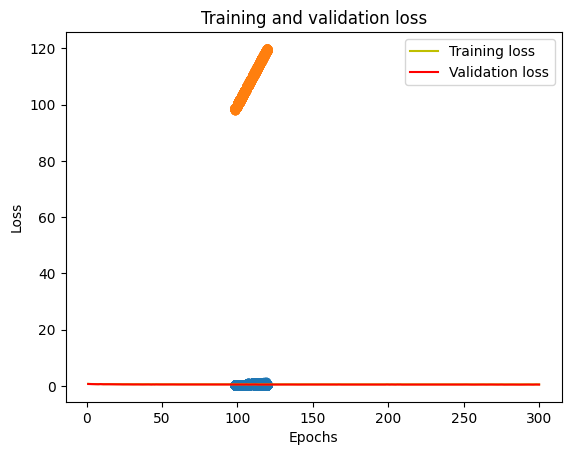

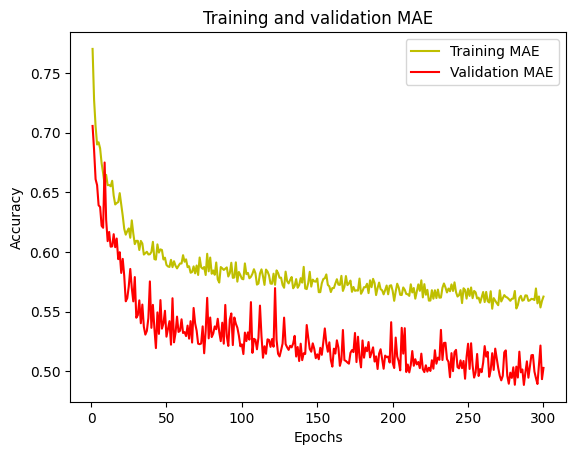

105/105 [==============================] - 0s 1ms/step
Predicted values are:  [[25.66543 ]
 [24.260408]
 [23.848679]
 ...
 [38.656578]
 [23.495459]
 [26.178535]]
Real values are:  ts
2022-05-13 19:00:00+00:00    33.0
2022-07-19 12:00:00+00:00    16.0
2022-09-13 09:00:00+00:00    19.0
2022-08-11 19:00:00+00:00    24.0
2023-04-18 22:00:00+00:00    27.0
                             ... 
2022-09-22 11:00:00+00:00    23.0
2022-11-09 00:00:00+00:00    29.0
2023-02-07 16:00:00+00:00    57.0
2023-06-05 16:00:00+00:00    50.0
2023-02-06 14:00:00+00:00    18.0
Name: Biossido di Azoto, Length: 3336, dtype: float64


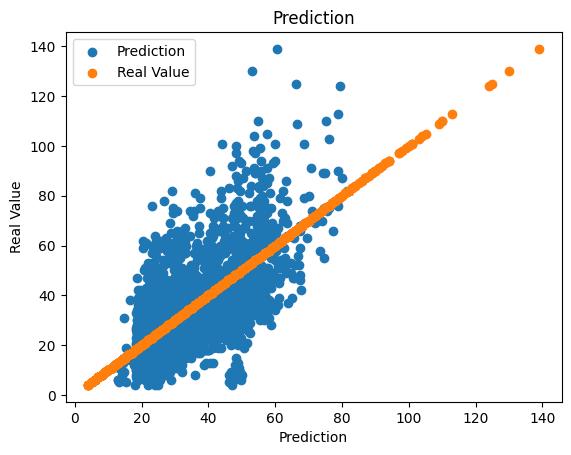

In [83]:
df_appa = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA2.csv")
df_appa
df_appa.Time = pd.to_datetime(df_appa.Time)
timezone_offset = datetime.timedelta(hours=2)
timezone = datetime.timezone(timezone_offset)

df_appa.Time = df_appa.Time.apply(lambda x: x.replace(tzinfo=timezone))
df_appa.rename(columns={"Time": "ts"}, inplace=True)

ind=0
lista_pollutant=[df1, df4, df5, df8, df10, df11, df12, df14]


# data_ini= [date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,4,29), date(2021,6,30), date(2022,2,24), date(2022,2,24)]
# data_fini=[date(2023,6,26), date(2021,4,29), date(2021,6,30), date(2023,5,24), date(2022,2,24), date(2023,6,26), date(2023,6,26), date(2023,6,26)]

data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-01-13", "2021-04-29", "2021-06-30", "2022-02-24", "2022-02-24"]
data_fini=["2023-06-26", "2021-04-29", "2021-06-30", "2023-05-24", "2022-02-24", "2023-06-26", "2023-06-26", "2023-06-26"]

for i in lista_pollutant:
    df8 = lista_pollutant[ind]
    
    df8 = df8.resample("1H").mean()
    df_tot = df8.reset_index().merge(df_appa)
    df_tot.set_index("ts", inplace=True)
    df_tot = df_tot.sort_index().dropna()
    df_tot = df_tot.dropna()
    def f_model(x, a, b, c, d, e):
        Sig, T, RH = x
        return a * Sig**b + d * T + e + c
          
    (
        popt,
        pcov,
    ) = curve_fit(f=f_model,
        xdata=(
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["V"].values,
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["R"].values,
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["HT"].values,
        ), ydata=df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["Ossido di Carbonio"].values, p0=(4, 1, 1, 1, 1), maxfev=10000,)
    # ) = curve_fit(f=f_model,
    #     xdata=(
    #         df_tot.sort_index().loc["2021-1-1":"2021-4-1"]["V"].values,
    #         df_tot.sort_index().loc["2021-1-1":"2021-4-1"]["R"].values,
    #         df_tot.sort_index().loc["2021-1-1":"2021-4-1"]["HT"].values,
    #     ), ydata=df_tot.sort_index().loc["2021-1-1":"2021-4-1"]["PM10"].values, p0=(4, 1, 1, 1, 1), maxfev=10000,)
    a_opt, b_opt, c_opt, d_opt, e_opt = popt
    df_tot["model 1"] = f_model(
        (df_tot["V"].values, df_tot["R"].values, df_tot["HT"].values),
        a_opt,
        b_opt,
        c_opt,
        d_opt,
        e_opt,
    )
    plt.scatter(df_tot["HT"], df_tot["model 1"])
    plt.scatter(df_tot["HT"], df_tot["HT"])
    X = df_tot.drop(["PM10","Ossido di Carbonio","Biossido di Azoto"], axis=1)

    y = df_tot["Biossido di Azoto"].copy()

    try :
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = 1
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=True
    )
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler = StandardScaler()
    scaler.fit(y_train.values.reshape(-1,1))

    y_train_s = scaler.transform(y_train.values.reshape(-1,1))
    y_test_s = scaler.transform(y_test.values.reshape(-1,1))    
    

    a2 = "mean_squared_error"

    model = Sequential()
    model.add(
        Dense(64, kernel_initializer="normal", input_dim=INPUT_DIM, activation="selu")
    )
    model.add(Dropout(0.2))

    model.add(Dense(128, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))

    model.add(Dense(16, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))

    model.add(Dense(OUTPUT_DIM, kernel_initializer="normal", activation="linear"))

    model.compile(loss=a2, optimizer="adam", metrics=[a2])
    model.summary()

    checkpoint_name = "./tmp/checkpoint"
    checkpoint = ModelCheckpoint(
        checkpoint_name, monitor="val_loss", verbose=1, save_best_only=True, mode="min"
    )
    callbacks_list = [checkpoint]
    history = model.fit(
        X_train_scaled, y_train_s, validation_split=0.2, epochs=300, callbacks=[checkpoint]
    )
    model.load_weights(checkpoint_name)


    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "y", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


    acc = history.history["mean_squared_error"]
    val_acc = history.history["val_mean_squared_error"]
    plt.plot(epochs, acc, "y", label="Training MAE")
    plt.plot(epochs, val_acc, "r", label="Validation MAE")
    plt.title("Training and validation MAE")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    predictions = model.predict(X_test_scaled)

    predictions = scaler.inverse_transform(predictions)

    y_test_ssaved = y_test_s
    y_test_s = y_test
    print("Predicted values are: ", predictions)
    print("Real values are: ", y_test_s)

    t = np.arange(0, predictions.size, 1)
    plt.scatter(predictions, y_test_s, label="Prediction")
    plt.scatter(y_test_s, y_test_s, label="Real Value")
    plt.title("Prediction")
    plt.xlabel("Prediction")
    plt.ylabel("Real Value")
    plt.legend()
    plt.show()
    ind += 1

In [13]:
##Example of curve fit


##Define a model
def f_model(x, a, b, c, d, e):
    Sig, T, RH = x
    return a * Sig**b + d * T + e + c


##df8 is an example of a dataframe, indexed with data and with columns name not really informative

##You are training here from a start to end the slicing of a database
(
    popt,
    pcov,
) = curve_fit(  # popt are the optimal values, pcov is the covariance matrix of the optimized values.
    f=f_model,  # model function
    xdata=(
        df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["V"].values,
        df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["R"].values,
        df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["HT"].values,
    ),  # x data
    ydata=df_tot.sort_index().loc["2021-01-01":"2021-04-1"]["PM10"].values,  # y data
    p0=(4, 1, 1, 1, 1),  # initial value of the parameters
    maxfev=10000,  # Number of times in which you repeat the training, close to epochs
)
a_opt, b_opt, c_opt, d_opt, e_opt = popt
df_tot["model 1"] = f_model(
    (df_tot["V"].values, df_tot["R"].values, df_tot["HT"].values),
    a_opt,
    b_opt,
    c_opt,
    d_opt,
    e_opt,
)  # Here you are predicting the value of your complete samples

c:\Users\ricca\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


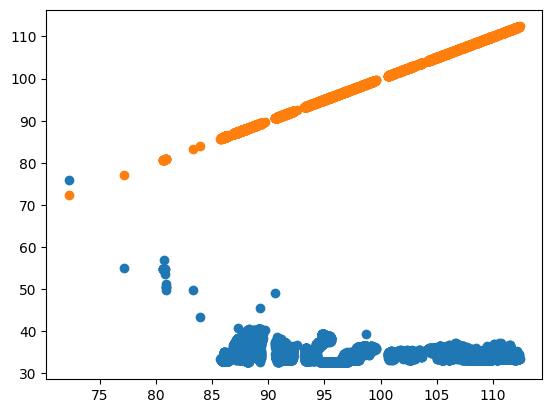

In [14]:
plt.scatter(df_tot["HT"], df_tot["model 1"])
plt.scatter(df_tot["HT"], df_tot["HT"])

In [15]:
##Example of Scaler, matrices or something like these

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

##Place whatever dataframe you want
X = df_tot.drop(["PM10","Ossido di Carbonio","Biossido di Azoto"], axis=1)

y = df_tot["Biossido di Azoto"].copy()

try :
    INPUT_DIM = len(X.columns)
    OUTPUT_DIM = len(y.columns)
except:
    INPUT_DIM = len(X.columns)
    OUTPUT_DIM = 1

In [16]:
# Split training and test, remember that you may want to not shuffle data while dividing them
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)
# You perform a standard scaler (or minmax scaler) to make the data more usable by the machine learning
# model
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(y_train.values.reshape(-1,1))

y_train_s = scaler.transform(y_train.values.reshape(-1,1))
y_test_s = scaler.transform(y_test.values.reshape(-1,1))

In [17]:
a2 = "mean_squared_error"
# define the model
# Experiment with deeper and wider networks
model = Sequential()
# By Sequential it means that the layers are connected one after the one before so that you have
# a defined flow of information


# Input layer, Dense layer meaning that the layer is connected to all the neurons to the layer before
# kernel_initializer is the how the starting values of the parameters of your neural network (NN)
# input_dim is the number of features of the dataset that you are feeding to your NN
# activation function is how you introduce non linearity in your model.

model.add(
    Dense(64, kernel_initializer="normal", input_dim=INPUT_DIM, activation="selu")
)

# Hidden layers:
# Dropout layer is just a layer where you drops, for example the 20% of the links between the two layers
# that it is placed between
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer="normal", activation="selu"))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer="normal", activation="selu"))
model.add(Dropout(0.2))

model.add(Dense(16, kernel_initializer="normal", activation="selu"))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(OUTPUT_DIM, kernel_initializer="normal", activation="linear"))

# with add you can add a new layer, with pop you remove the last layer you have placed there


# You are compiling your model, so from now on you can't change its structure. Here you specify its loss function,
# the function that you want to minimize, the optimizer that is how you want to optimize the parameters,
# the metrics that is another value that you can use to measure your model but you won't use it to optimize
# the model
model.compile(loss=a2, optimizer="adam", metrics=[a2])
# You are showing how your NN is formed
model.summary()

##Here you are defining something that is not necessary. You are defining condition by which you are saving
# definite models. For example in that case you are specifing where do you want to place them, you are searching
# the model where the value of the loss function over the validation set (data not seen by the model during
# the training) is minimum. The weight of the "best model" by that value is saved there.
checkpoint_name = "./tmp/checkpoint"
checkpoint = ModelCheckpoint(
    checkpoint_name, monitor="val_loss", verbose=1, save_best_only=True, mode="min"
)
callbacks_list = [checkpoint]
# In the history you collect the important information that happens during the fit, value of loss function,
# metrics and so on in one variable.
# During the fit  the parameters of the NN are updated. You are specifing the training data, X and y, and either
# you give the fit function the validation data or you give them a percentage as the validation_split, in this case 20%
# after that you are specifing the number of epochs, meaning how many time the model has seen the same data,
# and then the callbacks that you want to use. Notice that you can have more than one callback.
# There are more parameters that you can implement, so take a look at them
history = model.fit(
    X_train_scaled, y_train_s, validation_split=0.2, epochs=300, callbacks=[checkpoint]
)
# After performing the training you are uploading the best model that you have saved in the callback, updating
# the value of your parameters
model.load_weights(checkpoint_name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 5ms/step - loss: 0.8901 - mean_squared_error: 0.8901 - val_loss: 0.9089 - val_mean_squared_error: 0.9089
Epoch 2/300
333/349 [===========================>..] - ETA: 0s - loss: 0.8760 - mean_squared_error: 0.8760
Epoch 2: val_loss improved from 0.90888 to 0.89427, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.8776 - mean_squared_error: 0.8776 - val_loss: 0.8943 - val_mean_squared_error: 0.8943
Epoch 3/300
337/349 [===========================>..] - ETA: 0s - loss: 0.8726 - mean_squared_error: 0.8726
Epoch 3: val_loss improved from 0.89427 to 0.88045, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.8681 - mean_squared_error: 0.8681 - val_loss: 0.8805 - val_mean_squared_error: 0.8805
Epoch 4/300
340/349 [============================>.] - ETA: 0s - loss: 0.8612 - mean_squared_error: 0.8612
Epoch 4: val_loss did not improve from 0.88045
349/349 [==============================] - 1s 3ms/step - loss: 0.8590 - mean_squared_error: 0.8590 - val_loss: 0.8834 - val_mean_squared_error: 0.8834
Epoch 5/300
346/349 [============================>.] - ETA: 0s - loss: 0.8589 - mean_squared_error: 0.8589
Epoch 5: val_loss improved from 0.88045 to 0.86560, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.8579 - mean_squared_error: 0.8579 - val_loss: 0.8656 - val_mean_squared_error: 0.8656
Epoch 6/300
346/349 [============================>.] - ETA: 0s - loss: 0.8468 - mean_squared_error: 0.8468
Epoch 6: val_loss improved from 0.86560 to 0.86153, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.8467 - mean_squared_error: 0.8467 - val_loss: 0.8615 - val_mean_squared_error: 0.8615
Epoch 7/300
348/349 [============================>.] - ETA: 0s - loss: 0.8460 - mean_squared_error: 0.8460
Epoch 7: val_loss improved from 0.86153 to 0.83553, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.8454 - mean_squared_error: 0.8454 - val_loss: 0.8355 - val_mean_squared_error: 0.8355
Epoch 8/300
344/349 [============================>.] - ETA: 0s - loss: 0.8375 - mean_squared_error: 0.8375
Epoch 8: val_loss did not improve from 0.83553
349/349 [==============================] - 1s 3ms/step - loss: 0.8359 - mean_squared_error: 0.8359 - val_loss: 0.8376 - val_mean_squared_error: 0.8376
Epoch 9/300
343/349 [============================>.] - ETA: 0s - loss: 0.8191 - mean_squared_error: 0.8191
Epoch 9: val_loss did not improve from 0.83553
349/349 [==============================] - 1s 3ms/step - loss: 0.8211 - mean_squared_error: 0.8211 - val_loss: 0.8607 - val_mean_squared_error: 0.8607
Epoch 10/300
339/349 [============================>.] - ETA: 0s - loss: 0.8092 - mean_squared_error: 0.8092
Epoch 10: val_loss improved from 0.83553 to 0.78061, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.8099 - mean_squared_error: 0.8099 - val_loss: 0.7806 - val_mean_squared_error: 0.7806
Epoch 11/300
342/349 [============================>.] - ETA: 0s - loss: 0.8021 - mean_squared_error: 0.8021
Epoch 11: val_loss improved from 0.78061 to 0.77558, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.8045 - mean_squared_error: 0.8045 - val_loss: 0.7756 - val_mean_squared_error: 0.7756
Epoch 12/300
331/349 [===========================>..] - ETA: 0s - loss: 0.7806 - mean_squared_error: 0.7806
Epoch 12: val_loss did not improve from 0.77558
349/349 [==============================] - 1s 3ms/step - loss: 0.7850 - mean_squared_error: 0.7850 - val_loss: 0.8196 - val_mean_squared_error: 0.8196
Epoch 13/300
344/349 [============================>.] - ETA: 0s - loss: 0.7719 - mean_squared_error: 0.7719
Epoch 13: val_loss improved from 0.77558 to 0.75275, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.7721 - mean_squared_error: 0.7721 - val_loss: 0.7527 - val_mean_squared_error: 0.7527
Epoch 14/300
328/349 [===========================>..] - ETA: 0s - loss: 0.7677 - mean_squared_error: 0.7677
Epoch 14: val_loss improved from 0.75275 to 0.72492, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.7685 - mean_squared_error: 0.7685 - val_loss: 0.7249 - val_mean_squared_error: 0.7249
Epoch 15/300
346/349 [============================>.] - ETA: 0s - loss: 0.7588 - mean_squared_error: 0.7588
Epoch 15: val_loss improved from 0.72492 to 0.72407, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.7578 - mean_squared_error: 0.7578 - val_loss: 0.7241 - val_mean_squared_error: 0.7241
Epoch 16/300
330/349 [===========================>..] - ETA: 0s - loss: 0.7374 - mean_squared_error: 0.7374
Epoch 16: val_loss improved from 0.72407 to 0.69918, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.7370 - mean_squared_error: 0.7370 - val_loss: 0.6992 - val_mean_squared_error: 0.6992
Epoch 17/300
341/349 [============================>.] - ETA: 0s - loss: 0.7308 - mean_squared_error: 0.7308
Epoch 17: val_loss improved from 0.69918 to 0.67477, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.7279 - mean_squared_error: 0.7279 - val_loss: 0.6748 - val_mean_squared_error: 0.6748
Epoch 18/300
327/349 [===========================>..] - ETA: 0s - loss: 0.7302 - mean_squared_error: 0.7302
Epoch 18: val_loss improved from 0.67477 to 0.67438, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.7237 - mean_squared_error: 0.7237 - val_loss: 0.6744 - val_mean_squared_error: 0.6744
Epoch 19/300
338/349 [============================>.] - ETA: 0s - loss: 0.7090 - mean_squared_error: 0.7090
Epoch 19: val_loss did not improve from 0.67438
349/349 [==============================] - 1s 3ms/step - loss: 0.7079 - mean_squared_error: 0.7079 - val_loss: 0.6801 - val_mean_squared_error: 0.6801
Epoch 20/300
335/349 [===========================>..] - ETA: 0s - loss: 0.6990 - mean_squared_error: 0.6990
Epoch 20: val_loss did not improve from 0.67438
349/349 [==============================] - 1s 3ms/step - loss: 0.7011 - mean_squared_error: 0.7011 - val_loss: 0.6825 - val_mean_squared_error: 0.6825
Epoch 21/300
347/349 [============================>.] - ETA: 0s - loss: 0.6996 - mean_squared_error: 0.6996
Epoch 21: val_loss improved from 0.67438 to 0.66938, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6986 - mean_squared_error: 0.6986 - val_loss: 0.6694 - val_mean_squared_error: 0.6694
Epoch 22/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6946 - mean_squared_error: 0.6946
Epoch 22: val_loss improved from 0.66938 to 0.66591, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6940 - mean_squared_error: 0.6940 - val_loss: 0.6659 - val_mean_squared_error: 0.6659
Epoch 23/300
340/349 [============================>.] - ETA: 0s - loss: 0.6948 - mean_squared_error: 0.6948
Epoch 23: val_loss did not improve from 0.66591
349/349 [==============================] - 1s 2ms/step - loss: 0.6936 - mean_squared_error: 0.6936 - val_loss: 0.6767 - val_mean_squared_error: 0.6767
Epoch 24/300
341/349 [============================>.] - ETA: 0s - loss: 0.6909 - mean_squared_error: 0.6909
Epoch 24: val_loss improved from 0.66591 to 0.66097, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6907 - mean_squared_error: 0.6907 - val_loss: 0.6610 - val_mean_squared_error: 0.6610
Epoch 25/300
349/349 [==============================] - ETA: 0s - loss: 0.6846 - mean_squared_error: 0.6846
Epoch 25: val_loss did not improve from 0.66097
349/349 [==============================] - 1s 2ms/step - loss: 0.6846 - mean_squared_error: 0.6846 - val_loss: 0.6773 - val_mean_squared_error: 0.6773
Epoch 26/300
347/349 [============================>.] - ETA: 0s - loss: 0.6880 - mean_squared_error: 0.6880
Epoch 26: val_loss did not improve from 0.66097
349/349 [==============================] - 1s 2ms/step - loss: 0.6880 - mean_squared_error: 0.6880 - val_loss: 0.6767 - val_mean_squared_error: 0.6767
Epoch 27/300
343/349 [============================>.] - ETA: 0s - loss: 0.6847 - mean_squared_error: 0.6847
Epoch 27: val_loss did not improve from 0.66097
349/349 [==============================] - 1s 2ms/step - loss: 0.6833 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6803 - mean_squared_error: 0.6803 - val_loss: 0.6562 - val_mean_squared_error: 0.6562
Epoch 29/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6843 - mean_squared_error: 0.6843
Epoch 29: val_loss did not improve from 0.65622
349/349 [==============================] - 1s 3ms/step - loss: 0.6821 - mean_squared_error: 0.6821 - val_loss: 0.6650 - val_mean_squared_error: 0.6650
Epoch 30/300
343/349 [============================>.] - ETA: 0s - loss: 0.6811 - mean_squared_error: 0.6811
Epoch 30: val_loss did not improve from 0.65622
349/349 [==============================] - 1s 3ms/step - loss: 0.6810 - mean_squared_error: 0.6810 - val_loss: 0.6732 - val_mean_squared_error: 0.6732
Epoch 31/300
340/349 [============================>.] - ETA: 0s - loss: 0.6759 - mean_squared_error: 0.6759
Epoch 31: val_loss improved from 0.65622 to 0.65553, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 9ms/step - loss: 0.6743 - mean_squared_error: 0.6743 - val_loss: 0.6555 - val_mean_squared_error: 0.6555
Epoch 32/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6760 - mean_squared_error: 0.6760
Epoch 32: val_loss improved from 0.65553 to 0.65540, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6803 - mean_squared_error: 0.6803 - val_loss: 0.6554 - val_mean_squared_error: 0.6554
Epoch 33/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6719 - mean_squared_error: 0.6719
Epoch 33: val_loss improved from 0.65540 to 0.64896, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6722 - mean_squared_error: 0.6722 - val_loss: 0.6490 - val_mean_squared_error: 0.6490
Epoch 34/300
321/349 [==========================>...] - ETA: 0s - loss: 0.6773 - mean_squared_error: 0.6773
Epoch 34: val_loss did not improve from 0.64896
349/349 [==============================] - 1s 2ms/step - loss: 0.6780 - mean_squared_error: 0.6780 - val_loss: 0.6525 - val_mean_squared_error: 0.6525
Epoch 35/300
346/349 [============================>.] - ETA: 0s - loss: 0.6696 - mean_squared_error: 0.6696
Epoch 35: val_loss did not improve from 0.64896
349/349 [==============================] - 1s 3ms/step - loss: 0.6697 - mean_squared_error: 0.6697 - val_loss: 0.6562 - val_mean_squared_error: 0.6562
Epoch 36/300
348/349 [============================>.] - ETA: 0s - loss: 0.6752 - mean_squared_error: 0.6752
Epoch 36: val_loss improved from 0.64896 to 0.64617, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.6745 - mean_squared_error: 0.6745 - val_loss: 0.6462 - val_mean_squared_error: 0.6462
Epoch 37/300
342/349 [============================>.] - ETA: 0s - loss: 0.6728 - mean_squared_error: 0.6728
Epoch 37: val_loss did not improve from 0.64617
349/349 [==============================] - 1s 3ms/step - loss: 0.6750 - mean_squared_error: 0.6750 - val_loss: 0.6757 - val_mean_squared_error: 0.6757
Epoch 38/300
331/349 [===========================>..] - ETA: 0s - loss: 0.6788 - mean_squared_error: 0.6788
Epoch 38: val_loss did not improve from 0.64617
349/349 [==============================] - 1s 3ms/step - loss: 0.6763 - mean_squared_error: 0.6763 - val_loss: 0.6647 - val_mean_squared_error: 0.6647
Epoch 39/300
347/349 [============================>.] - ETA: 0s - loss: 0.6741 - mean_squared_error: 0.6741
Epoch 39: val_loss improved from 0.64617 to 0.64583, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 7ms/step - loss: 0.6737 - mean_squared_error: 0.6737 - val_loss: 0.6458 - val_mean_squared_error: 0.6458
Epoch 40/300
338/349 [============================>.] - ETA: 0s - loss: 0.6701 - mean_squared_error: 0.6701
Epoch 40: val_loss did not improve from 0.64583
349/349 [==============================] - 1s 3ms/step - loss: 0.6694 - mean_squared_error: 0.6694 - val_loss: 0.6879 - val_mean_squared_error: 0.6879
Epoch 41/300
346/349 [============================>.] - ETA: 0s - loss: 0.6694 - mean_squared_error: 0.6694
Epoch 41: val_loss improved from 0.64583 to 0.63742, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 8ms/step - loss: 0.6689 - mean_squared_error: 0.6689 - val_loss: 0.6374 - val_mean_squared_error: 0.6374
Epoch 42/300
333/349 [===========================>..] - ETA: 0s - loss: 0.6576 - mean_squared_error: 0.6576
Epoch 42: val_loss did not improve from 0.63742
349/349 [==============================] - 1s 3ms/step - loss: 0.6652 - mean_squared_error: 0.6652 - val_loss: 0.6481 - val_mean_squared_error: 0.6481
Epoch 43/300
341/349 [============================>.] - ETA: 0s - loss: 0.6692 - mean_squared_error: 0.6692
Epoch 43: val_loss improved from 0.63742 to 0.63404, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 3s 7ms/step - loss: 0.6691 - mean_squared_error: 0.6691 - val_loss: 0.6340 - val_mean_squared_error: 0.6340
Epoch 44/300
332/349 [===========================>..] - ETA: 0s - loss: 0.6704 - mean_squared_error: 0.6704
Epoch 44: val_loss did not improve from 0.63404
349/349 [==============================] - 1s 3ms/step - loss: 0.6654 - mean_squared_error: 0.6654 - val_loss: 0.6712 - val_mean_squared_error: 0.6712
Epoch 45/300
325/349 [==========================>...] - ETA: 0s - loss: 0.6748 - mean_squared_error: 0.6748
Epoch 45: val_loss did not improve from 0.63404
349/349 [==============================] - 1s 2ms/step - loss: 0.6708 - mean_squared_error: 0.6708 - val_loss: 0.6395 - val_mean_squared_error: 0.6395
Epoch 46/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6699 - mean_squared_error: 0.6699
Epoch 46: val_loss did not improve from 0.63404
349/349 [==============================] - 1s 2ms/step - loss: 0.6683 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6580 - mean_squared_error: 0.6580 - val_loss: 0.6276 - val_mean_squared_error: 0.6276
Epoch 66/300
333/349 [===========================>..] - ETA: 0s - loss: 0.6621 - mean_squared_error: 0.6621
Epoch 66: val_loss did not improve from 0.62761
349/349 [==============================] - 1s 2ms/step - loss: 0.6627 - mean_squared_error: 0.6627 - val_loss: 0.6740 - val_mean_squared_error: 0.6740
Epoch 67/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6535 - mean_squared_error: 0.6535
Epoch 67: val_loss did not improve from 0.62761
349/349 [==============================] - 1s 3ms/step - loss: 0.6532 - mean_squared_error: 0.6532 - val_loss: 0.6313 - val_mean_squared_error: 0.6313
Epoch 68/300
339/349 [============================>.] - ETA: 0s - loss: 0.6528 - mean_squared_error: 0.6528
Epoch 68: val_loss did not improve from 0.62761
349/349 [==============================] - 1s 2ms/step - loss: 0.6535 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6499 - mean_squared_error: 0.6499 - val_loss: 0.6248 - val_mean_squared_error: 0.6248
Epoch 115/300
346/349 [============================>.] - ETA: 0s - loss: 0.6458 - mean_squared_error: 0.6458
Epoch 115: val_loss did not improve from 0.62475
349/349 [==============================] - 1s 3ms/step - loss: 0.6458 - mean_squared_error: 0.6458 - val_loss: 0.6390 - val_mean_squared_error: 0.6390
Epoch 116/300
338/349 [============================>.] - ETA: 0s - loss: 0.6526 - mean_squared_error: 0.6526
Epoch 116: val_loss did not improve from 0.62475
349/349 [==============================] - 1s 3ms/step - loss: 0.6505 - mean_squared_error: 0.6505 - val_loss: 0.6337 - val_mean_squared_error: 0.6337
Epoch 117/300
343/349 [============================>.] - ETA: 0s - loss: 0.6472 - mean_squared_error: 0.6472
Epoch 117: val_loss did not improve from 0.62475
349/349 [==============================] - 1s 2ms/step - loss: 0.6505 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6420 - mean_squared_error: 0.6420 - val_loss: 0.6233 - val_mean_squared_error: 0.6233
Epoch 136/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6561 - mean_squared_error: 0.6561
Epoch 136: val_loss did not improve from 0.62334
349/349 [==============================] - 1s 2ms/step - loss: 0.6505 - mean_squared_error: 0.6505 - val_loss: 0.6413 - val_mean_squared_error: 0.6413
Epoch 137/300
339/349 [============================>.] - ETA: 0s - loss: 0.6518 - mean_squared_error: 0.6518
Epoch 137: val_loss did not improve from 0.62334
349/349 [==============================] - 1s 3ms/step - loss: 0.6513 - mean_squared_error: 0.6513 - val_loss: 0.6352 - val_mean_squared_error: 0.6352
Epoch 138/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6501 - mean_squared_error: 0.6501
Epoch 138: val_loss improved from 0.62334 to 0.62030, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 6ms/step - loss: 0.6515 - mean_squared_error: 0.6515 - val_loss: 0.6203 - val_mean_squared_error: 0.6203
Epoch 139/300
329/349 [===========================>..] - ETA: 0s - loss: 0.6439 - mean_squared_error: 0.6439
Epoch 139: val_loss did not improve from 0.62030
349/349 [==============================] - 1s 2ms/step - loss: 0.6438 - mean_squared_error: 0.6438 - val_loss: 0.6278 - val_mean_squared_error: 0.6278
Epoch 140/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6514 - mean_squared_error: 0.6514
Epoch 140: val_loss did not improve from 0.62030
349/349 [==============================] - 1s 3ms/step - loss: 0.6490 - mean_squared_error: 0.6490 - val_loss: 0.6628 - val_mean_squared_error: 0.6628
Epoch 141/300
347/349 [============================>.] - ETA: 0s - loss: 0.6461 - mean_squared_error: 0.6461
Epoch 141: val_loss did not improve from 0.62030
349/349 [==============================] - 1s 3ms/step - loss: 0.6466 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6446 - mean_squared_error: 0.6446 - val_loss: 0.6158 - val_mean_squared_error: 0.6158
Epoch 185/300
347/349 [============================>.] - ETA: 0s - loss: 0.6382 - mean_squared_error: 0.6382
Epoch 185: val_loss did not improve from 0.61585
349/349 [==============================] - 1s 2ms/step - loss: 0.6380 - mean_squared_error: 0.6380 - val_loss: 0.6246 - val_mean_squared_error: 0.6246
Epoch 186/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6423 - mean_squared_error: 0.6423
Epoch 186: val_loss did not improve from 0.61585
349/349 [==============================] - 1s 3ms/step - loss: 0.6380 - mean_squared_error: 0.6380 - val_loss: 0.6622 - val_mean_squared_error: 0.6622
Epoch 187/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6413 - mean_squared_error: 0.6413
Epoch 187: val_loss did not improve from 0.61585
349/349 [==============================] - 1s 3ms/step - loss: 0.6398 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6392 - mean_squared_error: 0.6392 - val_loss: 0.6131 - val_mean_squared_error: 0.6131
Epoch 213/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6364 - mean_squared_error: 0.6364
Epoch 213: val_loss did not improve from 0.61310
349/349 [==============================] - 1s 2ms/step - loss: 0.6362 - mean_squared_error: 0.6362 - val_loss: 0.6556 - val_mean_squared_error: 0.6556
Epoch 214/300
348/349 [============================>.] - ETA: 0s - loss: 0.6456 - mean_squared_error: 0.6456
Epoch 214: val_loss did not improve from 0.61310
349/349 [==============================] - 1s 2ms/step - loss: 0.6468 - mean_squared_error: 0.6468 - val_loss: 0.6410 - val_mean_squared_error: 0.6410
Epoch 215/300
337/349 [===========================>..] - ETA: 0s - loss: 0.6474 - mean_squared_error: 0.6474
Epoch 215: val_loss did not improve from 0.61310
349/349 [==============================] - 1s 2ms/step - loss: 0.6432 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 4ms/step - loss: 0.6418 - mean_squared_error: 0.6418 - val_loss: 0.6116 - val_mean_squared_error: 0.6116
Epoch 260/300
331/349 [===========================>..] - ETA: 0s - loss: 0.6423 - mean_squared_error: 0.6423
Epoch 260: val_loss did not improve from 0.61163
349/349 [==============================] - 1s 2ms/step - loss: 0.6401 - mean_squared_error: 0.6401 - val_loss: 0.6460 - val_mean_squared_error: 0.6460
Epoch 261/300
328/349 [===========================>..] - ETA: 0s - loss: 0.6360 - mean_squared_error: 0.6360
Epoch 261: val_loss did not improve from 0.61163
349/349 [==============================] - 1s 2ms/step - loss: 0.6360 - mean_squared_error: 0.6360 - val_loss: 0.6145 - val_mean_squared_error: 0.6145
Epoch 262/300
344/349 [============================>.] - ETA: 0s - loss: 0.6378 - mean_squared_error: 0.6378
Epoch 262: val_loss did not improve from 0.61163
349/349 [==============================] - 1s 2ms/step - loss: 0.6383 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 4ms/step - loss: 0.6357 - mean_squared_error: 0.6357 - val_loss: 0.6114 - val_mean_squared_error: 0.6114
Epoch 267/300
330/349 [===========================>..] - ETA: 0s - loss: 0.6421 - mean_squared_error: 0.6421
Epoch 267: val_loss did not improve from 0.61143
349/349 [==============================] - 1s 2ms/step - loss: 0.6399 - mean_squared_error: 0.6399 - val_loss: 0.6177 - val_mean_squared_error: 0.6177
Epoch 268/300
347/349 [============================>.] - ETA: 0s - loss: 0.6351 - mean_squared_error: 0.6351
Epoch 268: val_loss did not improve from 0.61143
349/349 [==============================] - 1s 2ms/step - loss: 0.6358 - mean_squared_error: 0.6358 - val_loss: 0.6306 - val_mean_squared_error: 0.6306
Epoch 269/300
348/349 [============================>.] - ETA: 0s - loss: 0.6398 - mean_squared_error: 0.6398
Epoch 269: val_loss improved from 0.61143 to 0.61127, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 1s 4ms/step - loss: 0.6393 - mean_squared_error: 0.6393 - val_loss: 0.6113 - val_mean_squared_error: 0.6113
Epoch 270/300
349/349 [==============================] - ETA: 0s - loss: 0.6404 - mean_squared_error: 0.6404
Epoch 270: val_loss did not improve from 0.61127
349/349 [==============================] - 1s 2ms/step - loss: 0.6404 - mean_squared_error: 0.6404 - val_loss: 0.6224 - val_mean_squared_error: 0.6224
Epoch 271/300
334/349 [===========================>..] - ETA: 0s - loss: 0.6384 - mean_squared_error: 0.6384
Epoch 271: val_loss did not improve from 0.61127
349/349 [==============================] - 1s 2ms/step - loss: 0.6374 - mean_squared_error: 0.6374 - val_loss: 0.6320 - val_mean_squared_error: 0.6320
Epoch 272/300
319/349 [==========================>...] - ETA: 0s - loss: 0.6432 - mean_squared_error: 0.6432
Epoch 272: val_loss did not improve from 0.61127
349/349 [==============================] - 1s 2ms/step - loss: 0.6438 - m

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


349/349 [==============================] - 2s 5ms/step - loss: 0.6368 - mean_squared_error: 0.6368 - val_loss: 0.6082 - val_mean_squared_error: 0.6082
Epoch 294/300
342/349 [============================>.] - ETA: 0s - loss: 0.6424 - mean_squared_error: 0.6424
Epoch 294: val_loss did not improve from 0.60818
349/349 [==============================] - 1s 2ms/step - loss: 0.6384 - mean_squared_error: 0.6384 - val_loss: 0.6263 - val_mean_squared_error: 0.6263
Epoch 295/300
336/349 [===========================>..] - ETA: 0s - loss: 0.6279 - mean_squared_error: 0.6279
Epoch 295: val_loss did not improve from 0.60818
349/349 [==============================] - 1s 3ms/step - loss: 0.6290 - mean_squared_error: 0.6290 - val_loss: 0.6464 - val_mean_squared_error: 0.6464
Epoch 296/300
345/349 [============================>.] - ETA: 0s - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 296: val_loss did not improve from 0.60818
349/349 [==============================] - 1s 2ms/step - loss: 0.6367 - m

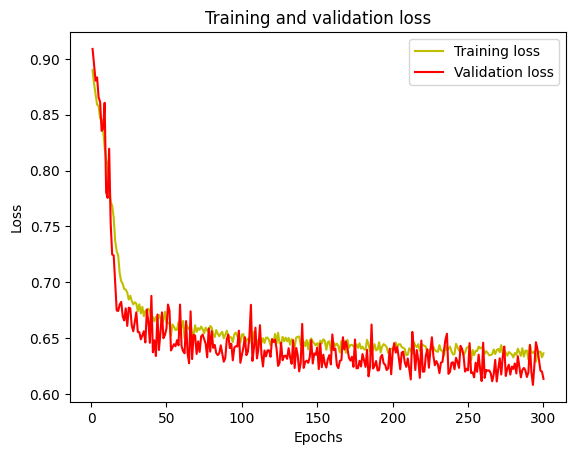

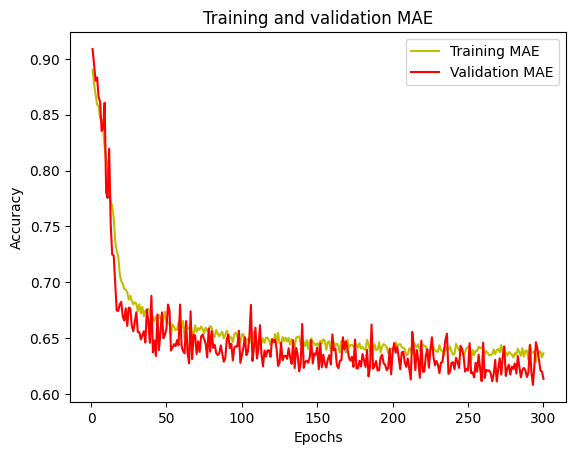

187/187 [==============================] - 0s 1ms/step
Predicted values are:  [[31.411911]
 [46.44049 ]
 [35.16206 ]
 ...
 [31.454906]
 [51.73263 ]
 [26.623777]]
Real values are:  ts
2022-10-11 23:00:00+00:00    32.0
2023-02-28 22:00:00+00:00    59.0
2022-10-30 07:00:00+00:00    17.0
2022-10-01 19:00:00+00:00    34.0
2021-06-01 04:00:00+00:00    51.0
                             ... 
2021-04-12 03:00:00+00:00    36.0
2021-07-17 12:00:00+00:00    29.0
2021-04-15 22:00:00+00:00    28.0
2023-01-14 07:00:00+00:00    50.0
2021-07-17 02:00:00+00:00    14.0
Name: Biossido di Azoto, Length: 5983, dtype: float64


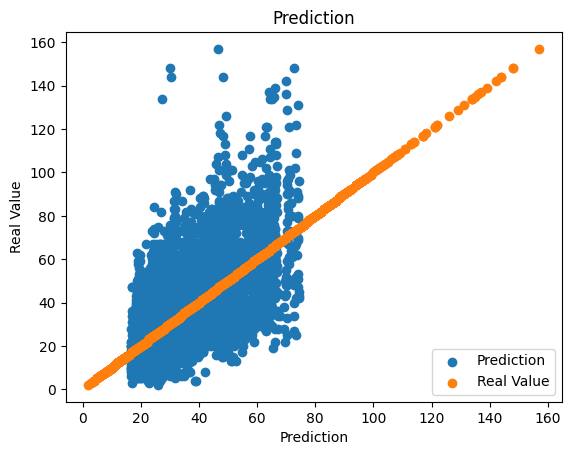

In [18]:
# plot the training and validation accuracy and loss at each epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "y", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


acc = history.history["mean_squared_error"]
val_acc = history.history["val_mean_squared_error"]
plt.plot(epochs, acc, "y", label="Training MAE")
plt.plot(epochs, val_acc, "r", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

############################################
# Predict on test data
predictions = model.predict(X_test_scaled)

predictions = scaler.inverse_transform(predictions)

y_test_ssaved = y_test_s
y_test_s = y_test
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_s)

##############################################
# Plot and compare prediction and real value
t = np.arange(0, predictions.size, 1)
plt.scatter(predictions, y_test_s, label="Prediction")
plt.scatter(y_test_s, y_test_s, label="Real Value")
plt.title("Prediction")
plt.xlabel("Prediction")
plt.ylabel("Real Value")
plt.legend()
plt.show()

ML pt2

In [20]:
##Same thing you have done before, define an X and y from a dataset if you want to try.

xtrain, xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=0.20)
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler.fit(xtrain)

X_train = scaler.transform(xtrain)
X_test = scaler.transform(xtest)
scaler2.fit(ytrain.values.reshape(-1, 1))

y_train = scaler2.transform(ytrain.values.reshape(-1, 1))
y_test = scaler2.transform(ytest.values.reshape(-1, 1))

In [21]:
rfr = RandomForestRegressor()


# Here are some hyperparameter of your regressor, it's a bit better and easier to look up at what the difference
# parameter does. All of this hyperparameter can be optimized using the validation data.
RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion="mse",
    max_depth=10,
    max_features=3,
    max_leaf_nodes=None,
    max_samples=0.1,
    min_impurity_decrease=0.0,
    min_samples_leaf=0.01,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False,
)

RandomForestRegressor(criterion='mse', max_depth=10, max_features=3,
                      max_samples=0.1, min_samples_leaf=0.01)

C:\Users\ricca\AppData\Local\Temp\ipykernel_15644\2055978183.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train.reshape(-1, 1))


R-squared: 0.9281185483797634
MSE:  0.00787210630595901
RMSE:  0.003936053152979505


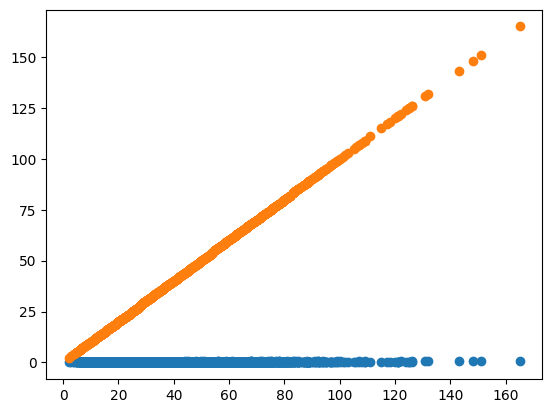

In [22]:
# fit of the RandomForestRegressor

rfr.fit(X_train, y_train.reshape(-1, 1))
# evaluation of its performance by the R-squared

score = rfr.score(X_train, y_train.reshape(-1, 1))
print("R-squared:", score)

ypred = rfr.predict(X_test)
# evaluation of its performance by the mean_squared_error

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse * (1 / 2.0))

plt.scatter(ytest, ypred)
plt.scatter(ytest, ytest)